In [4]:
import jieba,math
import os
import jieba.analyse
import numpy as np
import pandas as pd
from snownlp import SnowNLP
from sklearn.feature_extraction.text import CountVectorizer

import matplotlib.pyplot as plt
import pyreadstat
import seaborn as sns

import re
from tqdm import tqdm

import wordcloud

import matplotlib
# matplotlib.rc("font", family='Microsoft YaHei')

# #coding:utf-8
# plt.rcParams["font.sans-serif"]=["Microsoft YaHei"] 


In [6]:
from matplotlib.font_manager import FontManager
 
mpl_fonts = set(f.name for f in FontManager().ttflist)
 
print('all font list get from matplotlib.font_manager:')
for f in sorted(mpl_fonts):
    print('\t' + f)

all font list get from matplotlib.font_manager:
	Agency FB
	Algerian
	Arial
	Arial Rounded MT Bold
	Bahnschrift
	Barlow Condensed
	Barrio
	Baskerville Old Face
	Bauhaus 93
	Bell MT
	Berlin Sans FB
	Berlin Sans FB Demi
	Bernard MT Condensed
	Besley
	Blackadder ITC
	Bodoni MT
	Book Antiqua
	Bookman Old Style
	Bookshelf Symbol 7
	Bradley Hand ITC
	Britannic Bold
	Broadway
	Brush Script MT
	Bubblegum Sans
	Cabin Sketch
	Calibri
	Californian FB
	Calisto MT
	Cambria
	Candara
	Castellar
	Centaur
	Century
	Century Gothic
	Century Schoolbook
	Chiller
	Colonna MT
	Comfortaa
	Comic Sans MS
	Consolas
	Constantia
	Cooper Black
	Copperplate Gothic Bold
	Copperplate Gothic Light
	Corbel
	Courier New
	Curlz MT
	DejaVu Sans
	DejaVu Sans Display
	DejaVu Sans Mono
	DejaVu Serif
	DejaVu Serif Display
	Delius
	Dosis
	Dubai
	Ebrima
	Edwardian Script ITC
	Elephant
	Engravers MT
	Eras Bold ITC
	Eras Demi ITC
	Eras Light ITC
	Eras Medium ITC
	Felix Titling
	Fences
	Footlight MT Light
	Forte
	Franklin Gothic Bo

# preprocessing

In [9]:
data=pd.read_excel('Purpose-715-update.xlsx',engine='openpyxl')
data=data[data['Text_FA']==1]

In [11]:
data[list(data)[65:75]]

Time                           P_TEXT  Text_FA  Non_Discl  No_Purp  \
0        944.0                  考上理想大学 赚钱，过上好生活      1.0        0.0      0.0   
1       2398.0                          为国家作出奉献      1.0        0.0      0.0   
2        328.0                            为自由而活      1.0        0.0      0.0   
3        673.0  在国家需要我的时候我可以站出来，在人民需要的时候我可以挺身而出      1.0        0.0      0.0   
4        864.0                      成为一名老师或者工程师      1.0        0.0      0.0   
...        ...                              ...      ...        ...      ...   
110175   552.0                           考上好的大学      1.0        0.0      0.0   
110176   695.0                               高薪      1.0        0.0      0.0   
110177   316.0                             快快乐乐      1.0        0.0      0.0   
110178   597.0                        想成为一个有用的人      1.0        0.0      0.0   
110179     NaN                              NaN      1.0        NaN      NaN   

        WRNTS   NP  Imply_NP  NP_SG  DNKP  
0         0.0  0.0       0.0    0.0   0.0  
1         0.0  0.0       0.0    0.0   0.0  
2         0.0  0.0       0.0    0.0   0.0  
3         0.0  0.0       0.0    0.0   0.0  
4         0.0  0.0       0.0    0.0   0.0  
...       ...  ...       ...    ...   ...  
110175    0.0  0.0       0.0    0.0   0.0  
110176    0.0  0.0       0.0    0.0   0.0  
110177    0.0  0.0       0.0    0.0   0.0  
110178    0.0  0.0       0.0    0.0   0.0  
110179    NaN  NaN       NaN    NaN   NaN  

[103290 rows x 10 columns]

In [12]:
data=data[~data['P_TEXT'].isna()]
data=data.reset_index(drop=True)

In [14]:
data

SchoolID   School_Name School_Location Province  S_Region  S_Area  \
0          236.0    东辽县第一高级中学校      吉林-辽源市-东辽县       吉林       1.0     0.0   
1          236.0    东辽县第一高级中学校      吉林-辽源市-东辽县       吉林       1.0     0.0   
2          236.0    东辽县第一高级中学校      吉林-辽源市-东辽县       吉林       1.0     0.0   
3          236.0    东辽县第一高级中学校      吉林-辽源市-东辽县       吉林       1.0     0.0   
4          236.0    东辽县第一高级中学校      吉林-辽源市-东辽县       吉林       1.0     0.0   
...          ...           ...             ...      ...       ...     ...   
103284     194.0       岳阳市第一中学     湖南-岳阳市-岳阳楼区       湖南       1.0     1.0   
103285     218.0    安徽省霍邱县第一中学      安徽-六安市-霍邱县       安徽       1.0     1.0   
103286     218.0    安徽省霍邱县第一中学      安徽-六安市-霍邱县       安徽       1.0     1.0   
103287     218.0    安徽省霍邱县第一中学      安徽-六安市-霍邱县       安徽       1.0     1.0   
103288     132.0  湖南省岳阳市弘毅新华中学     湖南-岳阳市-岳阳楼区       湖南       1.0     1.0   

        S_System  S_Type  S_Vocation        PID  ...  DNKP  DNKP_SG  NNLTP  \
0            0.0     1.0         0.0  1000001.0  ...   0.0      0.0    0.0   
1            0.0     1.0         0.0  1000002.0  ...   0.0      0.0    0.0   
2            0.0     1.0         0.0  1000003.0  ...   0.0      0.0    0.0   
3            0.0     1.0         0.0  1000004.0  ...   0.0      0.0    0.0   
4            0.0     1.0         0.0  1000005.0  ...   0.0      0.0    0.0   
...          ...     ...         ...        ...  ...   ...      ...    ...   
103284       0.0     1.0         0.0  1110175.0  ...   0.0      0.0    0.0   
103285       0.0     1.0         0.0  1110176.0  ...   0.0      0.0    0.0   
103286       0.0     1.0         0.0  1110177.0  ...   0.0      0.0    0.0   
103287       0.0     1.0         0.0  1110178.0  ...   0.0      0.0    0.0   
103288       1.0     0.0         0.0  1110179.0  ...   0.0      0.0    0.0   

        Eng_T  No_Inter  Negative   AC  Emoji  Revisable  Revised  
0         0.0       0.0       0.0  0.0    0.0        0.0      NaN  
1         0.0       0.0       0.0  0.0    0.0        0.0      NaN  
2         0.0       0.0       0.0  0.0    0.0        0.0      NaN  
3         0.0       0.0       0.0  0.0    0.0        0.0      NaN  
4         0.0       0.0       0.0  0.0    0.0        0.0      NaN  
...       ...       ...       ...  ...    ...        ...      ...  
103284    0.0       0.0       0.0  0.0    0.0        0.0      NaN  
103285    0.0       0.0       0.0  0.0    0.0        0.0      NaN  
103286    0.0       0.0       0.0  0.0    0.0        0.0      NaN  
103287    0.0       0.0       0.0  0.0    0.0        0.0      NaN  
103288    0.0       0.0       0.0  0.0    0.0        0.0      NaN  

[103289 rows x 84 columns]

## deal with space and tab

In [15]:
def delete_non_chinese(mydata):
    new_data = []
    p = re.compile(r'[\u4e00-\u9fa5]')
    for i in range(len(mydata)):
        data = re.findall(p, mydata[i])
        result = ''.join(data)
        new_data.append(result)
    box = []
    for i in range(len(new_data)):
        if new_data[i] != '':
            box.append(new_data[i])
    return box


In [16]:
data_pre=data[['PID','P_TEXT']]
all_data=data_pre

# all_data.replace(r'^\s*$','[]', regex=True)

all_data['purpose_split0']=all_data.apply(lambda x: None)
# all_data['purpose_sentiments']=all_data.apply(lambda x: None)
all_data['jieba_split']=all_data.apply(lambda x: None)
all_data['jieba_split_del_ch']=all_data.apply(lambda x: None)


for num in tqdm(range(len(all_data))):
    if not all_data['P_TEXT'].isna()[num]:
        seg = ''.join(all_data['P_TEXT'][num].split())
        if (seg != '' and seg != "\n" and seg != "\n\n"):
            s0=SnowNLP(seg)
            all_data.loc[num,'purpose_split0']=seg
    #         all_data.loc[num,'purpose_sentiments']=s0.sentiments
            all_data['jieba_split'][num]=jieba.lcut(seg)
            all_data['jieba_split_del_ch'][num]=delete_non_chinese(jieba.lcut(seg)) 



C:\Users\wun2\AppData\Local\Temp\ipykernel_38764\2430992962.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['purpose_split0']=all_data.apply(lambda x: None)
C:\Users\wun2\AppData\Local\Temp\ipykernel_38764\2430992962.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['jieba_split']=all_data.apply(lambda x: None)
C:\Users\wun2\AppData\Local\Temp\ipykernel_38764\2430992962.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

Dumping model to file cache C:\Users\wun2\AppData\Local\Temp\jieba.cache
Loading model cost 0.655 seconds.
Prefix dict has been built successfully.
C:\Users\wun2\AppData\Local\Temp\ipykernel_38764\2430992962.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['jieba_split'][num]=jieba.lcut(seg)
C:\Users\wun2\AppData\Local\Temp\ipykernel_38764\2430992962.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['jieba_split_del_ch'][num]=delete_non_chinese(jieba.lcut(seg))
100%|██████████| 103289/103289 [09:16<00:00, 185.62it/s]


In [33]:
all_data.to_csv('all_data_20230804.csv')

In [34]:
all_data=pd.read_csv('all_data_20230804.csv')

In [35]:
all_data[all_data['P_TEXT'].str.contains('理想')]

Unnamed: 0        PID  \
0                0  1000001.0   
9                9  1000010.0   
10              10  1000011.0   
17              17  1000018.0   
24              24  1000026.0   
...            ...        ...   
103210      103210  1110091.0   
103213      103213  1110094.0   
103243      103243  1110128.0   
103244      103244  1110130.0   
103258      103258  1110145.0   

                                                   P_TEXT  \
0                                         考上理想大学 赚钱，过上好生活   
9                                   考入理想大学，尽早参与到工作当中，独立旅游   
10                                                 考上理想学校   
17                                    考上理想大学和重要的人一直在一起很幸福   
24      我的人生目标是最近先弄好学习高考考出好成绩然后进入理想的大学 最后找份好工作以后不愁吃不愁穿...   
...                                                   ...   
103210                                           考一所理想的大学   
103213                          考上理想的大学，找到体面的工作，写一首我们的歌。。   
103243            考上一个理想的高中 努力去实现自己的梦想 走的更长远美好 给亲人朋友更好的生活   
103244                                考入一所理想的大学，找到一份心仪的工作   
103258                                           考一个理想的中学   

                                           purpose_split0  \
0                                          考上理想大学赚钱，过上好生活   
9                                   考入理想大学，尽早参与到工作当中，独立旅游   
10                                                 考上理想学校   
17                                    考上理想大学和重要的人一直在一起很幸福   
24      我的人生目标是最近先弄好学习高考考出好成绩然后进入理想的大学最后找份好工作以后不愁吃不愁穿可...   
...                                                   ...   
103210                                           考一所理想的大学   
103213                          考上理想的大学，找到体面的工作，写一首我们的歌。。   
103243               考上一个理想的高中努力去实现自己的梦想走的更长远美好给亲人朋友更好的生活   
103244                                考入一所理想的大学，找到一份心仪的工作   
103258                                           考一个理想的中学   

                                              jieba_split  \
0          ['考上', '理想', '大学', '赚钱', '，', '过上', '好', '生活']   
9       ['考入', '理想', '大学', '，', '尽早', '参与', '到', '工作',...   
10                                     ['考上', '理想', '学校']   
17      ['考上', '理想', '大学', '和', '重要', '的', '人', '一直', ...   
24      ['我', '的', '人生目标', '是', '最近', '先弄', '好', '学习',...   
...                                                   ...   
103210                       ['考', '一所', '理想', '的', '大学']   
103213  ['考上', '理想', '的', '大学', '，', '找到', '体面', '的', ...   
103243  ['考上', '一个', '理想', '的', '高中', '努力', '去', '实现',...   
103244  ['考入', '一所', '理想', '的', '大学', '，', '找到', '一份',...   
103258                       ['考', '一个', '理想', '的', '中学']   

                                       jieba_split_del_ch  
0               ['考上', '理想', '大学', '赚钱', '过上', '好', '生活']  
9       ['考入', '理想', '大学', '尽早', '参与', '到', '工作', '当中'...  
10                                     ['考上', '理想', '学校']  
17      ['考上', '理想', '大学', '和', '重要', '的', '人', '一直', ...  
24      ['我', '的', '人生目标', '是', '最近', '先弄', '好', '学习',...  
...                                                   ...  
103210                       ['考', '一所', '理想', '的', '大学']  
103213  ['考上', '理想', '的', '大学', '找到', '体面', '的', '工作',...  
103243  ['考上', '一个', '理想', '的', '高中', '努力', '去', '实现',...  
103244  ['考入', '一所', '理想', '的', '大学', '找到', '一份', '心仪'...  
103258                       ['考', '一个', '理想', '的', '中学']  

[7941 rows x 6 columns]

## statistic items

In [39]:
# all_data.replace(r'^\s*$','[]', regex=True)

items=[]
for i in tqdm(range(len(all_data))):
    try:
        items=items+eval(all_data['jieba_split'][i])
    except:
        pass
    


  0%|          | 0/103289 [00:00<?, ?it/s]

100%|██████████| 103289/103289 [5:08:41<00:00,  5.58it/s]     


In [40]:
items=pd.DataFrame(items)
# items.loc[:,'tags']=0

In [42]:

    
for i in tqdm(range(len(items))):
    try:
        s1=SnowNLP(items[0][i])
        a1,a2=zip(*s1.tags)
        items.loc[i,'tags']=a2[0]
    except:
        pass

  0%|          | 0/830241 [00:00<?, ?it/s]

100%|██████████| 830241/830241 [01:53<00:00, 7318.91it/s]


In [306]:
# items[items.isnull().T.any()]

Empty DataFrame
Columns: [0, tags]
Index: []

In [44]:
items_pd=items.value_counts().to_frame()
items_pd=items_pd.rename(columns={0:'frequency'})

items_pd.loc[:,'words']='0'
items_pd.loc[:,'tags']='0'


for i in tqdm(range(len(items_pd))):
    items_pd['words'][i]=items_pd.index[i][0] 
    items_pd['tags'][i]=items_pd.index[i][1] 


items_pd.reset_index(drop=True, inplace=True)

  0%|          | 0/20374 [00:00<?, ?it/s]C:\Users\wun2\AppData\Local\Temp\ipykernel_38764\2024269117.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  items_pd['words'][i]=items_pd.index[i][0]
C:\Users\wun2\AppData\Local\Temp\ipykernel_38764\2024269117.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  items_pd['tags'][i]=items_pd.index[i][1]
100%|██████████| 20374/20374 [00:04<00:00, 4669.27it/s]


In [46]:
items_pd.to_csv('words_frequency_20230804.csv')

In [47]:
items_pd=pd.read_csv('words_frequency_20230804.csv')

In [48]:
w = wordcloud.WordCloud(width=1000,
                        height=700,
                        background_color='white',
                        font_path='/scratch/work/wun2/NLP/NLP/NotoSansCJK-Black.ttc',)

In [49]:
items_pd[(items_pd['tags']=='n') | (items_pd['tags']=='a') | (items_pd['tags']=='v')]

Unnamed: 0  frequency words tags
2               2      22795    考上    v
3               3      21640    大学    n
4               4      20675     好    a
8               8      12163     有    v
9               9      11728     做    v
...           ...        ...   ...  ...
20363       20363          1     侧    v
20364       20364          1     沾    v
20365       20365          1   依赖于    v
20370       20370          1  侠之大者    v
20372       20372          1   工作狂    n

[9738 rows x 4 columns]

In [ ]:
## original text

In [50]:
items_pd_nav=items_pd[(items_pd['tags']=='n') | (items_pd['tags']=='a') | (items_pd['tags']=='v')]
items_pd_nav.to_csv('words_frequency_nav_9738_20230804.csv')
items_pd_nav=items_pd_nav.reset_index(drop=True)

In [51]:
items_pd_nav

Unnamed: 0  frequency words tags
0              2      22795    考上    v
1              3      21640    大学    n
2              4      20675     好    a
3              8      12163     有    v
4              9      11728     做    v
...          ...        ...   ...  ...
9733       20363          1     侧    v
9734       20364          1     沾    v
9735       20365          1   依赖于    v
9736       20370          1  侠之大者    v
9737       20372          1   工作狂    n

[9738 rows x 4 columns]

In [52]:
all_data_frequency=data[['PID','P_TEXT']]
# for i in tqdm(range(len(items_pd_nav))):
#     marks=items_pd_nav['words'][i]
#     all_data_frequency.loc[:,marks]=all_data_frequency['P_TEXT'].str.count(marks).values


## all selective words

In [54]:
## nouns
rep_bo=['博士', '博士生', '博士学位']
rep_yi=['医生', '外科医生', '医师']
rep_ya=['牙医', '牙科医生']
rep_bai=['白衣天使', '护士']
rep_kang=['小康', '小康生活']
rep_cai=['财务', '财富']
rep_can=['财产', '家产']
rep_che=['车', '汽车', '车子', '跑车']
rep_mu=['目标', '人生目标']
rep_shi=['事', '事情']


## adj
rep_hao=['好', '良好']
rep_fu=['幸福', '美好幸福', '幸福家庭', '美满', '幸福美满', '美满生活', '幸福生活', '美满幸福', '幸福快乐', '幸福美好']
rep_wan=['好玩', '有趣']
rep_le=['快乐', '欢乐', '愉悦', '快活']
rep_gui=['富贵', '富', '富甲一方', '富裕']
rep_sheng=['强盛', '昌盛', '兴旺', '富强']
rep_da=['巨大', '巨大贡献', '重大', '重大贡献']
rep_chu=['杰出', '杰出贡献', '突出贡献']
rep_yue=['卓越', '卓越贡献']
rep_tan=['舒坦', '舒心', '舒服', '顺心', '轻松自在', '安逸', '惬意']
rep_mei=['美好', '美好生活', '美好世界', '美好时光', '美好未来']
rep_yuan=['远大', '远大理想', '远大目标']
rep_li=['美丽', '漂亮']
rep_yuan=['圆满', '完满', '完整']
rep_he=['和睦', '和谐', '和睦相处']
rep_gao=['高尚', '高上']
rep_you=['有益于', '有利']
rep_qin=['勤奋努力', '勤奋工作', '勤奋', '勤劳', '辛勤', '刻苦']
rep_yi=['优异', '优异成绩']
rep_qing=['轻松', '轻松自由', '宽松', '轻松愉快']
rep_ji=['积极', '积极意义']
rep_youhao=['友好', '友好相处']
rep_zhu=['著名', '知名', '有名']
rep_zhizu=['知足','足矣']


In [55]:
#Self-purpose

## Unclear self purpose
Unclear=['事', '地方', '东西']

## Education goal
Education_overall=['学', '校', '美院', '科院', '一本', '二本', '清华', '北大', '985', '211', '重本', '师范', '科大', '医大', '本科', '研究生', '博士', '硕士', '大专', '深职院', '高中', '市高', '初中', '高三', '成绩', '专业', '中考', '高考', '读书', '分数', '状元', '物理', '体育']

### Group analysis

Post_secondary=['大学', '学院', '院校', '学部', '美院', '科院', '一本', '二本', '清华', '北大', '985', '211', '重本', '师范', '科大', '医大', '军校', '体校', '本科', '研究生', '博士', '硕士', '大专', '深职院'] 

#### 
Postgraduate=['研究生', '博士', '硕士']


## Career Planning (24)

Career_overall=['工作', '职业', '事业', '行业', '职位', '员', '医', '老师', '教师', '教育家', '讲师', '研究', '科研', '学家',  '院士', '博士后', '学者', '知识分子', '教授', '军', '战士', '部队', '兵', '入伍', '将领', '大校', '黑客', '计算机', '代码', '信息', '网络', '互联网', '电脑', '选手', '电子竞技', '队', '教练', 'NBA', 'CBA', 'CUBA', '球', '车手', '田径', '奥运', '亚运', '画家', '音乐家', '艺术家', '舞蹈家', '钢琴家', '歌唱家', '美术家', '舞者', '书法家', '摄影师', '导演', '歌手', '艺人', '练习生', '主持人', '声优', '舞台', '编导', '演奏', '演艺', '老板', '企业家', '总裁', '董事长', '经纪人', '资本家', '商人', '从商', 'CEO', '经理', '管理', '公司', '集团', '店', '老总', '品牌', '生意', '官', '外交', '审判长', '警', '公安', '干部', '公仆', '政治', '从政', '政客', '明星', '球星', '巨星', '航天', '太空', '校长', '领导', '领头人', '主席', '县长', '指挥官', '领军', '律师', '白衣', '护士', '设计', '作家', '小说家', '作者', '编剧', '翻译', '编辑', '诗人', '文学', '出版', '工程师', '记者', '建筑师', '厨师', '飞行员', '空姐', '乘务', '上班族', '会计师', '办公室', '白领', '专家', '建设者', '农民', '发明家', '药剂师', '工人', '大师', '技术人员', '化妆师', '金融', '银行']

### group analysis
Doctors=['医生', '医师', '军医','牙医', '法医', '兽医', '从医', '医者', '医疗', '中医', '医务']

Teachers=['老师', '教师', '教育家', '教育工作者', '讲师']

Research_academia=['研究', '科研', '学家',  '院士', '博士后', '科技人员', '学者', '知识分子', '教授']

Military=['军人', '军官', '空军', '海军', '解放军', '战士', '将军', '部队', '兵', '从军', '参军', '入伍', '军队', '将领', '大校']

ICT_professionals=['程序员', '黑客', '计算机', '代码', '信息', '网络', '互联网', '电脑']

Sportspeople=['运动员', '球员', '选手', '电子竞技', '冠军', '队员', '省队', '国家队', '教练', 'NBA', 'CBA', 'CUBA', '篮球', '车手', '球队', '田径', '羽毛球', '亚军', '乒乓球', '奥运', '亚运']

Artistic_creators_Performs=['画家', '音乐家', '艺术家', '舞蹈家', '钢琴家', '歌唱家', '美术家', '漫画家', '舞者', '书法家',  '摄影师', '导演', '播音员', '歌手', '演员', '艺人', '练习生', '主持人', '声优', '舞台', '编导', '演奏', '演艺']

Business_managers_owners=['老板', '企业家', '总裁', '董事长', '经纪人', '资本家', '商人', '从商', 'CEO', '经理', '管理', '公司', '集团', '店', '老总', '品牌', '生意']  
                
Public_Civil_Servant=['公务员', '公职人员', '官员', '检察官', '法官', '外交', '审判长', '警察', '刑警', '武警', '特警', '公安', '干部', '公仆']

Politicians=['政治', '从政', '政客']

Celebrity=['明星', '球星', '巨星']

Astronauts=['宇航员', '航天员','太空']

Leaders=['校长', '领导', '领头人', '主席', '县长', '指挥官', '领军']

Lawyers=['律师']

Nurses=['白衣', '护士']
                   
Designer=['设计']

Literature_workers=['作家', '小说家', '作者', '编剧', '翻译', '编辑', '诗人', '翻译家', '文学', '出版']
  
Engineers=['工程师']

Journalist=['记者', '新闻记者']

Architect=['建筑师', '建筑设计']

Chef=['厨师']

Pilot=['飞行员']

Office_clerk=['上班族', '员工', '会计师', '职员', '办公室', '白领']

Flight_Attendants= ['空姐','乘务']
                
                
## Material wellbeing
Material_overall=['生活', '日子', '经济', '权利', '工资', '收入', '衣食', '物质', '基础', '温饱', '条件', '小康', '存款', '积蓄', '财务', '保障', '房', '车', '需求', '年薪', '月薪', '生计', '待遇', '负担', '高层', '阶级', '阶层', '巅峰', '顶端', '顶峰', '权力', '名望', '名气', '名声', '成功', '成就', '首富', '富翁', '财产', '家产', '跑车', '财富', '钱', '万', '亿', '暴富', '别墅', '高层', '阶级', '阶层', '巅峰', '顶端', '顶峰', '权力'] 

### group analysis
Economic_security=['工资', '收入', '经济', '衣食', '物质', '基础', '温饱', '条件', '小康', '存款', '积蓄', '财务', '保障', '房', '车', '需求', '生活水平', '年薪', '月薪', '生计', '待遇', '负担']

Materialistic_desires=['首富', '富翁', '财产', '家产', '跑车', '财富', '钱', '万', '亿', '暴富', '别墅', '高层', '阶级', '阶层', '巅峰', '顶端', '顶峰', '权力', '成功']

                
## Self cultivation
Cultivation_overall=['人', '样子', '青年', '特长', '兴趣', '文化', '知识', '梦', '理想', '精神', '内心', '思想', '身心', '灵魂', '智慧', '修养', '心灵', '素质', '情感', '勇气', '涵养', '学识', '力量', '能量', '修身', '自律', '正义', '德', '意义', '价值', '信仰', '信念', '幸福感', '自信', '自制', '心胸', '成长', '声望', '名誉', '光芒', '魅力', '内涵', '爱心', '素养', '理性', '榜样', '心态', '成就', '见识', '情绪', '人格', '眼光', '才华', '抱负', '善意', '情商', '孝心', '境界', '君子', '榜样', '见解', '意志', '责任', '风骨', '品行', '品格', '骨气', '尊严', '学问', '本领', '理性', '性格', '造诣', '格局', '理智', '人生观', '世界观', '气质', '健康', '身体', '体魄', '外貌', '外表']                

###group analysis
                
Physical_health=['健康', '身体', '体魄']

Mind_Capacity=['文化', '知识', '梦', '理想', '精神', '内心', '思想', '身心', '灵魂', '智慧', '修养', '心灵', '素质', '情感', '勇气', '涵养', '学识', '力量', '能量', '修身', '自律', '正义', '德', '意义', '价值', '信仰', '信念', '幸福感', '自信', '自制', '心胸', '成长', '声望', '名誉', '光芒', '魅力', '内涵', '爱心', '素养', '理性', '榜样', '心态', '成就', '见识', '情绪', '人格', '眼光', '才华', '抱负', '善意', '情商', '孝心', '境界', '君子', '榜样', '见解', '意志', '责任', '风骨', '品行', '品格', '骨气', '尊严', '学问', '本领', '理性', '性格', '造诣', '格局', '理智', '人生观', '世界观', '气质']

#Beyond-the-self  

## Prosocial Contribution (1)

Prosocial_overall=['贡献', '和平', '文明', '公益', '爱心', '福祉', '志愿', '共同体', '大同', '盛世', '民生', '帮助', '繁荣', '栋梁', '权益', '供献', '奉献', '战乱', '纷争', '战争', '真理', '歧视', '人权' , '太平', '福音', '贫富差距', '秩序', '真谛', '平等', '弱势群体', '社会', '国', '中华', '民族', '家乡', '山河', '边疆', '边防', '国防', '世界', '天下', '天地', '世间', '环境', '地球', '自然', '生态', '人类', '集体', '公民', '百姓', '人人', '民生', '人民', '每个人', '每一个人', '所有人', '群众', '众人', '更多人', '人们', '疾病', '生命', '病人', '使命', '建设者', '暴力', '弱者', '后世', '疑难杂症', '患者', '癌症', '穷人', '他人']
                
### Group Analysis

Social_change=['民生', '权益', '社会', '歧视', '人权', '贫富差距', '秩序', '平等', '弱势群体', '暴力', '弱者', '穷人', '公民', '百姓', '群众', '人民', '集体']

National_prosperity_security=['国', '中华', '民族', '家乡', '山河', '边疆', '边防', '国防', '繁荣', '盛世', '建设者']

Mankind_People=['人类', '人人', '每个人', '每一个人', '所有人', '众人', '更多人', '人们', '他人']

World_Universe=['世界', '天下', '天地', '世间'] 

Nature_Environment=['环境', '地球', '自然', '生态']

Diseases=['疾病', '生命', '病人', '疑难杂症', '患者', '癌症']
                

## Family & Relations
                
Family_oriented=['家', '父母', '母亲', '父亲', '爸爸', '妈妈', '爸妈', '双亲', '姐姐', '弟弟', '妹妹', '哥哥', '长辈', '奶奶', '祖母', '爷爷', '祖父', '外婆', '外公', '姥姥', '姥爷', '祖辈', '子女', '儿女', '儿子', '女儿', '后代', '亲情', '亲友', '老婆', '伴侣', '妻子', '媳妇', '婚姻', '丈夫', '天伦', '妻儿', '配偶', '夫妻']

Interpersonal_oriented=['爱情', '朋友', '人际', '知己', '关系', '好友', '同学', '后辈', '友谊', '友情', '社交', '人缘', '爱人', '身边的人', '爱的人', '所爱之人', '周围的人', '爱我的人', '别人', '感情', '挚爱']


# Adjective 

Positive=['好', '丰富', '幸福', '美好', '美满', '快乐', '独特', '忠诚', '崇高', '知心', '称心', '有用', '好玩', '有趣', '欢乐', '愉悦', '快活', '长寿', '富贵', '富甲一方', '富裕', '强盛', '昌盛', '兴旺', '富强', '健康', '出色', '巨大', '重大', '杰出', '突出', '卓越', '卓越', '舒坦', '舒心', '舒服', '顺心', '轻松', '自在', '安逸', '惬意', '强大', '高兴', '远大', '幽默', '诚实', '珍贵', '自由', '坚强', '开心', '美丽', '漂亮', '浪漫', '灿烂', '饱满', '优秀', '热烈', '认真', '全面', '成熟', '惊喜', '坦荡', '了不起', '有力', '平安', '圆满', '完满', '完整', '宽裕', '清闲', '成功', '温馨', '活泼', '独立', '和睦', '和谐', '公正', '高尚', '奇妙', '有益', '有利', '主动', '新鲜', '平稳', '正直', '勤奋', '勤劳', '辛勤', '刻苦', '伟大', '清净', '神圣', '不错', '固定', '洒脱', '暖', '丰厚', '宽广', '优异', '轻松', '宽松', '愉快', '勇敢', '美妙', '积极', '顺利', '悠闲', '得体', '自豪', '富饶', '健硕', '骄傲', '优越', '称职', '真诚', '耀眼', '明确', '精致', '强壮', '坚定', '安心', '棒', '宝贵', '辉煌', '强健', '友好', '重要', '可观', '融洽', '亲密', '厉害', '渊博', '公平', '潇洒', '高超', '正确', '民主', '大胆', '耐心', '温柔', '长远', '繁华', '超脱', '上进', '可爱', '懂事', '稳', '坚实', '乐观', '好看', '充裕', '实在', '广阔', '纯真', '精彩', '公平', '正义', '拔尖', '完美', '从容', '明朗', '开朗', '优雅', '神奇', '舒适', '有效', '豁达', '好学', '坚决', '著名', '知名', '有名', '干净', '得意', '外向', '先进', '争气', '新奇', '愉快', '真挚', '优美', '善良', '突出', '容易', '可亲', '高级', '可靠', '团结', '踏实', '勇敢', '显著', '清醒', '发达', '活得久', '真实', '年轻', '扎实', '冷静']

Ordinary=['平静', '普通', '平淡', '平凡人', '平常', '朴实', '朴素', '简单', '恬淡', '知足', '足矣', '安静', '安详', '普同', '稳定']

Negative=['疯狂', '抑郁', '坎坷', '难过', '遗憾', '难', '焦虑', '平庸', '贫困', '不好', '遗憾', '失望', '辛苦', '累', '黑暗', '孤独', '苦', '苦恼', '忧愁', '差', '傻', '难', '焦虑', '颓废', '坏', '悲伤', '浑浑噩噩', '浮躁', '消极', '委屈', '烦心', '疼', '为难', '冷漠', '艰苦', '卑微', '麻木', '贪财好色', '拮据', '贫苦', '消极', '盲目', '可怜', '有害', '刻板', '肤浅', '不起眼', '庸俗', '死亡', '咸鱼']

# Action

To_accomplish_achieve=[ '实现', '完成', '到达', '赢得', '达成']

To_be=['成为', '当']

To_be_able=['过上', '到', '能', '得']

To_get_into=['进']

To_earn_money=['赚', '挣钱', '挣', '搞钱', '发财', '发大财', '发家致富', '攒钱', '转钱', '致富', '找钱', '赚取', '创造财富']

To_get_married=['娶', '结婚', '嫁', '找对象']

To_do=['做', '从事']

To_study_exam=['考', '读', '学']

To_provide=['孝敬', '照顾', '养', '育', '尽孝']

To_give_contribute=['给', '帮助', '报效', '造福', '献', '添砖加瓦', '保卫', '投身', '救人', '弘扬', '捐款', '推动', '维护', '报孝', '捐']

To_find_pursue=['找', '追', '寻']

To_create_establish=['创造', '树立', '创立', '创新', '创办', '开创', '建']

To_change=['变']

To_see_world=['环游', '周游', '旅行', '游历']

To_strive=['奋斗', '争取', '拼']


## First and second class

In [56]:
#Self Purpose
term_self_unclear=Unclear
term_self_edu_goals=Education_overall
term_self_career_planning=Career_overall
term_self_material=Material_overall
term_self_cultivation=Cultivation_overall

term_self=term_self_unclear+term_self_edu_goals+term_self_career_planning+term_self_material+term_self_cultivation


#Beyond-the-self
term_beyond_prosocial=Prosocial_overall
term_beyond_family_relation=Family_oriented+Interpersonal_oriented

term_beyond=term_beyond_prosocial+term_beyond_family_relation

# Adjective

term_adj=Positive+Ordinary+Negative

# Action

term_action=To_accomplish_achieve+To_be+To_be_able+To_get_into+To_earn_money+To_get_married+To_do+To_study_exam+To_provide+To_give_contribute+To_find_pursue+To_create_establish+To_change+To_see_world+To_strive

## Third Class

In [58]:
noun_cols=['Uclear', 'Education', 'Career', 'Material', 'Cultivation']
noun_data=[term_self_unclear, term_self_edu_goals, term_self_career_planning, term_self_material, term_self_cultivation]

adj_cols=['Positive','Ordinary','Negative']
adj_data=[Positive, Ordinary, Negative]

action_cols=['To_accomplish_achieve', 'To_be', 'To_be_able', 'To_get_into', 'To_earn_money', 'To_get_married', 'To_do', 'To_study_exam', 'To_provide', 'To_give_contribute', 'To_find_pursue', 'To_create_establish', 'To_change', 'To_see_world', 'To_strive']
action_data=[To_accomplish_achieve, To_be, To_be_able, To_get_into, To_earn_money, To_get_married, To_do, To_study_exam, To_provide, To_give_contribute, To_find_pursue, To_create_establish, To_change, To_see_world, To_strive]


In [60]:
noun_all=[]
for i in range(len(noun_data)):
       noun_all=noun_all+noun_data[i]

adj_all=[]
for i in range(len(adj_data)):
       adj_all=adj_all+adj_data[i]

action_all=[]
for i in range(len(action_data)):
       action_all=action_all+action_data[i]

In [98]:
all_select_item=noun_all+adj_all+action_all

In [94]:
len(all_select_item)

647

In [144]:
miss_words=['美院', '清华', '北大', '985', '211', '重点大学', '高中', '中考', '工作', '从医', '研究', '学家', '兵', '从军', 'NBA', 'CBA', 'CUBA', '从商', 'CEO', '从政', '生活', '保障', '经济独立', '生活水平', '钱', '万', '亿', 'money', '德', '长生', '长寿', '大同', '民生', '繁荣', '栋梁', '供献', '中华', '边疆', '每个人', '每一个人', '所有人', '更多人', '父', '母', '天伦', '身边的人', '爱的人', '所爱之人', '他人', '周围的人', '爱我的人', '别人', '普同', '稳定', '贡献', '和平', '文明', '公益', '福祉', '志愿', '共同体', '盛世', '权益', '奉献', '战乱', '纷争', '战争', '真理', '歧视', '人权', '太平', '福音', '贫富差距', '秩序', '真谛', '平等', '弱势群体', '社会', '国', '民族', '家乡', '山河', '边防', '国防', '世界', '天下', '天地', '世间', '环境', '地球', '自然', '生态', '人类', '集体', '公民', '百姓', '人人', '人民', '群众', '众人', '人们', '疾病', '生命', '病人', '使命', '暴力', '弱者', '后世', '疑难杂症', '患者', '癌症', '穷人','大学', '学院', '院校', '学部', '军校', '体校', '医生', '医师', '军医', '牙医', '法医', '兽医', '医者', '医疗', '中医', '医务', '教育工作者']
items_select_final=set(all_select_item+miss_words)


all_data_frequency=data[['PID','P_TEXT', 'Gender', 'Stage', 'O_Child', 'S_Region', 'S_Area', 'S_Type']]

for i in tqdm(items_select_final):
    marks=i
    all_data_frequency.loc[:,marks]=all_data_frequency['P_TEXT'].str.count(marks).values

In [145]:
len(items_select_final)

726

In [153]:
# miss_words=['美院', '清华', '北大', '985', '211', '重点大学', '高中', '中考', '工作', '从医', '研究', '学家', '兵', '从军', 'NBA', 'CBA', 'CUBA', '从商', 'CEO', '从政', '生活', '保障', '经济独立', '生活水平', '钱', '万', '亿', 'money', '德', '长生', '长寿', '大同', '民生', '繁荣', '栋梁', '供献', '中华', '边疆', '每个人', '每一个人', '所有人', '更多人', '父', '母', '天伦', '身边的人', '爱的人', '所爱之人', '他人', '周围的人', '爱我的人', '别人', '普同', '稳定']
# items_select=all_select+miss_words

all_data_frequency=data[['PID','P_TEXT', 'Gender', 'Stage', 'O_Child', 'S_Region', 'S_Area', 'S_Type']]

# for i in tqdm(items_select_final):
for i in tqdm(check_items):
    marks=i
    all_data_frequency.loc[:,marks]=all_data_frequency['P_TEXT'].str.count(marks).values

  0%|          | 0/1144 [00:00<?, ?it/s]C:\Users\wun2\AppData\Local\Temp\ipykernel_38764\3740607115.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data_frequency.loc[:,marks]=all_data_frequency['P_TEXT'].str.count(marks).values
C:\Users\wun2\AppData\Local\Temp\ipykernel_38764\3740607115.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data_frequency.loc[:,marks]=all_data_frequency['P_TEXT'].str.count(marks).values
C:\Users\wun2\AppData\Local\Temp\ipykernel_38764\3740607115.py:9: SettingWithC

In [135]:
all_data_frequency.to_csv('all_data_frequency_715.csv', index=False)

# Analysis of pronoun

In [145]:
# len_words=9902

# # all_data_frequency_yes.to_csv('all_data_frequency_0813_new.csv')

# total_data[total_data[cols_data[i]].sum(axis=1)>0]

# all_data_frequency_858_final[all_data_frequency_858_final[term_education].sum(axis=1)>0]

In [151]:
check_items=[]
for i in range(len(all_items_values)):

    check_items=check_items+all_items_values[i]

In [152]:
len(check_items)

1144

In [ ]:
term_self=term_self_unclear+term_self_edu_goals+term_self_career_planning+term_self_material+term_self_cultivation


#Beyond-the-self
term_beyond_prosocial=Prosocial_overall
term_beyond_family_relation=Family_oriented+Interpersonal_oriented

term_beyond=term_beyond_prosocial+term_beyond_family_relation

In [174]:
all_items=['term_self', 'term_self_unclear', 'term_self_edu_goals', 'term_self_career_planning', 'term_self_material','term_self_cultivation', 'term_beyond_prosocial', 'term_beyond_family_relation','term_beyond', 'Unclear', 'Education_overall', 'Post_secondary', 'Postgraduate', 'Career_overall', 'Doctors', 'Teachers', 'Research_academia', 'Military', 'ICT_professionals', 'Sportspeople', 'Artistic_creators_Performs', 'Business_managers_owners', 'Public_Civil_Servant', 'Politicians', 'Celebrity', 'Astronauts', 'Leaders', 'Lawyers', 'Nurses', 'Designer', 'Literature_workers', 'Engineers', 'Journalist', 'Architect', 'Chef', 'Pilot', 'Office_clerk', 'Flight_Attendants', 'Material_overall', 'Economic_security', 'Materialistic_desires', 'Cultivation_overall', 'Physical_health', 'Mind_Capacity', 'Prosocial_overall', 'Social_change', 'National_prosperity_security', 'Mankind_People', 'World_Universe', 'Nature_Environment', 'Diseases', 'Family_oriented', 'Interpersonal_oriented', 'Positive', 'Ordinary', 'Negative', 'To_accomplish_achieve', 'To_be', 'To_be_able', 'To_get_into', 'To_earn_money', 'To_get_married', 'To_do', 'To_study_exam', 'To_provide', 'To_give_contribute', 'To_find_pursue', 'To_create_establish', 'To_change', 'To_see_world', 'To_strive']
all_items_values=[term_self, term_self_unclear, term_self_edu_goals, term_self_career_planning, term_self_material, term_self_cultivation, term_beyond_prosocial, term_beyond_family_relation, term_beyond, Unclear, Education_overall, Post_secondary, Postgraduate, Career_overall, Doctors, Teachers, Research_academia, Military, ICT_professionals, Sportspeople, Artistic_creators_Performs, Business_managers_owners, Public_Civil_Servant, Politicians, Celebrity, Astronauts, Leaders, Lawyers, Nurses, Designer, Literature_workers,  Engineers, Journalist, Architect, Chef, Pilot, Office_clerk, Flight_Attendants, Material_overall, Economic_security, Materialistic_desires, Cultivation_overall, Physical_health, Mind_Capacity, Prosocial_overall, Social_change, National_prosperity_security, Mankind_People, World_Universe, Nature_Environment, Diseases, Family_oriented, Interpersonal_oriented, Positive, Ordinary, Negative, To_accomplish_achieve, To_be, To_be_able, To_get_into, To_earn_money, To_get_married, To_do, To_study_exam, To_provide, To_give_contribute, To_find_pursue, To_create_establish, To_change, To_see_world, To_strive]

gender_0=all_data_frequency[all_data_frequency['Gender']==0]
gender_1=all_data_frequency[all_data_frequency['Gender']==1]

stage_1=all_data_frequency[all_data_frequency['Stage']==0]
stage_2=all_data_frequency[all_data_frequency['Stage']==1]


child_0=all_data_frequency[all_data_frequency['O_Child']==0]
child_1=all_data_frequency[all_data_frequency['O_Child']==1]

region_0=all_data_frequency[all_data_frequency['S_Region']==0]
region_1=all_data_frequency[all_data_frequency['S_Region']==1]
region_2=all_data_frequency[all_data_frequency['S_Region']==2]

area_0=all_data_frequency[(all_data_frequency['S_Area']==0) | (all_data_frequency['S_Area']=='0')]
area_1=all_data_frequency[(all_data_frequency['S_Area']==1) | (all_data_frequency['S_Area']=='1')]


type_0=all_data_frequency[all_data_frequency['S_Type']==0]
type_1=all_data_frequency[all_data_frequency['S_Type']==1]
type_2=all_data_frequency[all_data_frequency['S_Type']==2]


total_data=[all_data_frequency, gender_0, gender_1, stage_1, stage_2, child_0, child_1, region_0, region_1, region_2, area_0, area_1, type_0, type_1, type_2]
total_name=['all_data_frequency','gender_0', 'gender_1', 'stage_1', 'stage_2', 'child_0', 'child_1', 'region_0', 'region_1', 'region_2', 'area_0', 'area_1', 'type_0', 'type_1', 'type_2']

## all frequency

In [175]:
def count_num_all(pddata):
    num_all=pd.DataFrame(all_items,columns=['term'])
    num_all.loc[:,'number']=[len(pddata[pddata[i].sum(axis=1)>0]) for i in all_items_values]
    plt.figure(figsize=(30,20))
    plt.bar([i for i in range(len(num_all))],num_all['number'])
    plt.xticks([i for i in range(len(num_all))],num_all['term'].tolist(),rotation=90, fontsize=20)
    return num_all

In [181]:
counts.to_csv('counts_0804.csv', index=False)

  7%|▋         | 1/15 [00:04<00:56,  4.03s/it]C:\Users\wun2\AppData\Local\Temp\ipykernel_38764\2380174.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,5,i+1)
 13%|█▎        | 2/15 [00:06<00:38,  2.95s/it]C:\Users\wun2\AppData\Local\Temp\ipykernel_38764\2380174.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,5,i+1)
 20%|██        | 3/15 [00:08<00:30,  2.51s/it]C:\Users\wun2\AppData\Local\Temp\ipykernel_38764\2380174.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,5,i+1)
 27%|██▋       | 4/15 [00:10<00:24,  2.27s/it]C:\Users\wun2\AppData\Local\Temp\ipykernel

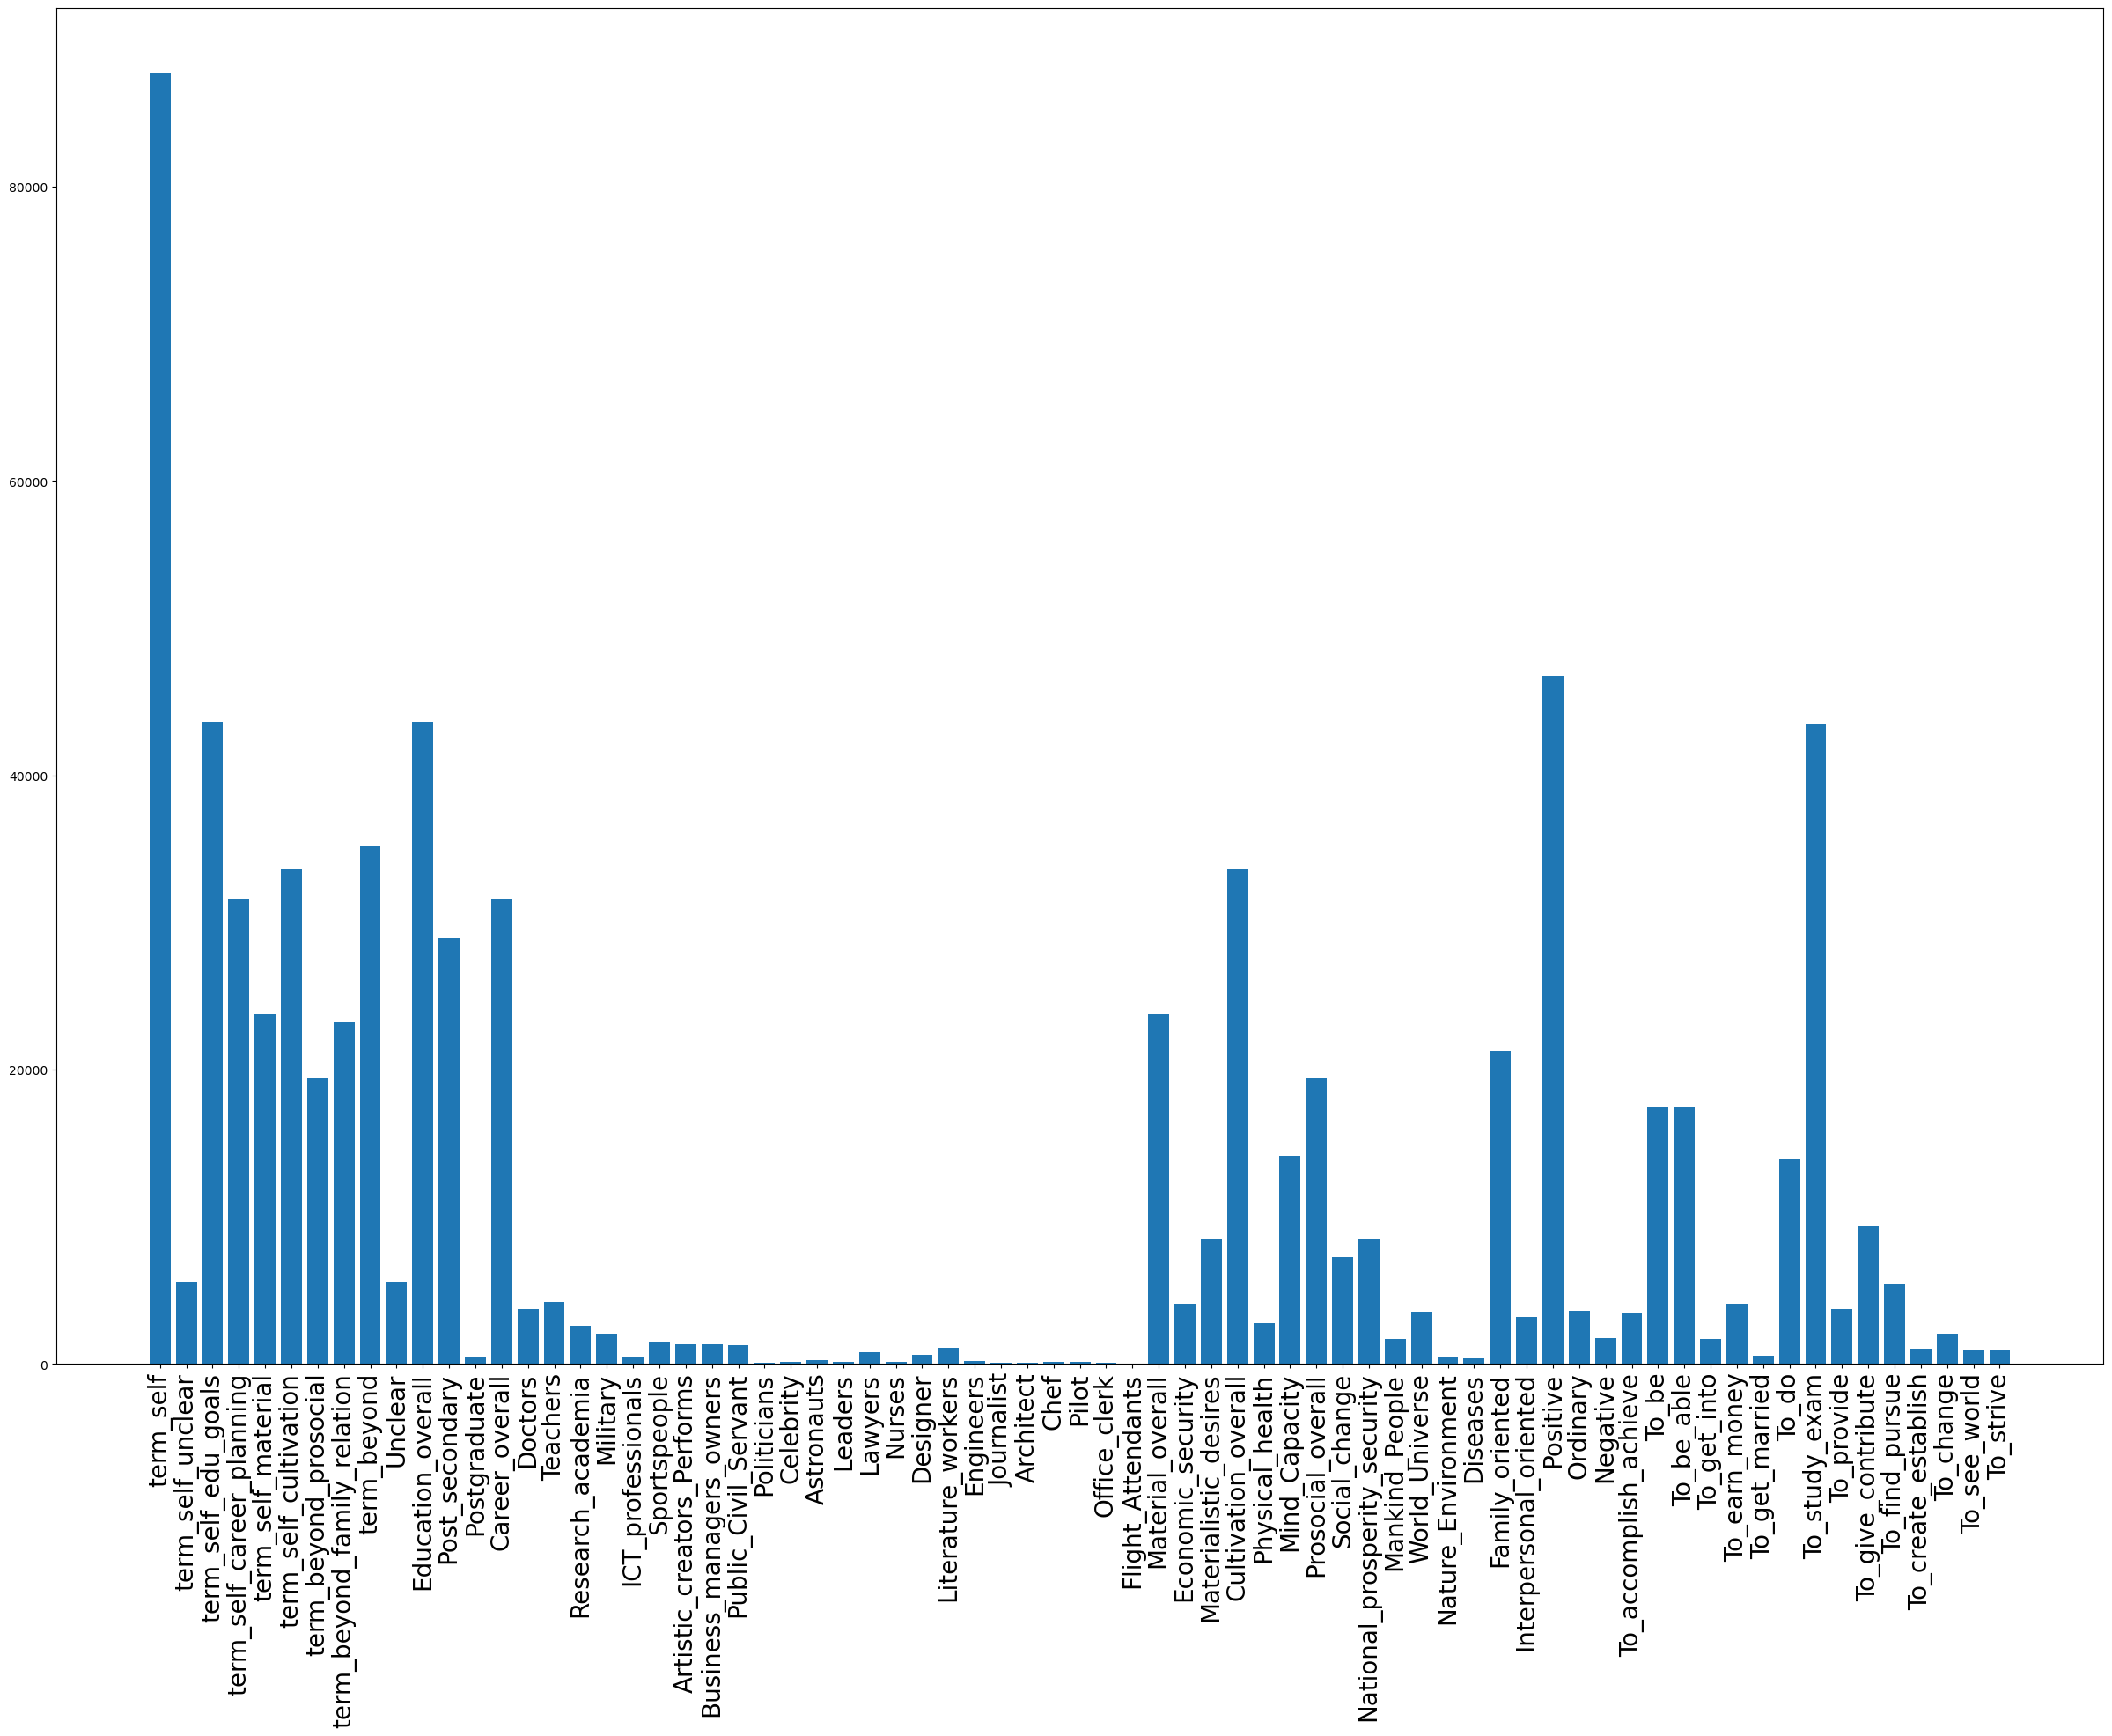

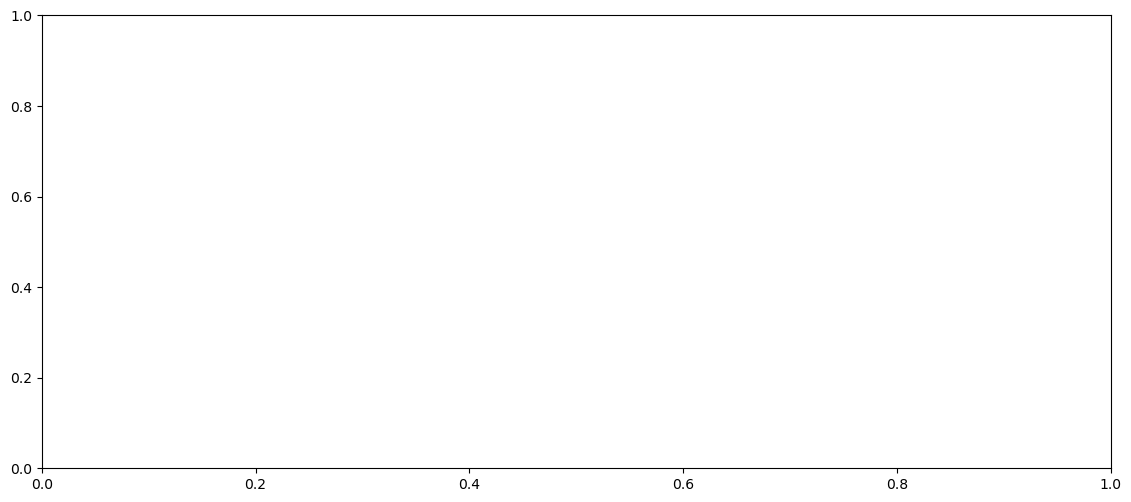

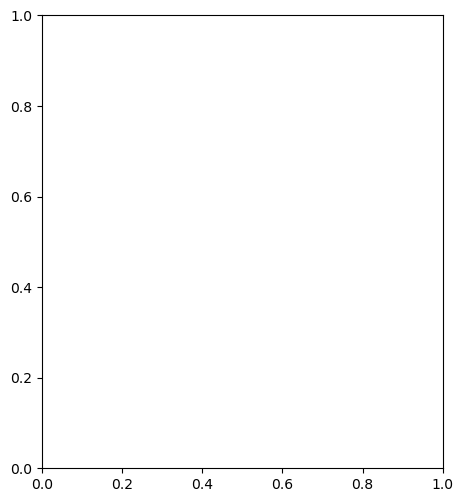

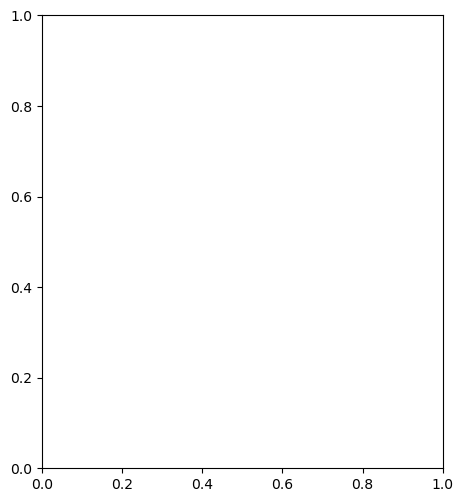

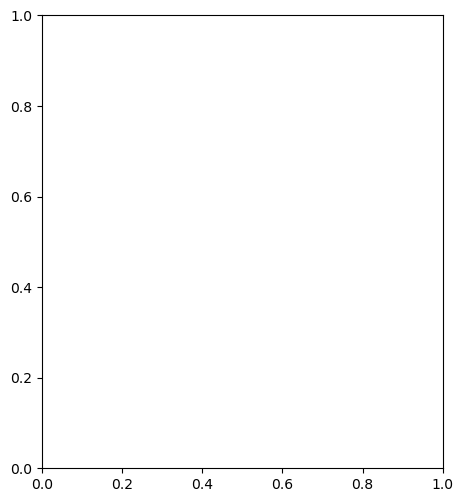

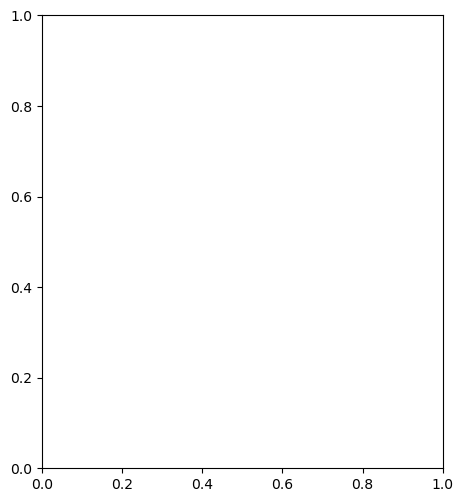

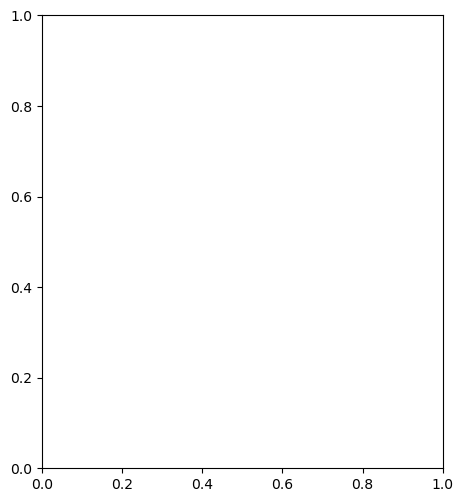

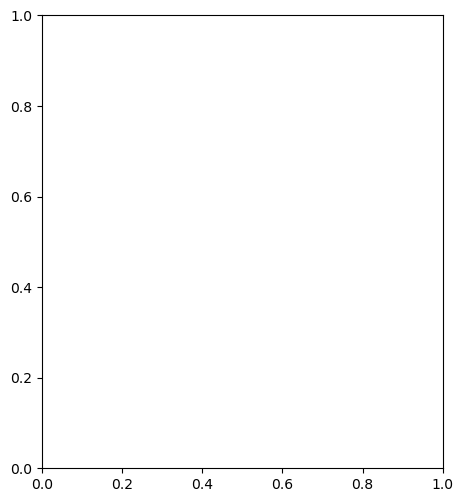

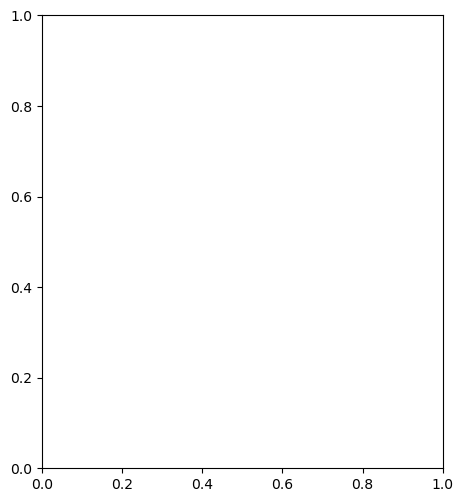

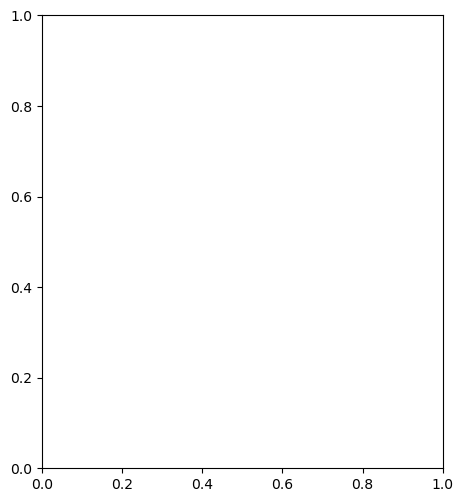

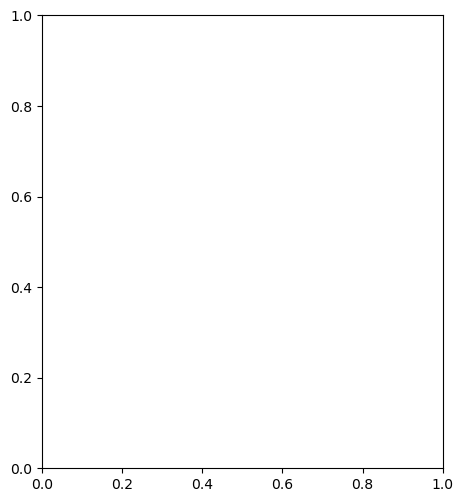

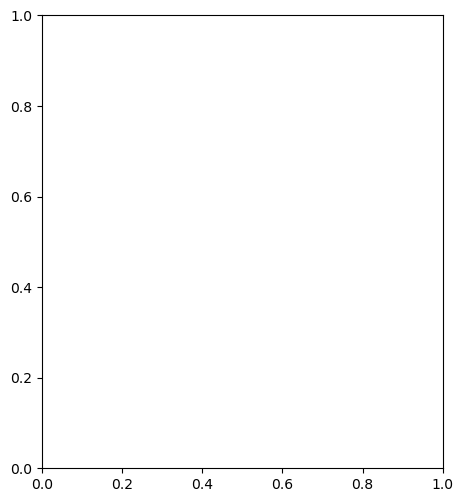

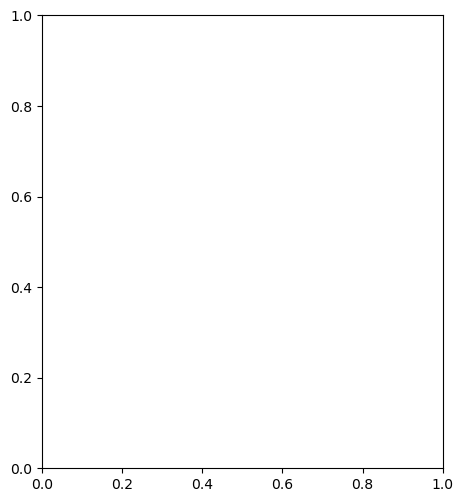

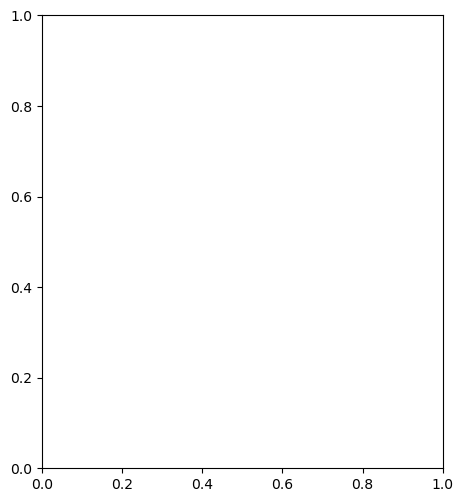

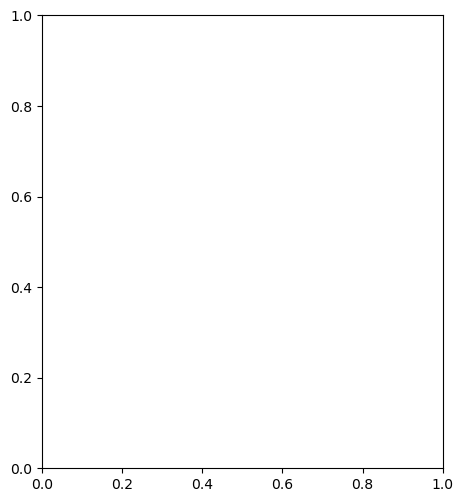

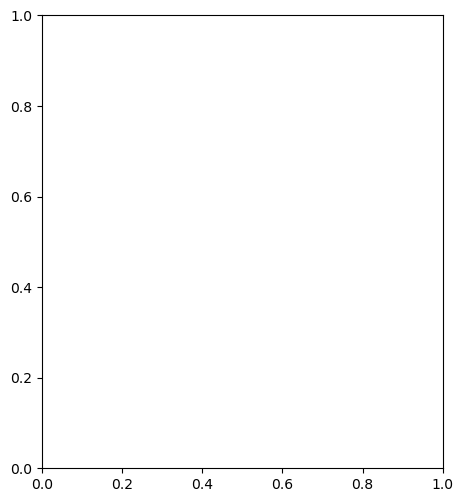

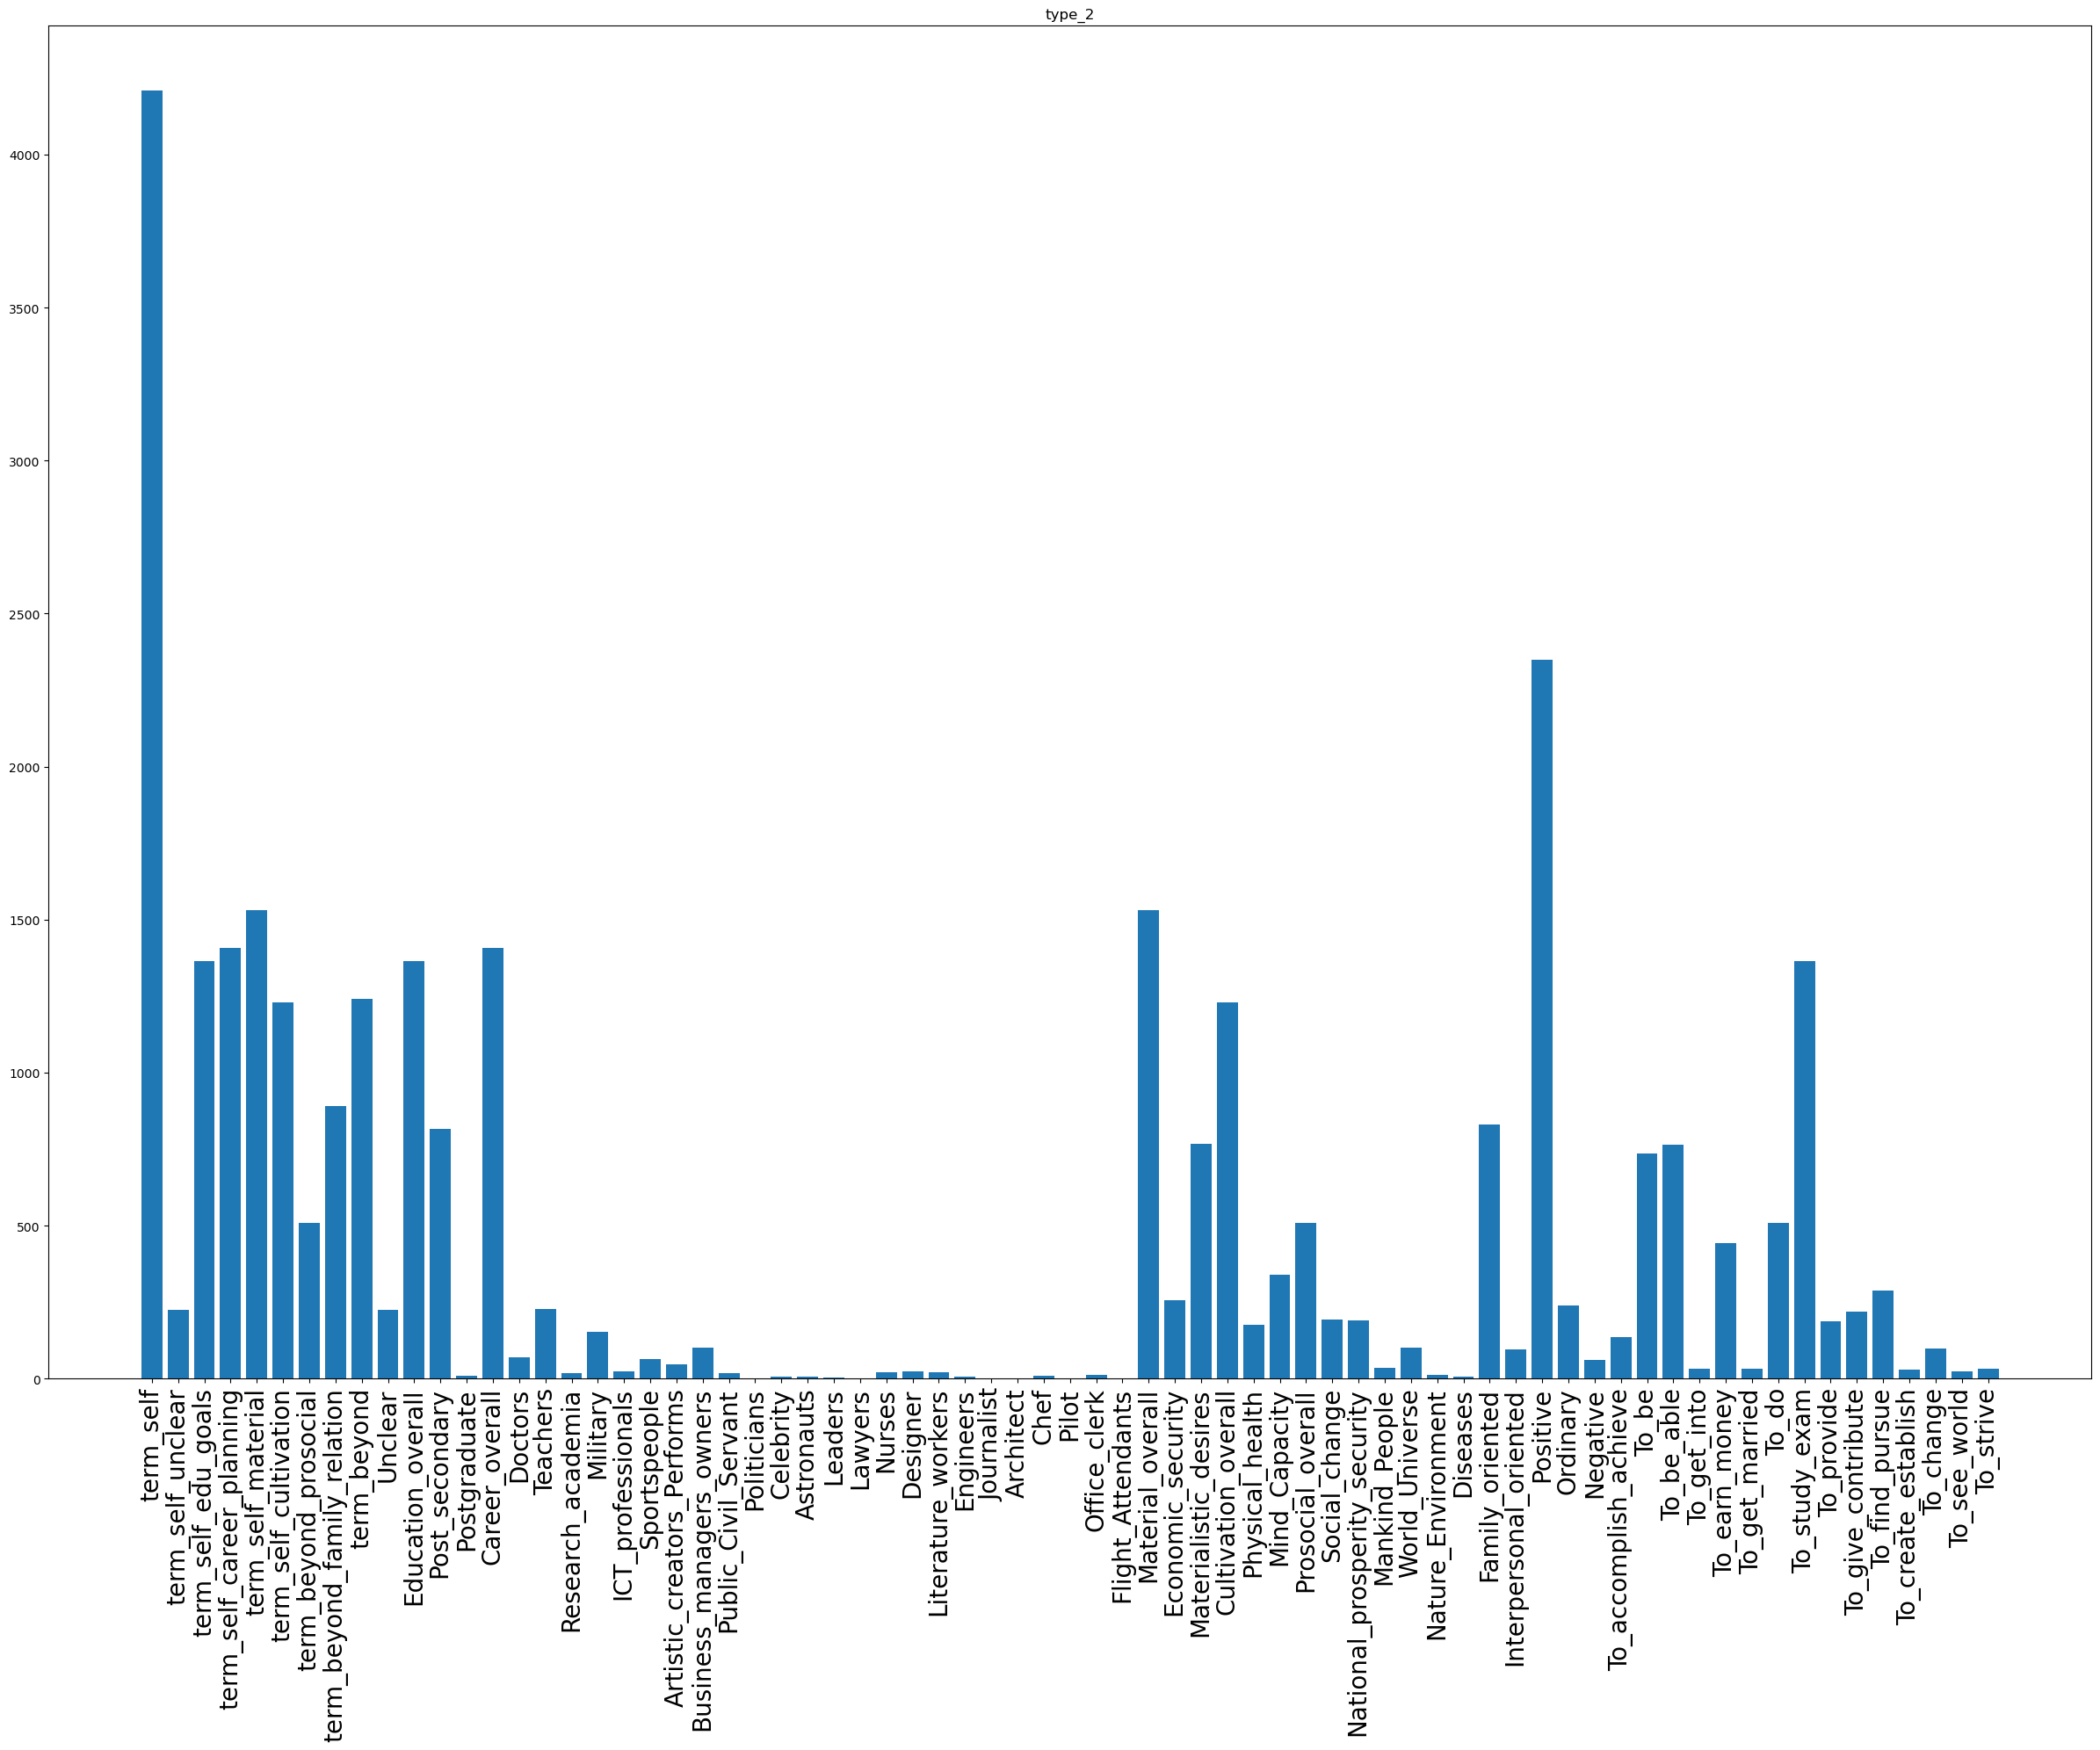

In [179]:
counts=count_num_all(total_data[0])

counts=counts.rename(columns={"number":total_name[0]})

plt.figure(figsize=(80,20))
for i in tqdm(range(len(total_name))):
    plt.subplot(3,5,i+1)
    count_0=count_num_all(total_data[i])
    count_0=count_0.rename(columns={"number":total_name[i]})
    if i!=0:
        counts=counts.merge(count_0,how='left',on='term')
    plt.title(total_name[i])
    
    
plt.subplots_adjust(hspace=0.6)

plt.savefig('big_cate_all.pdf',bbox_inches='tight')
    
plt.show()

## get rid of some

In [ ]:
def count_num_all(pddata):
    num_all=pd.DataFrame(all_items,columns=['term'])
    num_all.loc[:,'number']=[len(pddata[pddata[i].sum(axis=1)>0]) for i in all_items_values]
    plt.bar([i for i in range(len(num_all))],num_all['number'])
    plt.xticks([i for i in range(len(num_all))],num_all['term'].tolist(),rotation=90)
    return num_all

In [86]:
remove_Unclear=['从事', '事业']
remove_Education_overall=['同学', '小学教师', '中学老师', '中学校长', '同学聚会', '大学校长', '数学老师']+['校长', '母校', '大校', '党校']

                
remove_Career_overall=['医学院', '医科大', '医大']
                
remove_Business_managers_owners=['好公司', '大公司', '公司上班']
remove_Designer=['建筑设计']
                
remove_Literature_workers=['天文学']
remove_Material_overall=['车手', '赛车', '火车', '修车']+['经济学', '经济学家', '经济学', '经济管理学']
remove_Cultivation_overall=['德云社']+['军人', '人生', '太空人', '人士', '人大', '帮助的人', '身边的人', '爱的人', '爱人',  '别人',  '爱的人', '所爱之人', '他人', '周围的人', '爱我的人', '别人', '人际', '某人', '家人',  '商人', '家里人', '对的人', '想见的人', '人类', '人民', '机器人', '人员', '人海', '更多人', '为人处世', '喜欢的人', '超人', '常人', '有钱人', '人上人', '求人', '想见的人', '女人', '个人', '有人', '育人', '人性']
remove_Mind_Capacity=['德云社']

remove_Prosocial_overall=['生命科学', '生命的', '生命之花', '生命的美好', '生命有价值', '让生命', '生命中的', '新生命']+['环游世界', '看遍世界', '世界首富', '遨游世界', '周游世界', '游遍世界', '世界500强', '外面的世界']
remove_Family_oriented=['学家', '歌唱家', '艺术家', '舞蹈家', '书法家', '钢琴家']



In [92]:
remove_items=[]
for i in all_remove_items_values:
    remove_items=remove_items+i

In [117]:
len(all_data_frequency[all_data_frequency[all_remove_items_values[i]].sum(axis=1)>0])

1431

In [136]:

all_remove_back=['Unclear', 'Education_overall', 'Career_overall', 'Business_managers_owners', 'Designer', 'Literature_workers', 'Material_overall', 'Cultivation_overall', 'Mind_Capacity', 'Prosocial_overall', 'Family_oriented']
all_remove_items=['remove_Unclear', 'remove_Education_overall', 'remove_Career_overall', 'remove_Business_managers_owners', 'remove_Designer', 'remove_Literature_workers', 'remove_Material_overall', 'remove_Cultivation_overall', 'remove_Mind_Capacity', 'remove_Prosocial_overall', 'remove_Family_oriented']
all_remove_items_values=[remove_Unclear, remove_Education_overall, remove_Career_overall, remove_Business_managers_owners, remove_Designer, remove_Literature_workers, remove_Material_overall, remove_Cultivation_overall, remove_Mind_Capacity, remove_Prosocial_overall, remove_Family_oriented]
def move_num_all(pddata, Omit=True):
    num_all=pd.DataFrame(all_items,columns=['term'])
    num_all.loc[:,'number']=[len(pddata[pddata[i].sum(axis=1)>0]) for i in all_items_values]
#     print(num_all)
    if Omit:
        for i in range(len(all_remove_items_values)):
            num_omit=len(pddata[pddata[all_remove_items_values[i]].sum(axis=1)>0])
#             print(num_omit)
            location=num_all[num_all['term']==all_remove_back[i]].index.tolist()[0]
#             print(num_all.loc[location]['number'])
            num_all.loc[location,'number']=num_all.loc[location]['number']-num_omit
#             print(num_all.loc[location]['number'])
    plt.bar([i for i in range(len(num_all))],num_all['number'])
    plt.xticks([i for i in range(len(num_all))],num_all['term'].tolist(),rotation=90)
    return num_all

In [158]:
counts=move_num_all(total_data[0])

counts=counts.rename(columns={"number":total_name[0]})

plt.figure(figsize=(20,18))
for i in tqdm(range(len(total_name))):
    plt.subplot(3,5,i+1)
    count_0=move_num_all(total_data[i])
    count_0=count_0.rename(columns={"number":total_name[i]})
    if i!=0:
        counts=counts.merge(count_0,how='left',on='term')
    plt.title(total_name[i])
    
    
plt.subplots_adjust(hspace=0.6)

plt.savefig('big_cate_remove.pdf',bbox_inches='tight')
    
plt.show()

In [140]:
counts.to_csv('all_term_frequency_62_remove.csv')

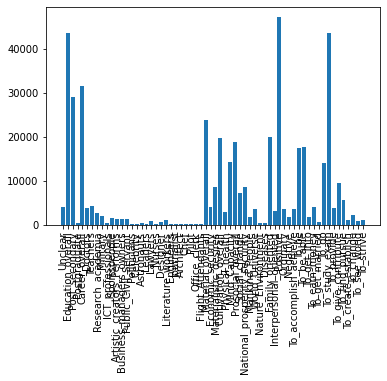

In [130]:
ggg=move_num_all(all_data_frequency,Omit=True)

In [87]:
def count_num(pddata):
    num_self_unclear=len(pddata[pddata[term_self_unclear].sum(axis=1)>0])
    num_self_edu_goals=len(pddata[pddata[term_self_edu_goals].sum(axis=1)>0])
    num_self_career_planning=len(pddata[pddata[term_self_career_planning].sum(axis=1)>0])
    num_self_material=len(pddata[pddata[term_self_material].sum(axis=1)>0])
    num_self_cultivation=len(pddata[pddata[term_self_cultivation].sum(axis=1)>0])
    num_self=len(pddata[pddata[term_self].sum(axis=1)>0])
    
    
    num_beyond_prosocial=len(pddata[pddata[term_beyond_prosocial].sum(axis=1)>0])  
    num_beyond_family_relation=len(pddata[pddata[term_beyond_family_relation].sum(axis=1)>0])  
    num_beyond=len(pddata[pddata[term_beyond].sum(axis=1)>0])
    
    num_pd=pd.DataFrame(['term_self_unclear','term_self_edu_goals','term_self_career_planning','term_self_material','term_self_cultivation','term_self','term_beyond_prosocial','term_beyond_family_relation','term_beyond'],columns=['term'])
    num_pd.loc[:,'number']=[num_self_unclear,num_self_edu_goals,num_self_career_planning,num_self_material,num_self_cultivation,num_self,num_beyond_prosocial,num_beyond_family_relation,num_beyond]
    plt.bar([i for i in range(len(num_pd))],num_pd['number'])

    plt.xticks([i for i in range(len(num_pd))],num_pd['term'].tolist(),rotation=90)
#     plt.show()
    
    return num_pd


In [80]:
all_data_frequency[['Gender', 'Stage', 'O_Child', 'S_Region', 'S_Area', 'S_Type']][1:3]

Gender  Stage  O_Child  S_Region  S_Area  S_Type
1     1.0    1.0      0.0       1.0     0.0     1.0
2     0.0    1.0      0.0       1.0     0.0     1.0

term  number
0            term_self_unclear    5605
1          term_self_edu_goals   43636
2    term_self_career_planning   31616
3           term_self_material   23779
4        term_self_cultivation   33645
5                    term_self   87740
6        term_beyond_prosocial   19492
7  term_beyond_family_relation   23245
8                  term_beyond   35174

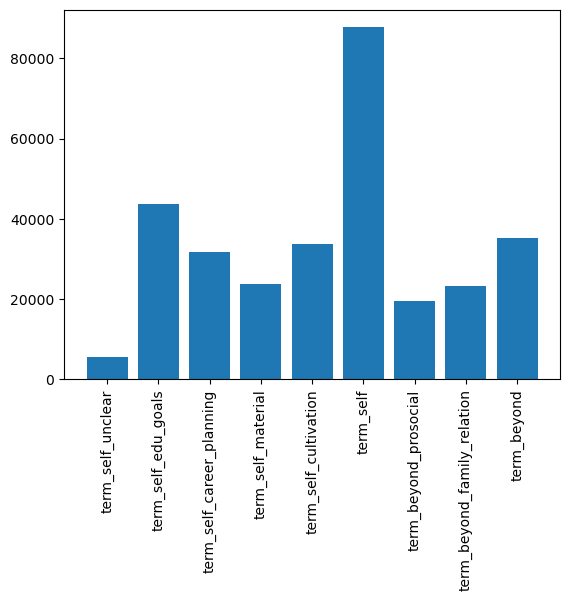

In [160]:
count_num(total_data[0])

In [46]:
counts.to_csv('all_frequency_item.csv')

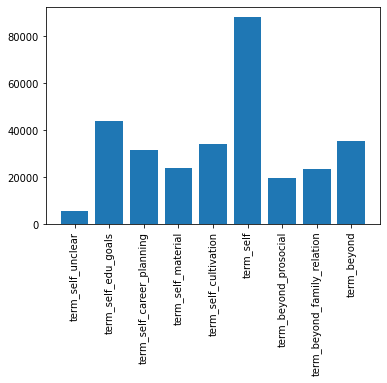

100%|██████████| 12/12 [00:13<00:00,  1.09s/it]


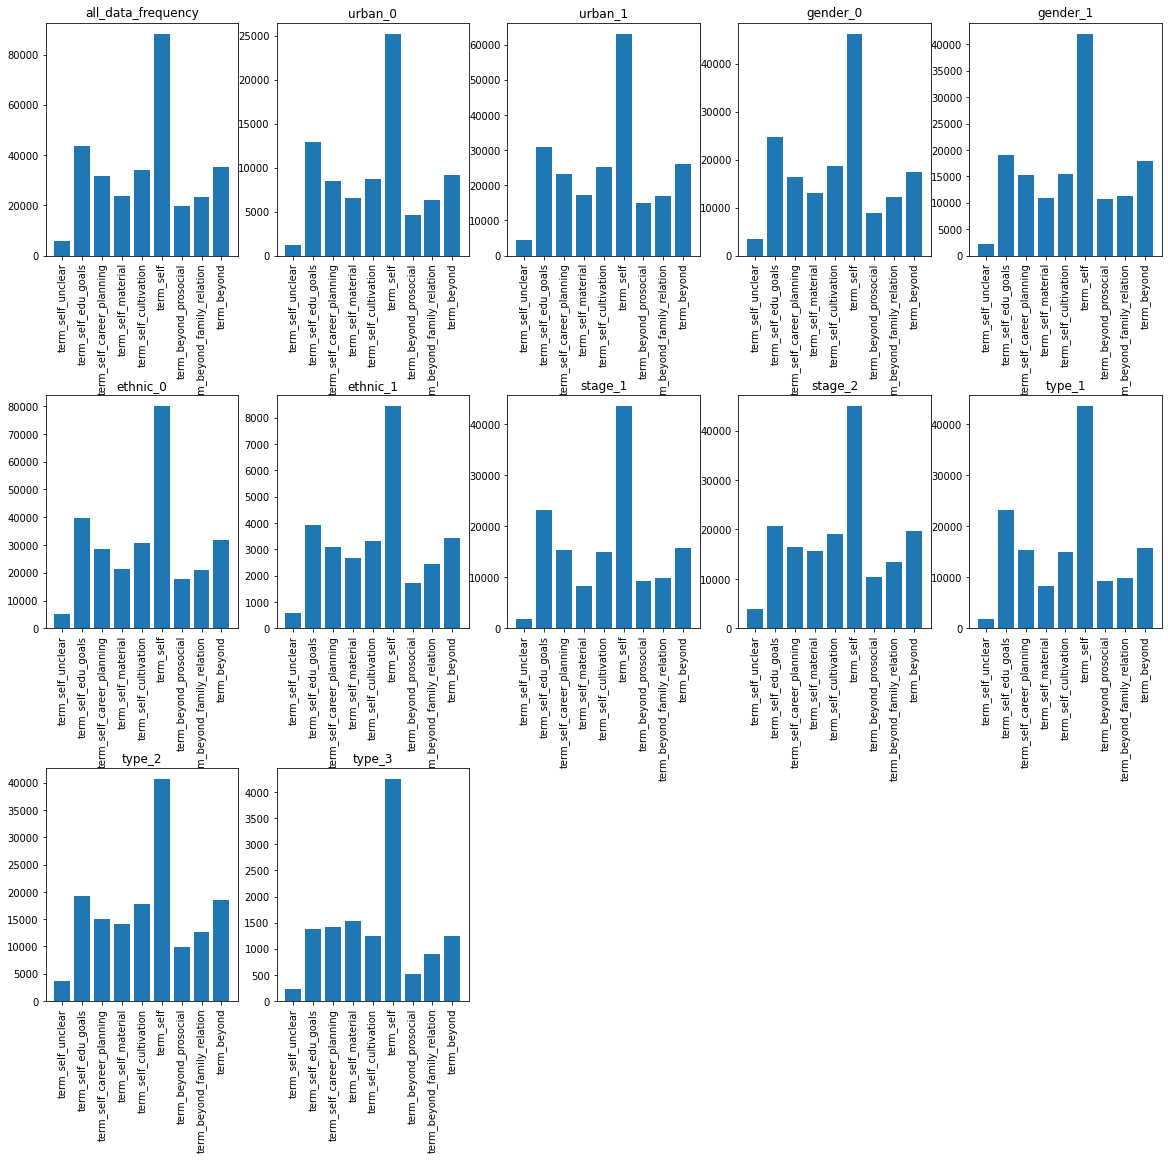

In [24]:

counts=count_num(total_data[0])
plt.show()
counts=counts.rename(columns={"number":total_name[0]})

plt.figure(figsize=(20,18))
for i in tqdm(range(len(total_name))):
    plt.subplot(3,5,i+1)
    count_0=count_num(total_data[i])
    count_0=count_0.rename(columns={"number":total_name[i]})
    if i!=0:
        counts=counts.merge(count_0,how='left',on='term')
    plt.title(total_name[i])
    
    
plt.subplots_adjust(hspace=0.6)

plt.savefig('big_cate.pdf',bbox_inches='tight')
    
plt.show()


In [132]:
total_data_num=[len(total_data[i]) for i in range(len(total_data))]

num_list=pd.DataFrame([total_name,total_data_num])

counts.loc[8,:]=['total_num']+list(num_list[1:].values[0])

# counts.to_csv('first_class_0905.csv')

In [141]:
counts

term  all_data_frequency  urban_0  urban_1  gender_0  \
0               Unclear                3939      947     2992      2461   
1     Education_overall               43631    12929    30702     24701   
2        Post_secondary               29055     8817    20238     17099   
3          Postgraduate                 462      109      353       233   
4        Career_overall               31559     8483    23076     16364   
..                  ...                 ...      ...      ...       ...   
57       To_find_pursue                5539     1426     4113      2953   
58  To_create_establish                1034      224      810       389   
59            To_change                2078      591     1487      1187   
60         To_see_world                 910      243      667       606   
61            To_strive                 945      220      725       423   

    gender_1  ethnic_0  ethnic_1  stage_1  stage_2  type_1  type_2  type_3  
0       1478      3533       406     1294     2645    1294    2484     161  
1      18930     39701      3930    23057    20574   23057   19210    1364  
2      11956     26242      2813    12603    16452   12603   15634     818  
3        229       428        34      269      193     269     182      11  
4      15195     28486      3073    15324    16235   15324   14822    1413  
..       ...       ...       ...      ...      ...     ...     ...     ...  
57      2586      4923       616     2096     3443    2096    3148     295  
58       645       930       104      353      681     353     651      30  
59       891      1845       233      792     1286     792    1188      98  
60       304       823        87      307      603     307     578      25  
61       522       863        82      492      453     492     420      33  

[62 rows x 13 columns]

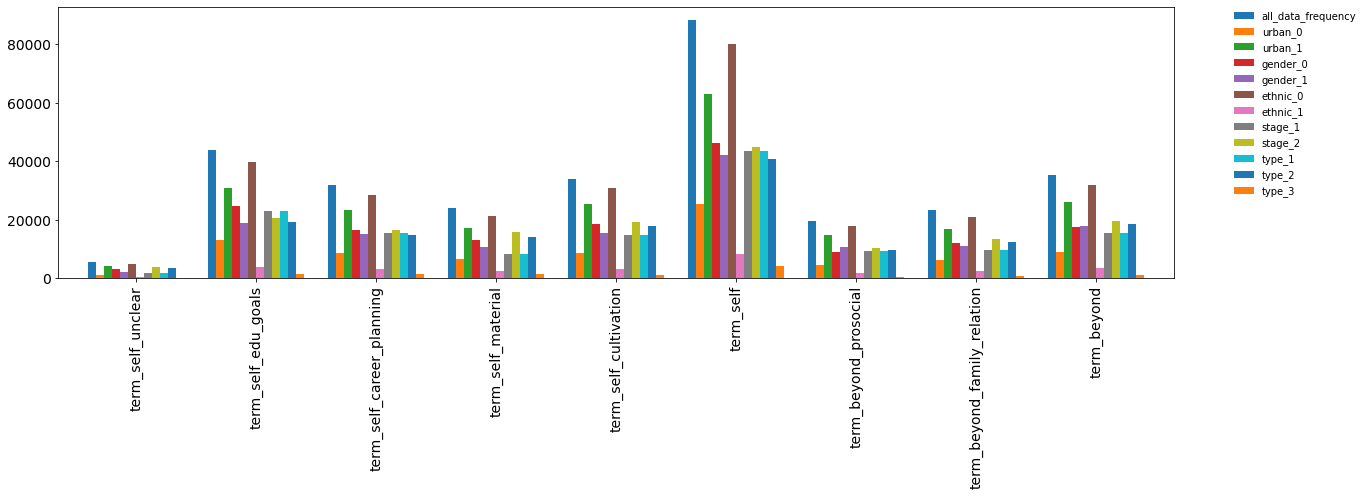

In [26]:


counts.plot.bar(figsize=(20,5),width = 0.8)

plt.legend(frameon=False,loc=2, bbox_to_anchor=(1.05,1.0),borderaxespad = 0.)
plt.xticks([i for i in range(len(counts))],counts['term'].tolist(),fontsize=14)
plt.yticks(fontsize=14)
# plt.savefig('big_cate_total_0905.pdf',bbox_inches='tight')
plt.show()

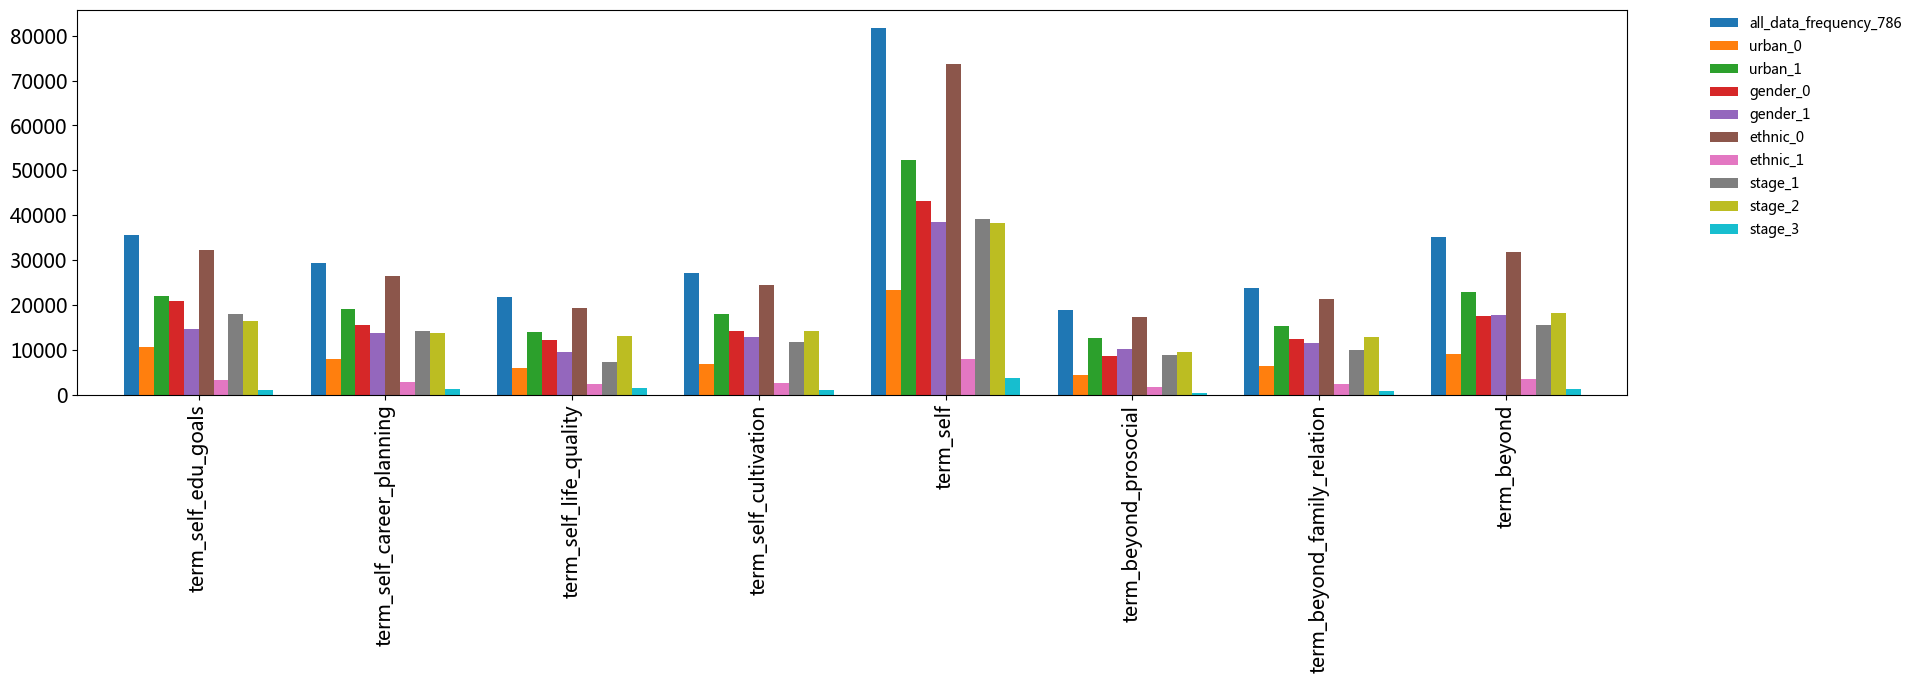

In [135]:
counts_cate=counts[0:8]
counts_cate.plot.bar(figsize=(20,5),width = 0.8)

plt.legend(frameon=False,loc=2, bbox_to_anchor=(1.05,1.0),borderaxespad = 0.)
plt.xticks([i for i in range(len(counts_cate))],counts_cate['term'].tolist(),fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('big_cate_0905.pdf',bbox_inches='tight')
plt.show()

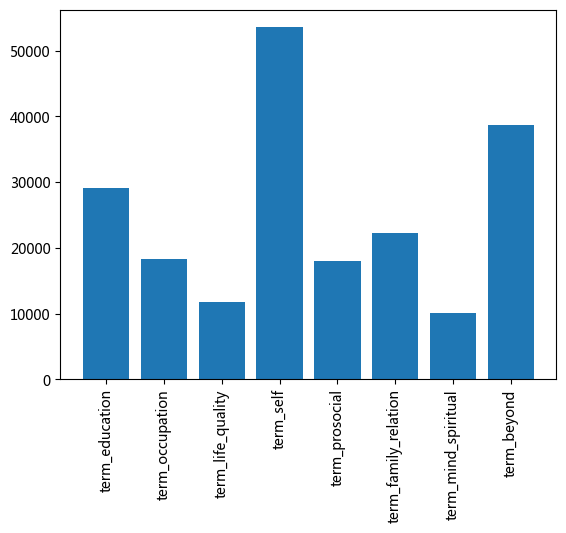

In [147]:
num_total=count_num(all_data_frequency_858)

## Example

In [555]:
# all_data_frequency[all_data_frequency[cols_series[0]]>0]

In [137]:
def draw_selective(cols_name, cols_data, topic_name='occupation',total_data=all_data_frequency_786_final):
    data_sel=pd.DataFrame(cols_name).rename(columns={0:topic_name})
    for i in tqdm(range(len(data_sel))):
        data_sel.loc[i,'counts']=len(total_data[total_data[cols_data[i]].sum(axis=1)>0])
        
    data_sel=data_sel.sort_values(by='counts',ascending=False)
    
   
    plt.bar([i for i in range(len(data_sel))],data_sel['counts'])
    plt.xticks([i for i in range(len(data_sel))],data_sel[topic_name].tolist(),rotation=90)
#     plt.show()


In [138]:
def draw_selective_decom(cols_name, cols_data, topic_name='occupation',total_data=all_data_frequency_786_final,data_0='gender_0',data_1='gender_1',data_2_yes=False,data_2='gender_2'):
    data_sel=pd.DataFrame(cols_name).rename(columns={0:topic_name})
    for i in tqdm(range(len(data_sel))):
        data_sel.loc[i,'counts_total']=len(total_data[total_data[cols_data[i]].sum(axis=1)>0])
        data_sel.loc[i,'counts_de_0']=len(data_0[data_0[cols_data[i]].sum(axis=1)>0])
        data_sel.loc[i,'counts_de_1']=len(data_1[data_1[cols_data[i]].sum(axis=1)>0])
        if data_2_yes:
#         if data_2.values.any():
            data_sel.loc[i,'counts_de_2']=len(data_2[data_2[cols_data[i]].sum(axis=1)>0])
        
    data_sel=data_sel.sort_values(by='counts_total',ascending=False)
    
   
#     plt.bar([i for i in range(len(data_sel))],data_sel['counts_total'])
    plt.bar([i for i in range(len(data_sel))],data_sel['counts_de_0'])
    plt.bar([i for i in range(len(data_sel))],-data_sel['counts_de_1'])
    plt.xticks([i for i in range(len(data_sel))],data_sel[topic_name].tolist(),rotation=90)
    plt.legend(
               labels=['0', '1'],
               loc='best')
    if data_2_yes:
#     if data_2.values.any():
        plt.bar([i for i in range(len(data_sel))],-data_sel['counts_de_2'])
        plt.legend(
               labels=['0', '1', '2'],
               loc='best')


    return data_sel


In [ ]:
## Occupation

### Urban

100%|██████████| 24/24 [00:00<00:00, 40.52it/s]


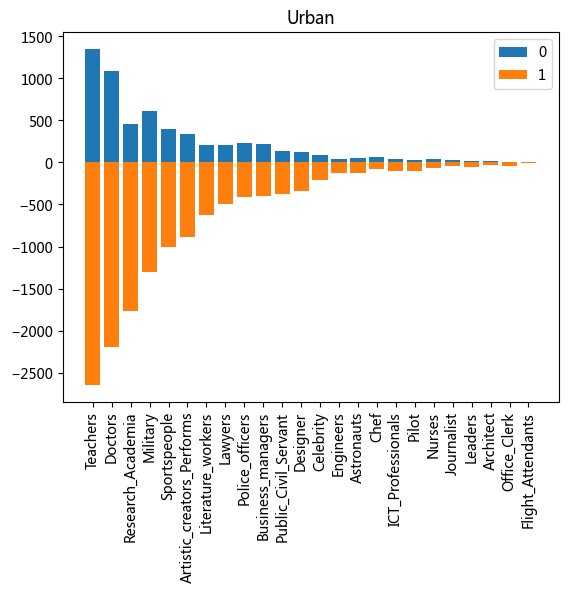

In [139]:
urban_0=all_data_frequency_786_final[(all_data_frequency_786_final['s_urban']==0) | (all_data_frequency_786_final['s_urban']=='0')]
urban_1=all_data_frequency_786_final[(all_data_frequency_786_final['s_urban']==1) | (all_data_frequency_786_final['s_urban']=='1')]

urban_occupa=draw_selective_decom(noun_cols[4:28], noun_data[4:28],total_data=all_data_frequency_786_final,data_0=urban_0,data_1=urban_1,data_2=False)
urban_occupa=urban_occupa.rename(columns={'counts_total':'counts_total','counts_de_0':'urban_0','counts_de_1':'urban_1'})
plt.title('Urban')
plt.show()

### Gender

In [140]:
gender_0=all_data_frequency_786_final[all_data_frequency_786_final['s_gender']==0]
gender_1=all_data_frequency_786_final[all_data_frequency_786_final['s_gender']==1]

gender_occupa=draw_selective_decom(noun_cols[4:28], noun_data[4:28],total_data=all_data_frequency_786_final,data_0=gender_0,data_1=gender_1,data_2=False)

gender_occupa=gender_occupa[['occupation', 'counts_de_0', 'counts_de_1']]
gender_occupa=gender_occupa.rename(columns={'counts_total':'counts_total','counts_de_0':'gender_0','counts_de_1':'gender_1'})

plt.title('Gender')
plt.show()

100%|██████████| 24/24 [00:00<00:00, 41.97it/s]


### Ethnic

100%|██████████| 24/24 [00:00<00:00, 34.01it/s]


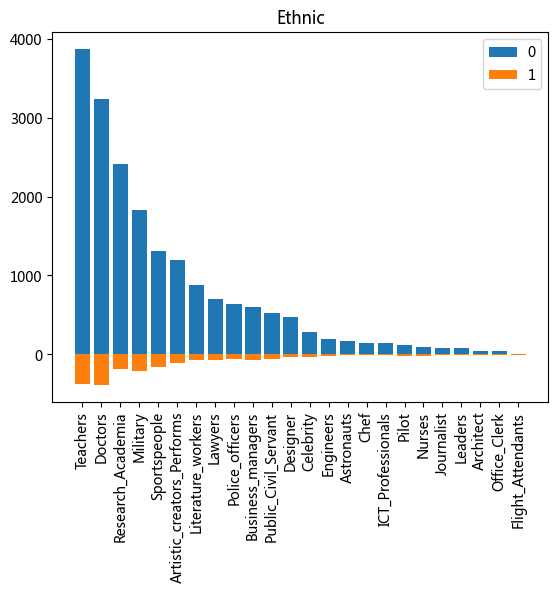

In [142]:
ethnic_0=all_data_frequency_786_final[all_data_frequency_786_final['s_ethnic']==0]
ethnic_1=all_data_frequency_786_final[all_data_frequency_786_final['s_ethnic']==1]

ethnic_occupa=draw_selective_decom(noun_cols[4:28], noun_data[4:28],total_data=all_data_frequency_786_final,data_0=ethnic_0,data_1=ethnic_1,data_2=False)
ethnic_occupa=ethnic_occupa[['occupation', 'counts_de_0', 'counts_de_1']]
ethnic_occupa=ethnic_occupa.rename(columns={'counts_total':'counts_total','counts_de_0':'ethnic_0','counts_de_1':'ethnic_1'})


plt.title('Ethnic')
plt.show()

### Stage

In [143]:
stage_1=all_data_frequency_786_final[all_data_frequency_786_final['s_stage']==1]
stage_2=all_data_frequency_786_final[all_data_frequency_786_final['s_stage']==2]
stage_3=all_data_frequency_786_final[all_data_frequency_786_final['s_stage']==3]
stage_occupa=draw_selective_decom(noun_cols[4:28], noun_data[4:28],total_data=all_data_frequency_786_final,data_0=stage_1,data_1=stage_2,data_2_yes=True,data_2=stage_3)

stage_occupa=stage_occupa[['occupation', 'counts_de_0', 'counts_de_1','counts_de_2']]
stage_occupa=stage_occupa.rename(columns={'counts_total':'counts_total','counts_de_0':'stage_1','counts_de_1':'stage_2','counts_de_2':'stage_3'})


plt.title('Stage')
plt.show()

100%|██████████| 24/24 [00:00<00:00, 39.09it/s]


In [ ]:
### Total Figure occupation

100%|██████████| 26/26 [00:00<00:00, 34.60it/s]
<ipython-input-147-375a03a716e5>:49: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox_inch" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('occupation_total_0905.pdf',bbox_inch='tight')


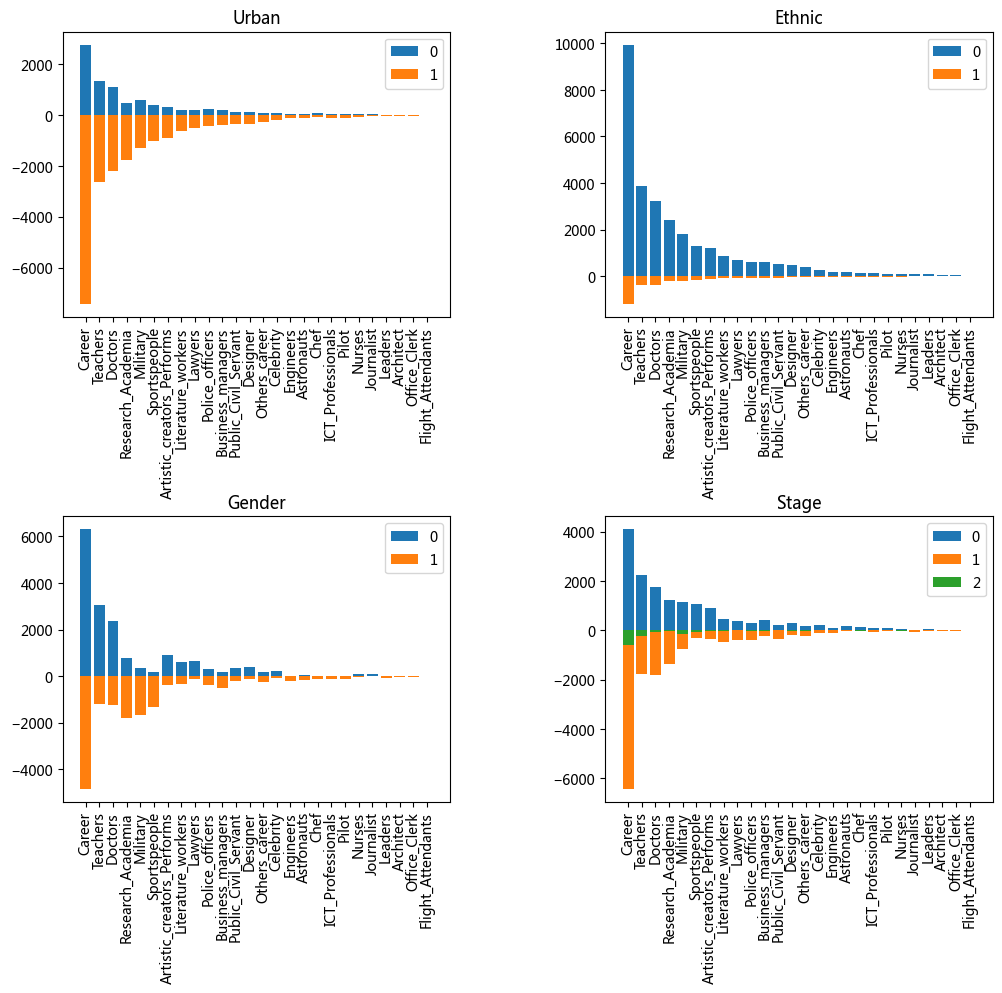

In [147]:
plt.figure(figsize=(12,10))

plt.subplot(2,2,1)
urban_0=all_data_frequency_786_final[(all_data_frequency_786_final['s_urban']==0) | (all_data_frequency_786_final['s_urban']=='0')]
urban_1=all_data_frequency_786_final[(all_data_frequency_786_final['s_urban']==1) | (all_data_frequency_786_final['s_urban']=='1')]

urban_occupa=draw_selective_decom(noun_cols[3:29], noun_data[3:29],total_data=all_data_frequency_786_final,data_0=urban_0,data_1=urban_1,data_2=False)
urban_occupa=urban_occupa.rename(columns={'counts_total':'counts_total','counts_de_0':'urban_0','counts_de_1':'urban_1'})
plt.title('Urban')


plt.subplot(2,2,3)
gender_0=all_data_frequency_786_final[all_data_frequency_786_final['s_gender']==0]
gender_1=all_data_frequency_786_final[all_data_frequency_786_final['s_gender']==1]

gender_occupa=draw_selective_decom(noun_cols[3:29], noun_data[3:29],total_data=all_data_frequency_786_final,data_0=gender_0,data_1=gender_1,data_2=False)

gender_occupa=gender_occupa[['occupation', 'counts_de_0', 'counts_de_1']]
gender_occupa=gender_occupa.rename(columns={'counts_total':'counts_total','counts_de_0':'gender_0','counts_de_1':'gender_1'})

plt.title('Gender')

plt.subplot(2,2,2)
ethnic_0=all_data_frequency_786_final[all_data_frequency_786_final['s_ethnic']==0]
ethnic_1=all_data_frequency_786_final[all_data_frequency_786_final['s_ethnic']==1]

ethnic_occupa=draw_selective_decom(noun_cols[3:29], noun_data[3:29],total_data=all_data_frequency_786_final,data_0=ethnic_0,data_1=ethnic_1,data_2=False)
ethnic_occupa=ethnic_occupa[['occupation', 'counts_de_0', 'counts_de_1']]
ethnic_occupa=ethnic_occupa.rename(columns={'counts_total':'counts_total','counts_de_0':'ethnic_0','counts_de_1':'ethnic_1'})


plt.title('Ethnic')


plt.subplot(2,2,4)
stage_1=all_data_frequency_786_final[all_data_frequency_786_final['s_stage']==1]
stage_2=all_data_frequency_786_final[all_data_frequency_786_final['s_stage']==2]
stage_3=all_data_frequency_786_final[all_data_frequency_786_final['s_stage']==3]
stage_occupa=draw_selective_decom(noun_cols[3:29], noun_data[3:29],total_data=all_data_frequency_786_final,data_0=stage_1,data_1=stage_2,data_2_yes=True,data_2=stage_3)

stage_occupa=stage_occupa[['occupation', 'counts_de_0', 'counts_de_1','counts_de_2']]
stage_occupa=stage_occupa.rename(columns={'counts_total':'counts_total','counts_de_0':'stage_1','counts_de_1':'stage_2','counts_de_2':'stage_3'})


plt.title('Stage')

plt.subplots_adjust(wspace=0.4,hspace=0.7)

plt.savefig('occupation_total_0905.pdf',bbox_inch='tight')

plt.show()


In [148]:
total_occupa=urban_occupa.merge(gender_occupa,how='left',on='occupation')
total_occupa=total_occupa.merge(ethnic_occupa,how='left',on='occupation')
total_occupa=total_occupa.merge(stage_occupa,how='left',on='occupation')

total_occupa.to_csv('occupation_total_0905.csv')

In [ ]:
## Education

100%|██████████| 3/3 [00:00<00:00,  8.28it/s]
<ipython-input-151-2bf810055f5f>:49: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox_inch" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('education_total_0905.pdf',bbox_inch='tight')


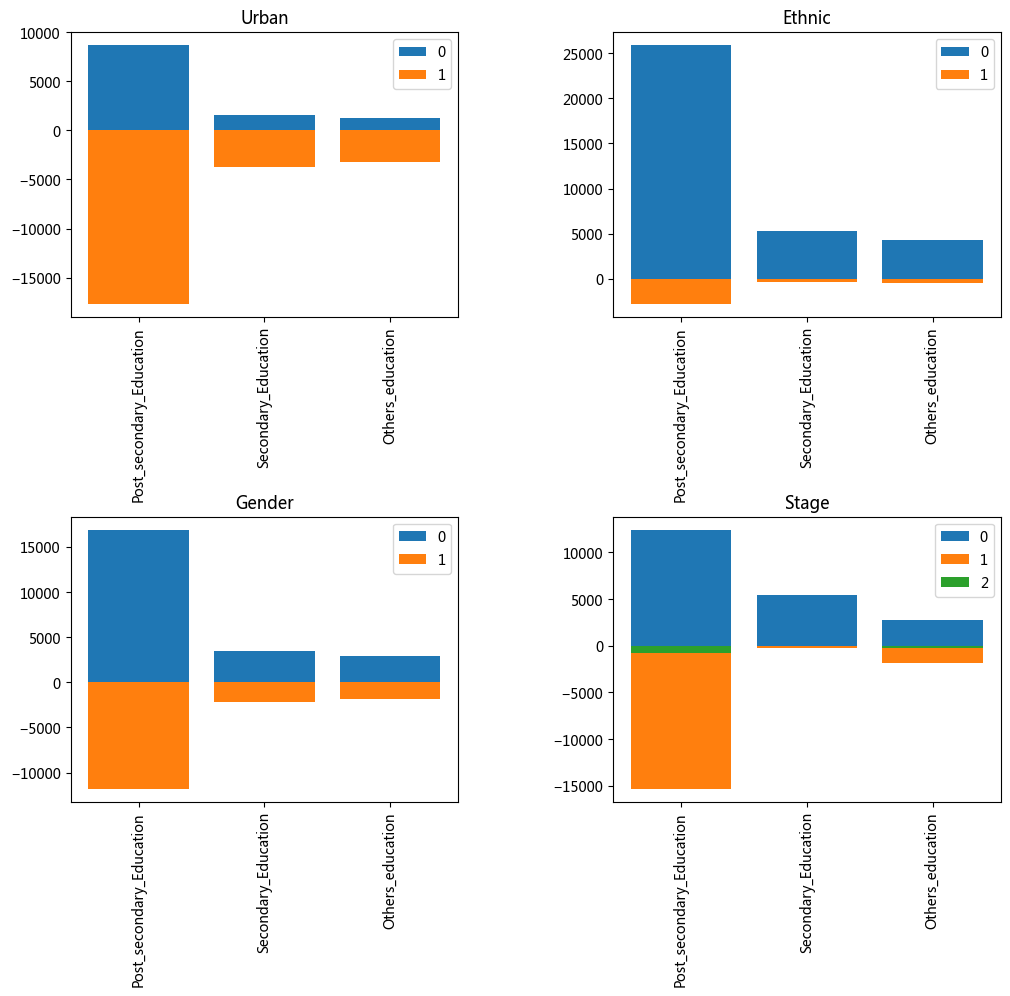

In [151]:
plt.figure(figsize=(12,10))

plt.subplot(2,2,1)
urban_0=all_data_frequency_786_final[(all_data_frequency_786_final['s_urban']==0) | (all_data_frequency_786_final['s_urban']=='0')]
urban_1=all_data_frequency_786_final[(all_data_frequency_786_final['s_urban']==1) | (all_data_frequency_786_final['s_urban']=='1')]

urban_educa=draw_selective_decom(noun_cols[0:3], noun_data[0:3],topic_name='education',total_data=all_data_frequency_786_final,data_0=urban_0,data_1=urban_1,data_2=False)
urban_educa=urban_educa.rename(columns={'counts_total':'counts_total','counts_de_0':'urban_0','counts_de_1':'urban_1'})
plt.title('Urban')


plt.subplot(2,2,3)
gender_0=all_data_frequency_786_final[all_data_frequency_786_final['s_gender']==0]
gender_1=all_data_frequency_786_final[all_data_frequency_786_final['s_gender']==1]

gender_educa=draw_selective_decom(noun_cols[0:3], noun_data[0:3],topic_name='education',total_data=all_data_frequency_786_final,data_0=gender_0,data_1=gender_1,data_2=False)

gender_educa=gender_educa[['education', 'counts_de_0', 'counts_de_1']]
gender_educa=gender_educa.rename(columns={'counts_total':'counts_total','counts_de_0':'gender_0','counts_de_1':'gender_1'})

plt.title('Gender')

plt.subplot(2,2,2)
ethnic_0=all_data_frequency_786_final[all_data_frequency_786_final['s_ethnic']==0]
ethnic_1=all_data_frequency_786_final[all_data_frequency_786_final['s_ethnic']==1]

ethnic_educa=draw_selective_decom(noun_cols[0:3], noun_data[0:3],topic_name='education',total_data=all_data_frequency_786_final,data_0=ethnic_0,data_1=ethnic_1,data_2=False)
ethnic_educa=ethnic_educa[['education', 'counts_de_0', 'counts_de_1']]
ethnic_educa=ethnic_educa.rename(columns={'counts_total':'counts_total','counts_de_0':'ethnic_0','counts_de_1':'ethnic_1'})


plt.title('Ethnic')


plt.subplot(2,2,4)
stage_1=all_data_frequency_786_final[all_data_frequency_786_final['s_stage']==1]
stage_2=all_data_frequency_786_final[all_data_frequency_786_final['s_stage']==2]
stage_3=all_data_frequency_786_final[all_data_frequency_786_final['s_stage']==3]
stage_educa=draw_selective_decom(noun_cols[0:3], noun_data[0:3],topic_name='education',total_data=all_data_frequency_786_final,data_0=stage_1,data_1=stage_2,data_2_yes=True,data_2=stage_3)

stage_educa=stage_educa[['education', 'counts_de_0', 'counts_de_1','counts_de_2']]
stage_educa=stage_educa.rename(columns={'counts_total':'counts_total','counts_de_0':'stage_1','counts_de_1':'stage_2','counts_de_2':'stage_3'})


plt.title('Stage')

plt.subplots_adjust(wspace=0.4,hspace=0.7)

plt.savefig('education_total_0905.pdf',bbox_inch='tight')

plt.show()




In [152]:
total_educa=urban_educa.merge(gender_educa,how='left',on='education')
total_educa=total_educa.merge(ethnic_educa,how='left',on='education')
total_educa=total_educa.merge(stage_educa,how='left',on='education')

total_educa.to_csv('education_total_0905.csv')


100%|██████████| 43/43 [00:02<00:00, 17.21it/s]
<ipython-input-154-3ba4b291a1ba>:49: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox_inch" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('all_total_0905.pdf',bbox_inch='tight')


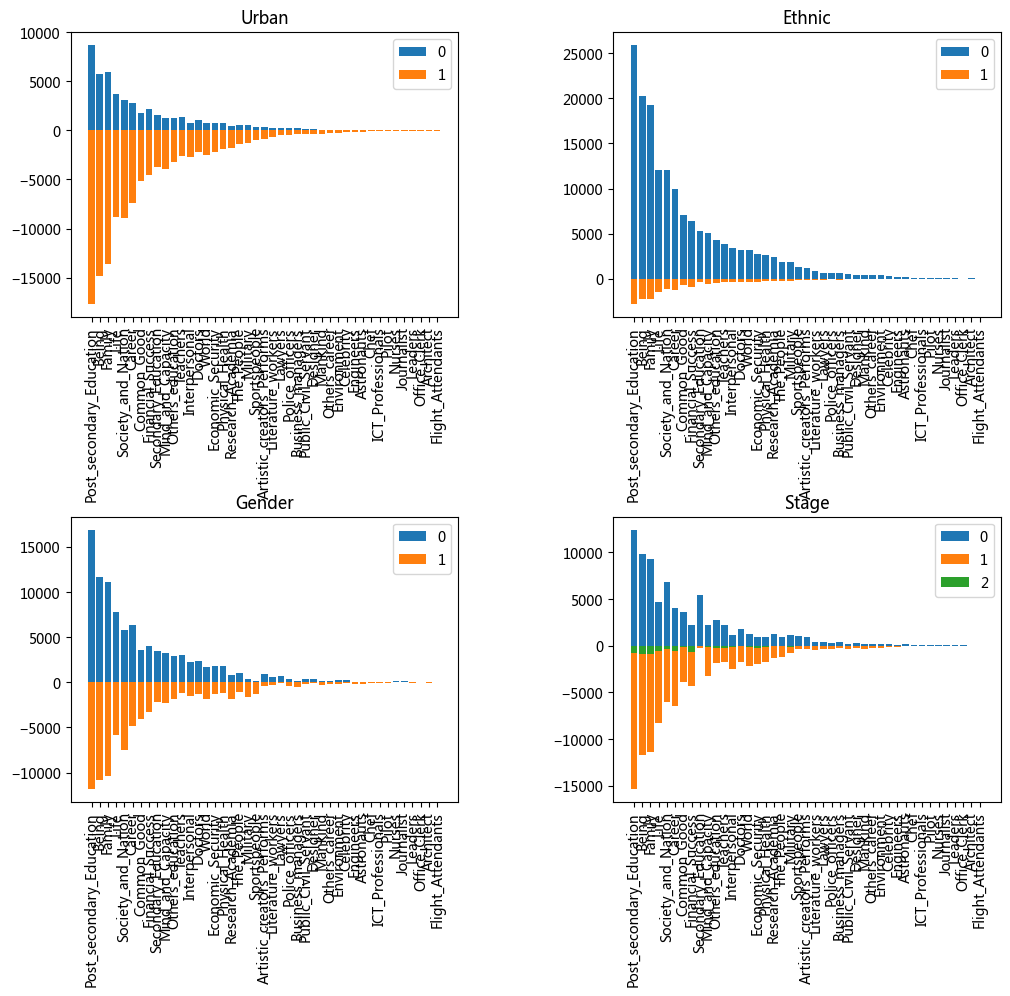

In [154]:
plt.figure(figsize=(12,10))

plt.subplot(2,2,1)
urban_0=all_data_frequency_786_final[(all_data_frequency_786_final['s_urban']==0) | (all_data_frequency_786_final['s_urban']=='0')]
urban_1=all_data_frequency_786_final[(all_data_frequency_786_final['s_urban']==1) | (all_data_frequency_786_final['s_urban']=='1')]

urban_all=draw_selective_decom(noun_cols, noun_data,topic_name='all',total_data=all_data_frequency_786_final,data_0=urban_0,data_1=urban_1,data_2=False)
urban_all=urban_all.rename(columns={'counts_total':'counts_total','counts_de_0':'urban_0','counts_de_1':'urban_1'})
plt.title('Urban')


plt.subplot(2,2,3)
gender_0=all_data_frequency_786_final[all_data_frequency_786_final['s_gender']==0]
gender_1=all_data_frequency_786_final[all_data_frequency_786_final['s_gender']==1]

gender_all=draw_selective_decom(noun_cols, noun_data,topic_name='all',total_data=all_data_frequency_786_final,data_0=gender_0,data_1=gender_1,data_2=False)

gender_all=gender_all[['all', 'counts_de_0', 'counts_de_1']]
gender_all=gender_all.rename(columns={'counts_total':'counts_total','counts_de_0':'gender_0','counts_de_1':'gender_1'})

plt.title('Gender')

plt.subplot(2,2,2)
ethnic_0=all_data_frequency_786_final[all_data_frequency_786_final['s_ethnic']==0]
ethnic_1=all_data_frequency_786_final[all_data_frequency_786_final['s_ethnic']==1]

ethnic_all=draw_selective_decom(noun_cols, noun_data,topic_name='all',total_data=all_data_frequency_786_final,data_0=ethnic_0,data_1=ethnic_1,data_2=False)
ethnic_all=ethnic_all[['all', 'counts_de_0', 'counts_de_1']]
ethnic_all=ethnic_all.rename(columns={'counts_total':'counts_total','counts_de_0':'ethnic_0','counts_de_1':'ethnic_1'})


plt.title('Ethnic')


plt.subplot(2,2,4)
stage_1=all_data_frequency_786_final[all_data_frequency_786_final['s_stage']==1]
stage_2=all_data_frequency_786_final[all_data_frequency_786_final['s_stage']==2]
stage_3=all_data_frequency_786_final[all_data_frequency_786_final['s_stage']==3]
stage_all=draw_selective_decom(noun_cols, noun_data,topic_name='all',total_data=all_data_frequency_786_final,data_0=stage_1,data_1=stage_2,data_2_yes=True,data_2=stage_3)

stage_all=stage_all[['all', 'counts_de_0', 'counts_de_1','counts_de_2']]
stage_all=stage_all.rename(columns={'counts_total':'counts_total','counts_de_0':'stage_1','counts_de_1':'stage_2','counts_de_2':'stage_3'})


plt.title('Stage')

plt.subplots_adjust(wspace=0.4,hspace=0.7)

plt.savefig('all_total_0905.pdf',bbox_inch='tight')

plt.show()

total_all=urban_all.merge(gender_all,how='left',on='all')
total_all=total_all.merge(ethnic_all,how='left',on='all')
total_all=total_all.merge(stage_all,how='left',on='all')

total_all.to_csv('all_total_0905.csv')




In [158]:
noun_order=pd.DataFrame(noun_cols,columns=['all'])

In [159]:
total_all_order=noun_order.merge(total_all,how='left',on='all')

In [160]:
total_all_order.to_csv('all_total_order_0905.csv')

In [161]:
total_all_order

all  counts_total  urban_0  urban_1  gender_0  \
0     Post_secondary_Education       28710.0   8741.0  17695.0   16910.0   
1          Secondary_Education        5659.0   1596.0   3738.0    3468.0   
2             Others_education        4798.0   1260.0   3184.0    2950.0   
3                       Career       11123.0   2770.0   7425.0    6296.0   
4                      Doctors        3622.0   1091.0   2191.0    2374.0   
5                     Teachers        4250.0   1351.0   2645.0    3041.0   
6            Research_Academia        2603.0    462.0   1769.0     801.0   
7                     Military        2042.0    608.0   1305.0     362.0   
8              Police_officers         696.0    231.0    412.0     323.0   
9            ICT_Professionals         151.0     40.0     99.0      16.0   
10                Sportspeople        1473.0    397.0   1004.0     164.0   
11  Artistic_creators_Performs        1308.0    333.0    884.0     923.0   
12           Business_managers         668.0    217.0    399.0     169.0   
13        Public_Civil_Servant         577.0    139.0    370.0     358.0   
14                   Celebrity         314.0     91.0    207.0     236.0   
15                  Astronauts         185.0     51.0    127.0      33.0   
16                     Leaders          84.0     21.0     51.0      23.0   
17                     Lawyers         779.0    202.0    500.0     649.0   
18                      Nurses         112.0     41.0     67.0      98.0   
19                    Designer         515.0    119.0    343.0     382.0   
20          Literature_workers         953.0    206.0    623.0     626.0   
21                   Engineers         216.0     46.0    130.0      29.0   
22                  Journalist          89.0     35.0     48.0      86.0   
23                   Architect          48.0     12.0     26.0      16.0   
24                        Chef         152.0     68.0     75.0      24.0   
25                       Pilot         136.0     28.0    104.0      23.0   
26                Office_Clerk          48.0      8.0     37.0      22.0   
27           Flight_Attendants          12.0      4.0      7.0      12.0   
28               Others_career         432.0     84.0    281.0     189.0   
29                        Life       13589.0   3682.0   8806.0    7746.0   
30           Economic_Security        3143.0    740.0   2183.0    1799.0   
31           Financial_Success        7294.0   2200.0   4581.0    4017.0   
32                       Being       22494.0   5766.0  14801.0   11635.0   
33           Mind_and_Capacity        5638.0   1264.0   3882.0    3288.0   
34             Physical_Health        2898.0    720.0   1919.0    1746.0   
35                 Common_Good        7670.0   1762.0   5190.0    3597.0   
36          Society_and_Nation       13225.0   3155.0   8890.0    5733.0   
37                       World        3536.0    764.0   2461.0    1734.0   
38                 Environment         428.0     82.0    308.0     225.0   
39                     Mankind         466.0     62.0    340.0     124.0   
40                  The_People        2113.0    541.0   1351.0    1075.0   
41                      Family       21527.0   6009.0  13635.0   11103.0   
42               Interpersonal        3727.0    732.0   2656.0    2192.0   

    gender_1  ethnic_0  ethnic_1  stage_1  stage_2  stage_3  
0    11800.0   25928.0    2782.0  12448.0  15342.0    816.0  
1     2191.0    5295.0     364.0   5394.0    214.0      7.0  
2     1848.0    4351.0     447.0   2746.0   1826.0    210.0  
3     4827.0    9941.0    1182.0   4084.0   6419.0    595.0  
4     1248.0    3234.0     388.0   1748.0   1794.0     70.0  
5     1209.0    3873.0     377.0   2227.0   1779.0    231.0  
6     1802.0    2412.0     191.0   1206.0   1372.0     17.0  
7     1680.0    1826.0     216.0   1128.0    750.0    155.0  
8      373.0     632.0      64.0    302.0    379.0     11.0  
9      135.0     142.0       9.0     80.0     64.0      6.0  


In [565]:
all_data_frequency[noun_data[1]].sum(axis=1)

0         0
1         0
2         0
3         0
4         0
         ..
111887    0
111888    0
111889    0
111890    0
111891    0
Length: 111892, dtype: int64

In [570]:
# all_data_frequency[all_data_frequency[noun_data[1]].sum(axis=1)>0]

In [ ]:
draw_selective(noun_cols[0:4], noun_data[0:4], total_data=all_data_frequency)
draw_selective(noun_cols[0:4], noun_data[0:4], total_data=gender_0)
draw_selective(noun_cols[0:4], noun_data[0:4], total_data=gender_1)

plt.title("Education")

In [346]:
# 4, 24, 3, 1, 2, 4, 2
def plot_all_de(total_data=all_data_frequency_858_final,data_0=urban_0,data_1=urban_1,data_2='data_2',label='urban'):
    plt.figure(figsize=(15,28))

    plt.subplot(7,1,1)
    draw_selective_decom(noun_cols[0:4], noun_data[0:4], total_data=total_data,data_0=data_0,data_1=data_1, data_2=data_2)
    plt.title("Education")
    plt.ylabel(label)

    plt.subplot(7,1,2)
    draw_selective_decom(noun_cols[4:28], noun_data[4:28], total_data=total_data,data_0=data_0,data_1=data_1, data_2=data_2)
    plt.title("Occuaption")

    plt.subplot(7,1,3)
    draw_selective_decom(noun_cols[28:31], noun_data[28:31], total_data=total_data,data_0=data_0,data_1=data_1, data_2=data_2)
    plt.title("Life Quality & Physical Wellbeing")

    plt.subplot(7,1,4)
    draw_selective_decom(noun_cols[31:38], noun_data[31:38], total_data=total_data,data_0=data_0,data_1=data_1, data_2=data_2)
    plt.title("Beyond-the-self")

    plt.subplot(7,1,5)
    draw_selective_decom(noun_cols[38:], noun_data[38:], total_data=total_data,data_0=data_0,data_1=data_1, data_2=data_2)
    plt.title("Exploratory")

    plt.subplot(7,1,6)
    draw_selective_decom(adj_cols, adj_data, total_data=total_data,data_0=data_0,data_1=data_1, data_2=data_2)
    plt.title("Adjective")

    plt.subplot(7,1,7)
    draw_selective_decom(action_cols, action_data, total_data=total_data,data_0=data_0,data_1=data_1, data_2=data_2)
    plt.title("Action")

    plt.subplots_adjust(wspace=0.3,hspace=1.1)


    plt.savefig('%s.png' % label)
    plt.show()

100%|██████████| 13/13 [00:01<00:00,  6.59it/s]


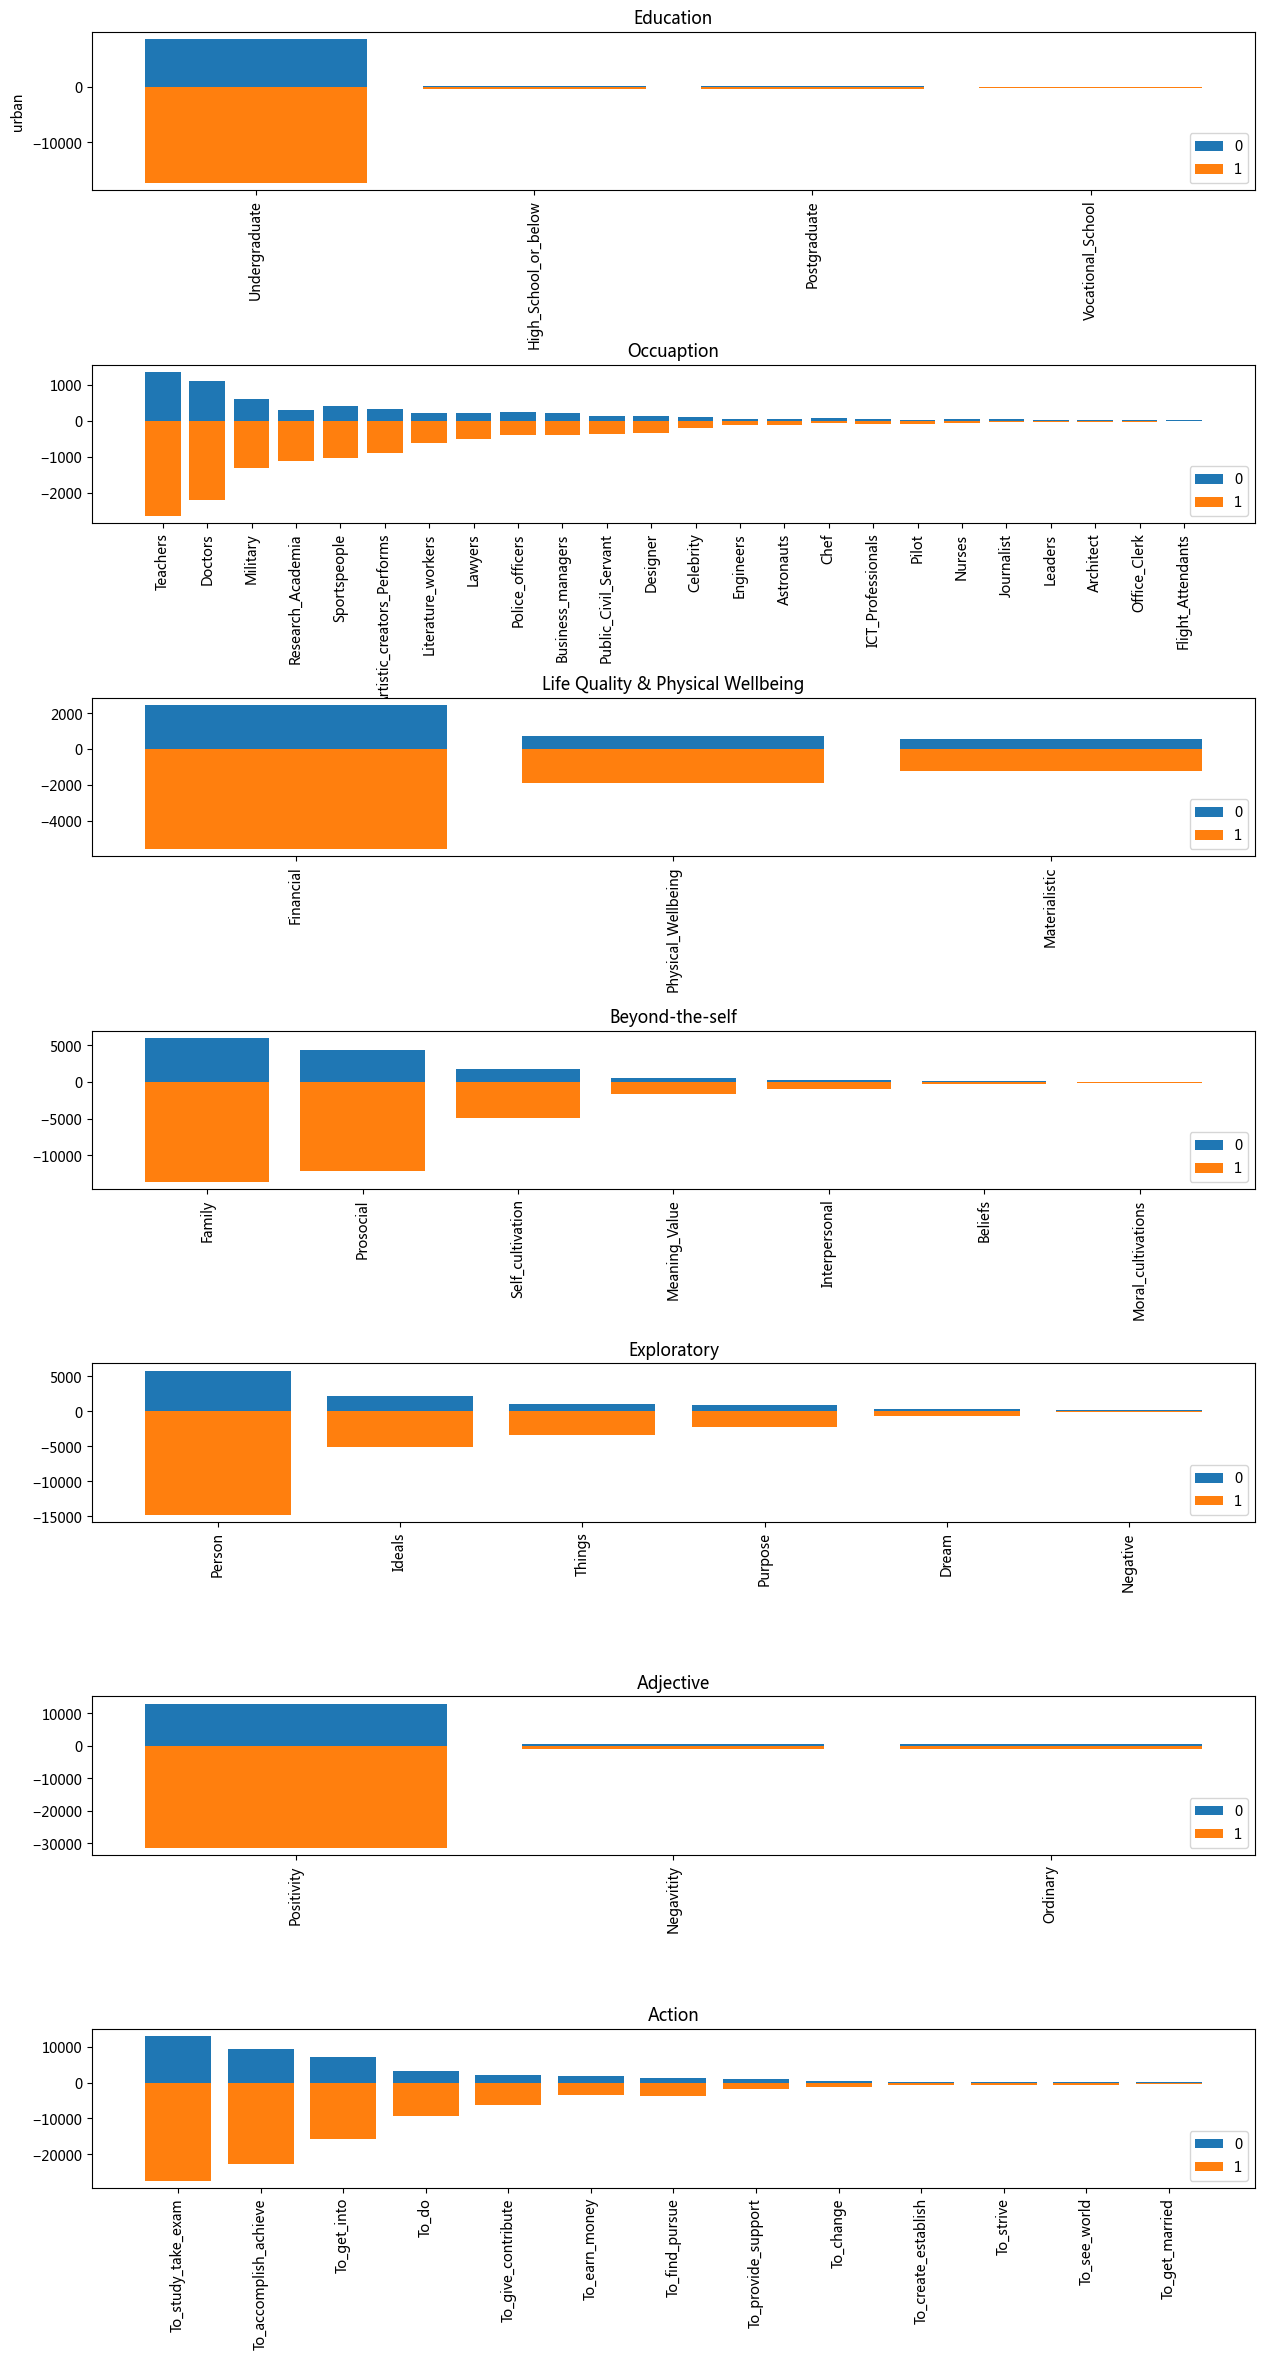

In [347]:
plot_all_de(total_data=all_data_frequency_858_final,data_0=urban_0,data_1=urban_1,data_2=False, label='urban')

100%|██████████| 13/13 [00:01<00:00,  7.65it/s]


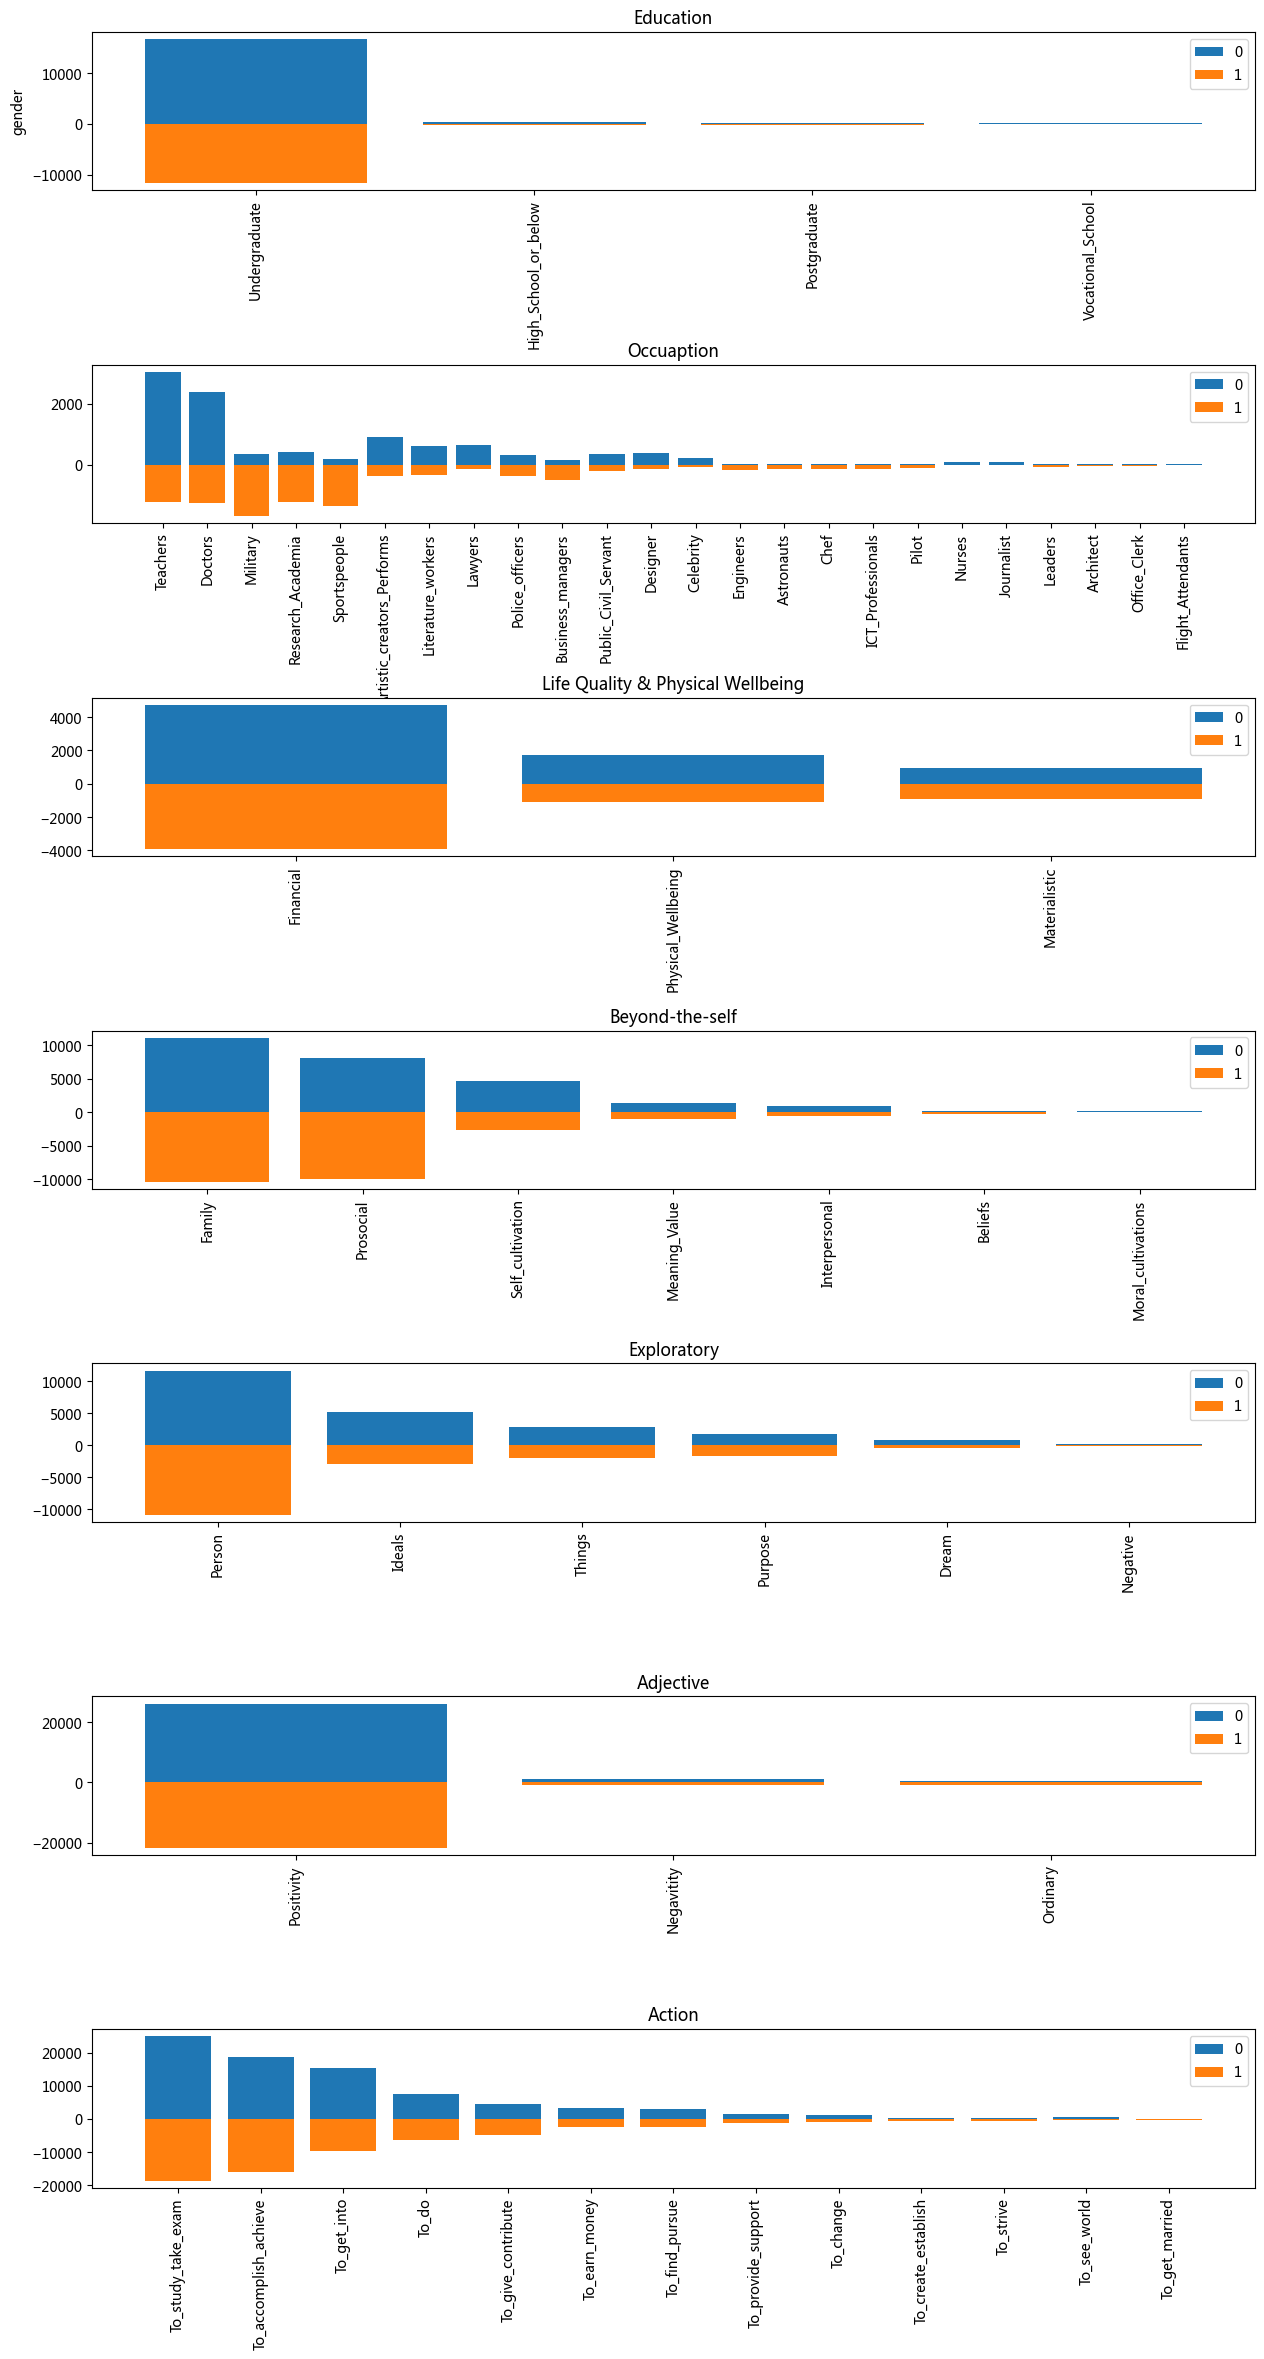

In [132]:
plot_all_de(total_data=all_data_frequency_858_final,data_0=gender_0,data_1=gender_1,data_2=False,label='gender')

In [ ]:
def plot_all(total_data=all_data_frequency,label='all_data_frequency'):
    plt.figure(figsize=(15,28))

    plt.subplot(7,1,1)
    draw_selective(noun_cols[0:4], noun_data[0:4], total_data=total_data)
    plt.title("Education")
    plt.ylabel(label)

    plt.subplot(7,1,2)
    draw_selective(noun_cols[4:28], noun_data[4:28], total_data=total_data)
    plt.title("Occuaption")

    plt.subplot(7,1,3)
    draw_selective(noun_cols[28:31], noun_data[28:31], total_data=total_data)
    plt.title("Life Quality & Physical Wellbeing")

    plt.subplot(7,1,4)
    draw_selective(noun_cols[31:38], noun_data[31:38], total_data=total_data)
    plt.title("Beyond-the-self")

    plt.subplot(7,1,5)
    draw_selective(noun_cols[38:], noun_data[38:], total_data=total_data)
    plt.title("Exploratory")

    plt.subplot(7,1,6)
    draw_selective(adj_cols, adj_data, total_data=total_data)
    plt.title("Adjective")

    plt.subplot(7,1,7)
    draw_selective(action_cols, action_data, total_data=total_data)
    plt.title("Action")

    plt.subplots_adjust(wspace=0.3,hspace=1.1)


    plt.savefig('%s.png' % label)
    plt.show()

In [725]:
abc=all_data_frequency

In [728]:
from varname.helpers import Wrapper
aaa=abc
aaa = Wrapper(dict())
aaa.name

'aaa'

100%|██████████| 14/14 [00:33<00:00,  2.42s/it]


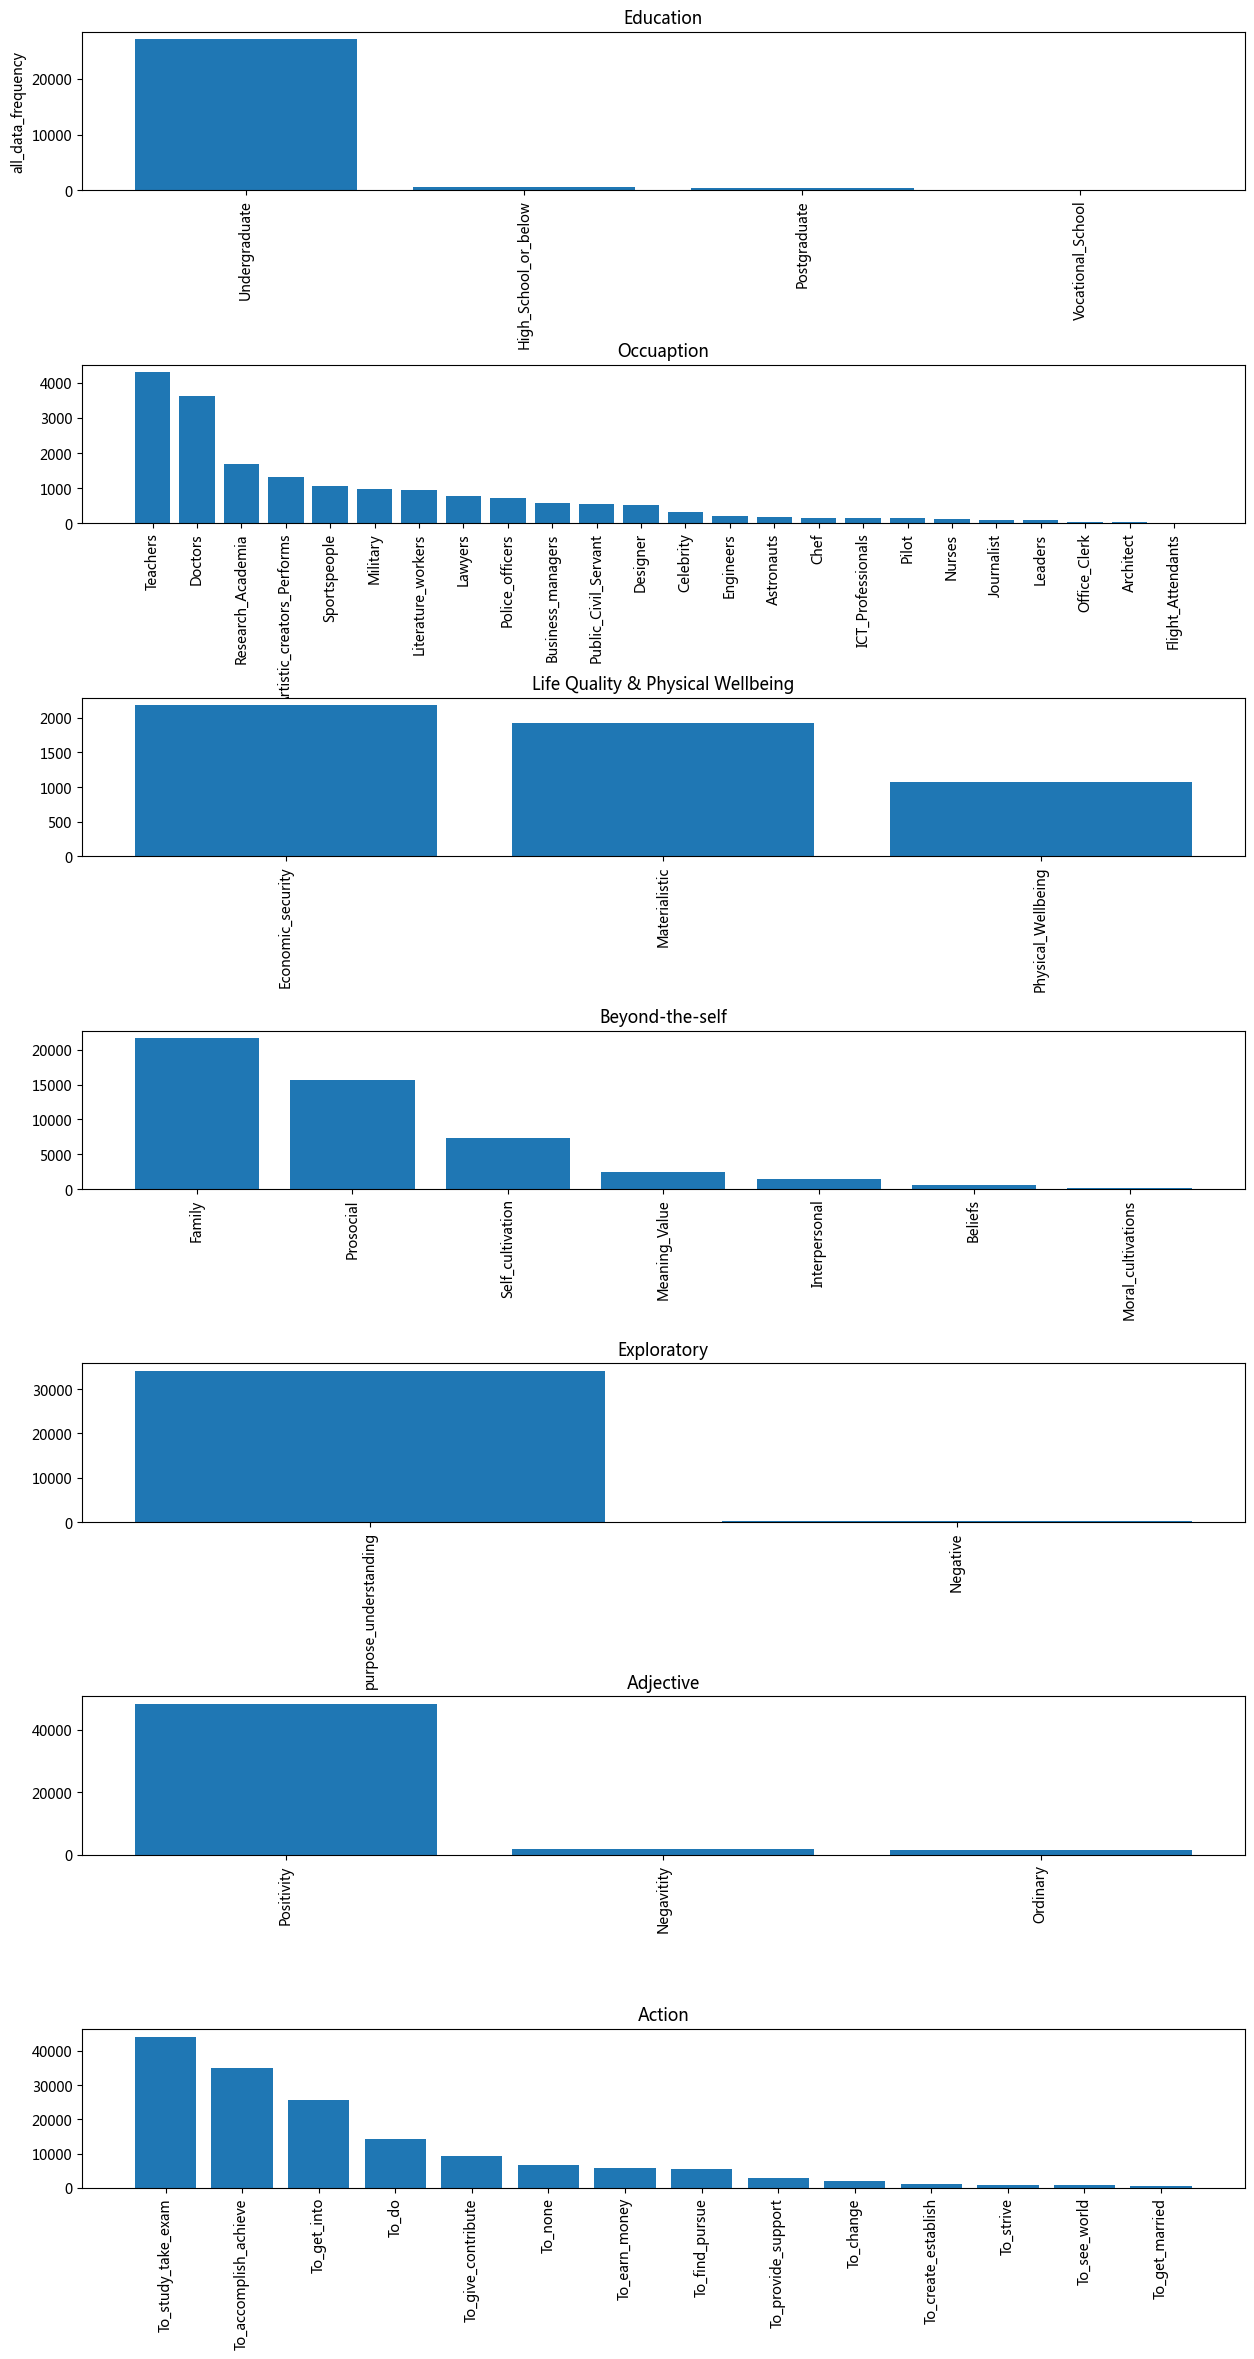

In [731]:
plot_all(total_data=all_data_frequency)


###gender

In [734]:
list_cols=list(all_data_frequency)

In [743]:
gender_0=all_data_frequency_2[all_data_frequency_2['s_gender']==0][list_cols]

100%|██████████| 14/14 [00:11<00:00,  1.24it/s]


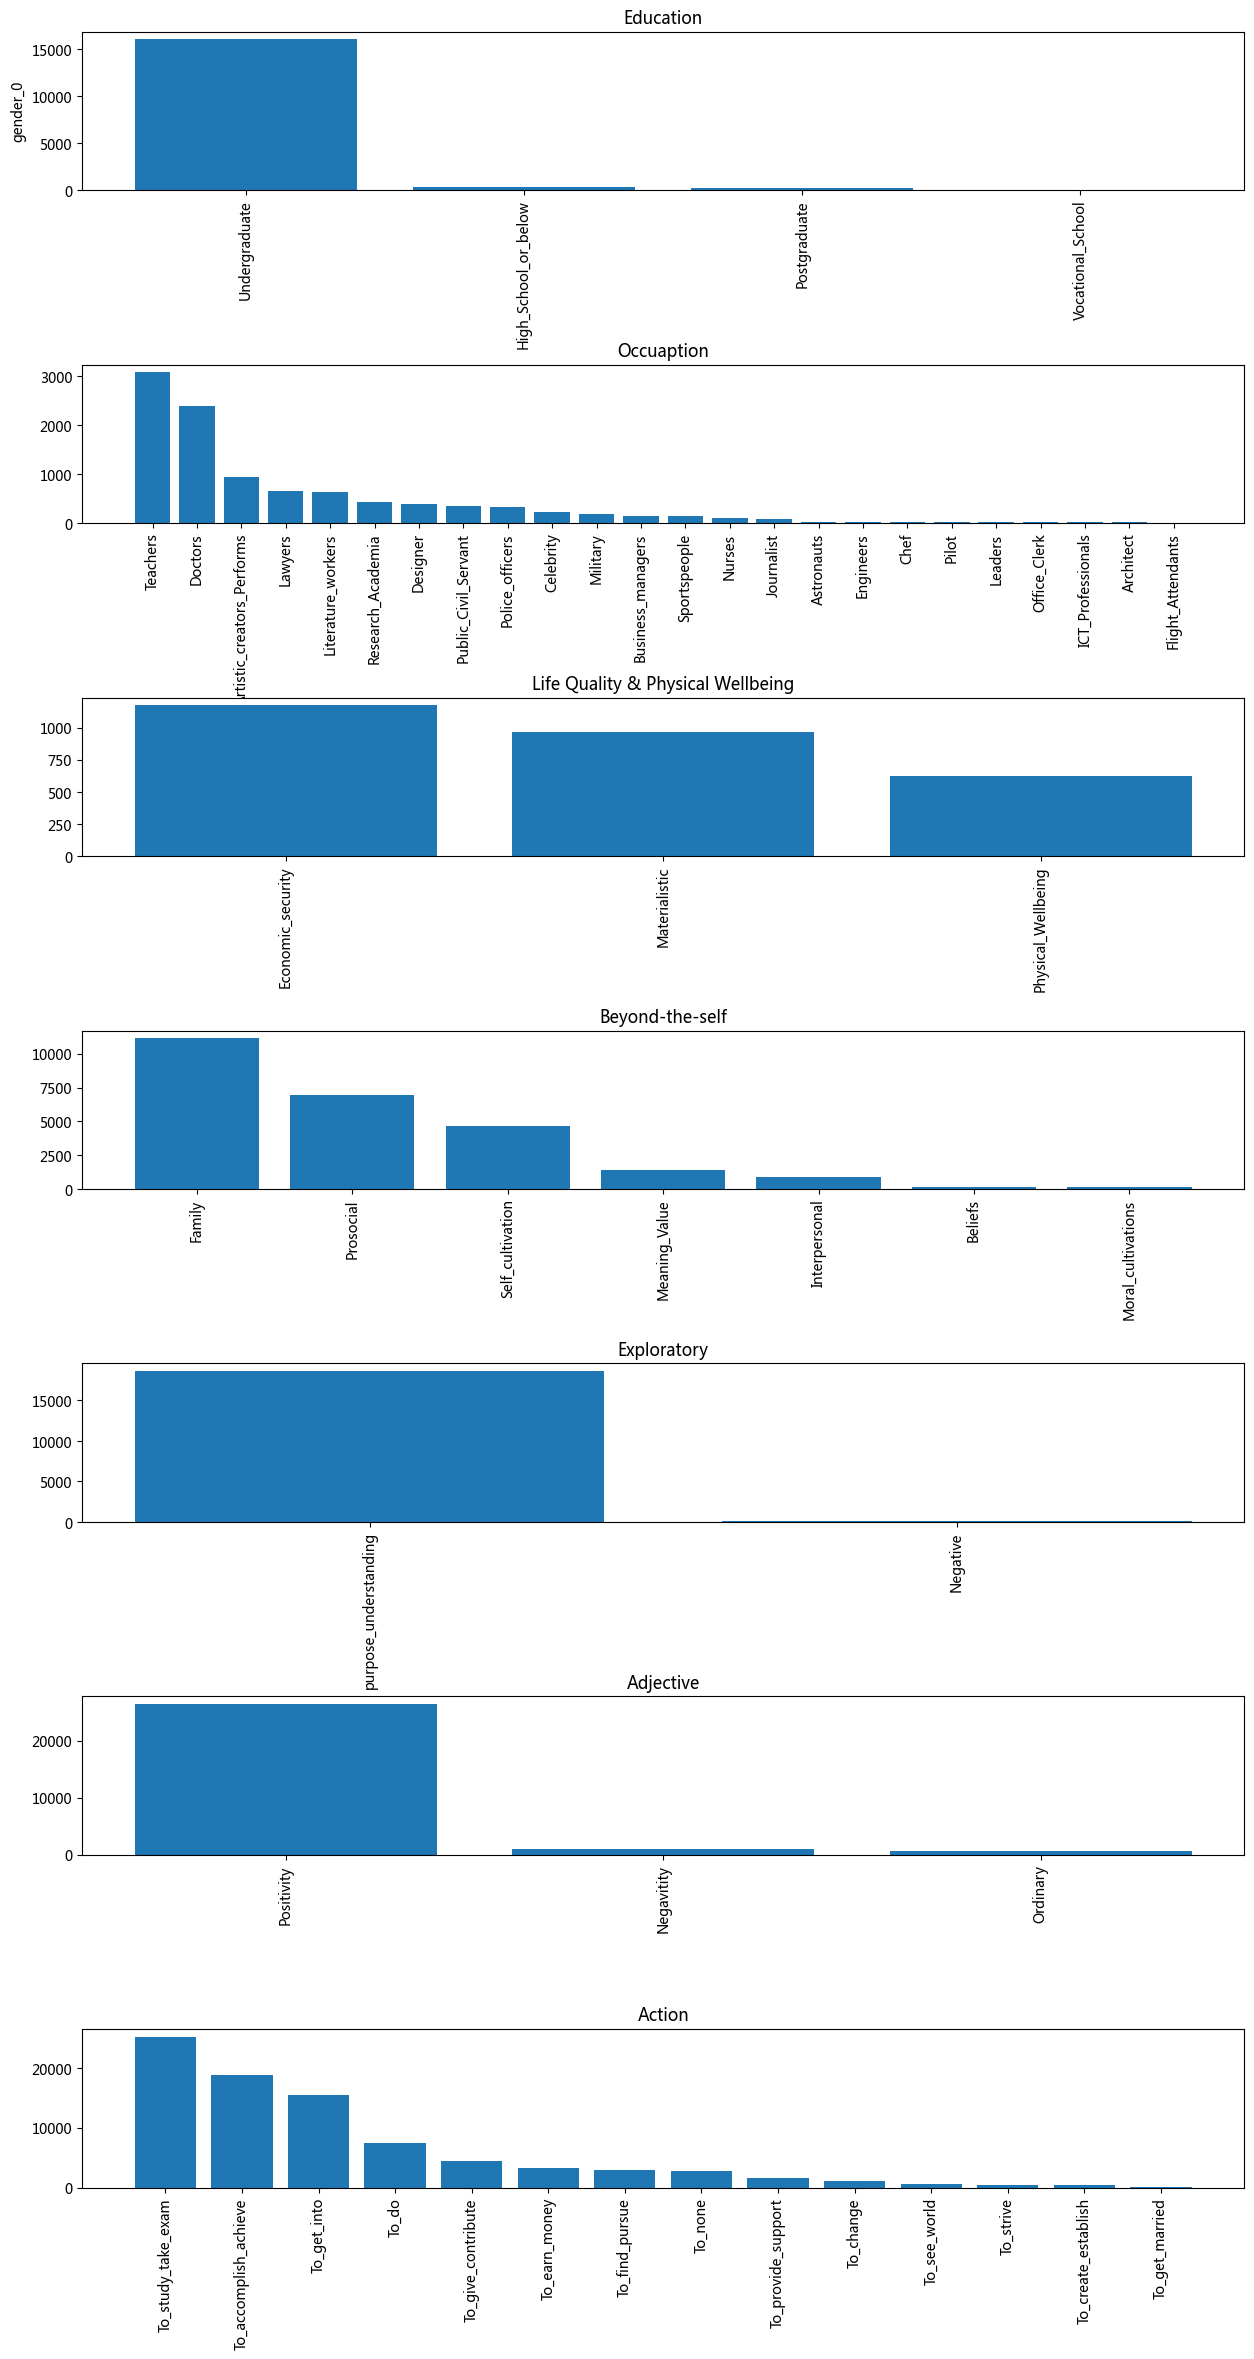

In [744]:
plot_all(total_data=gender_0,label='gender_0')

In [737]:
gender_1=all_data_frequency_2[all_data_frequency_2['s_gender']==1][list_cols]

100%|██████████| 14/14 [00:11<00:00,  1.24it/s]


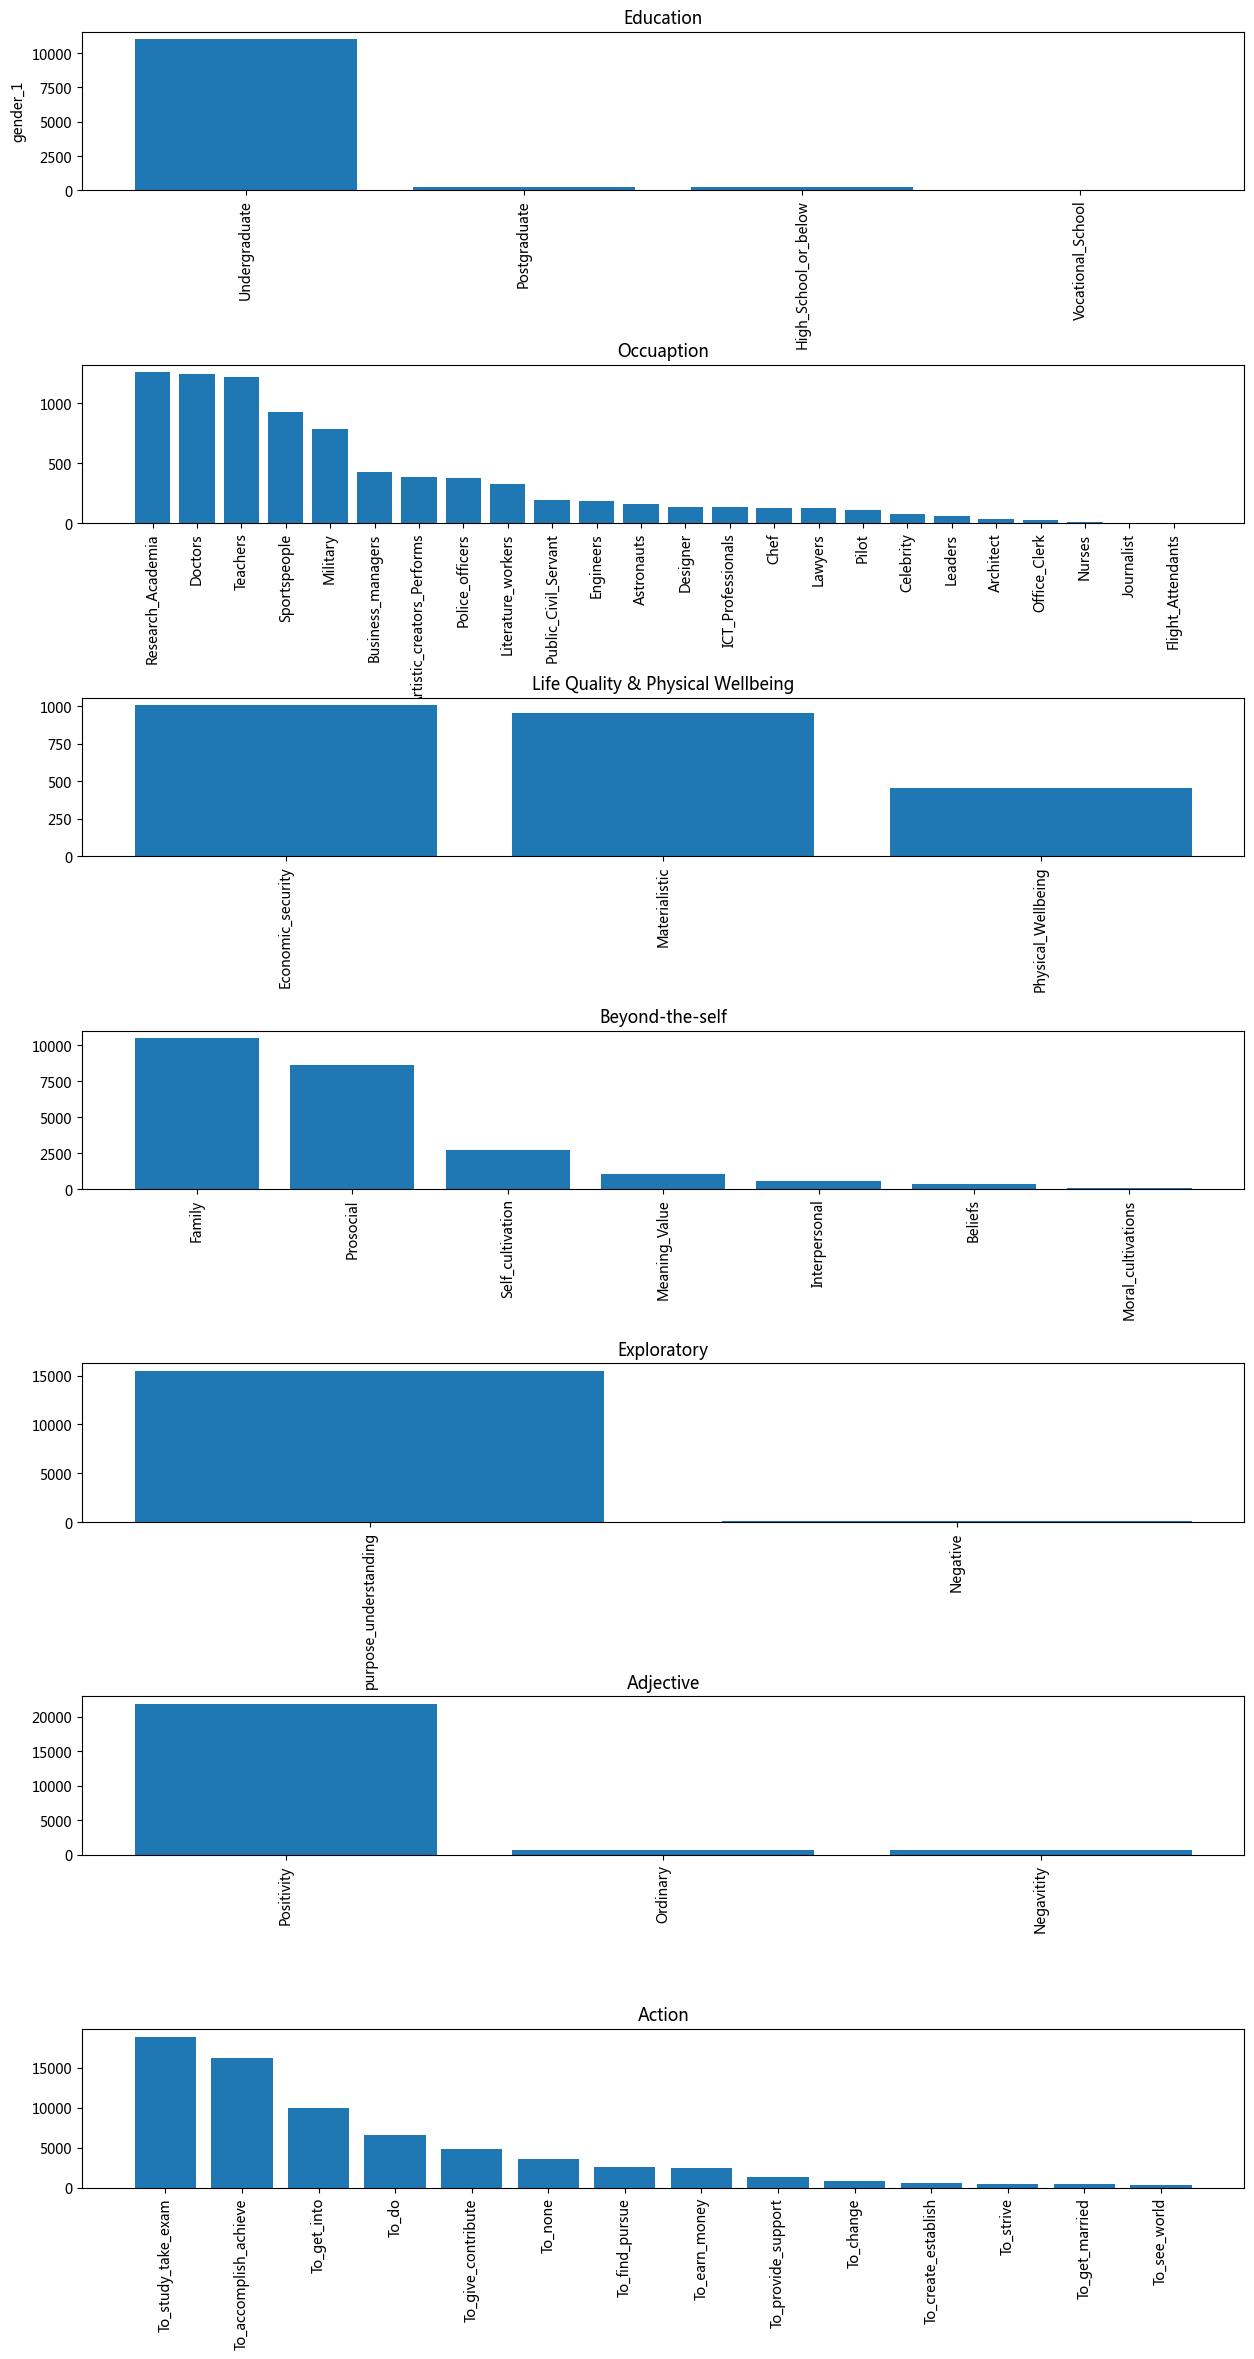

In [738]:
plot_all(total_data=gender_1,label='gender_1')

###urban

In [739]:
urban_0=all_data_frequency_2[all_data_frequency_2['s_urban']==0][list_cols]

100%|██████████| 14/14 [00:06<00:00,  2.18it/s]


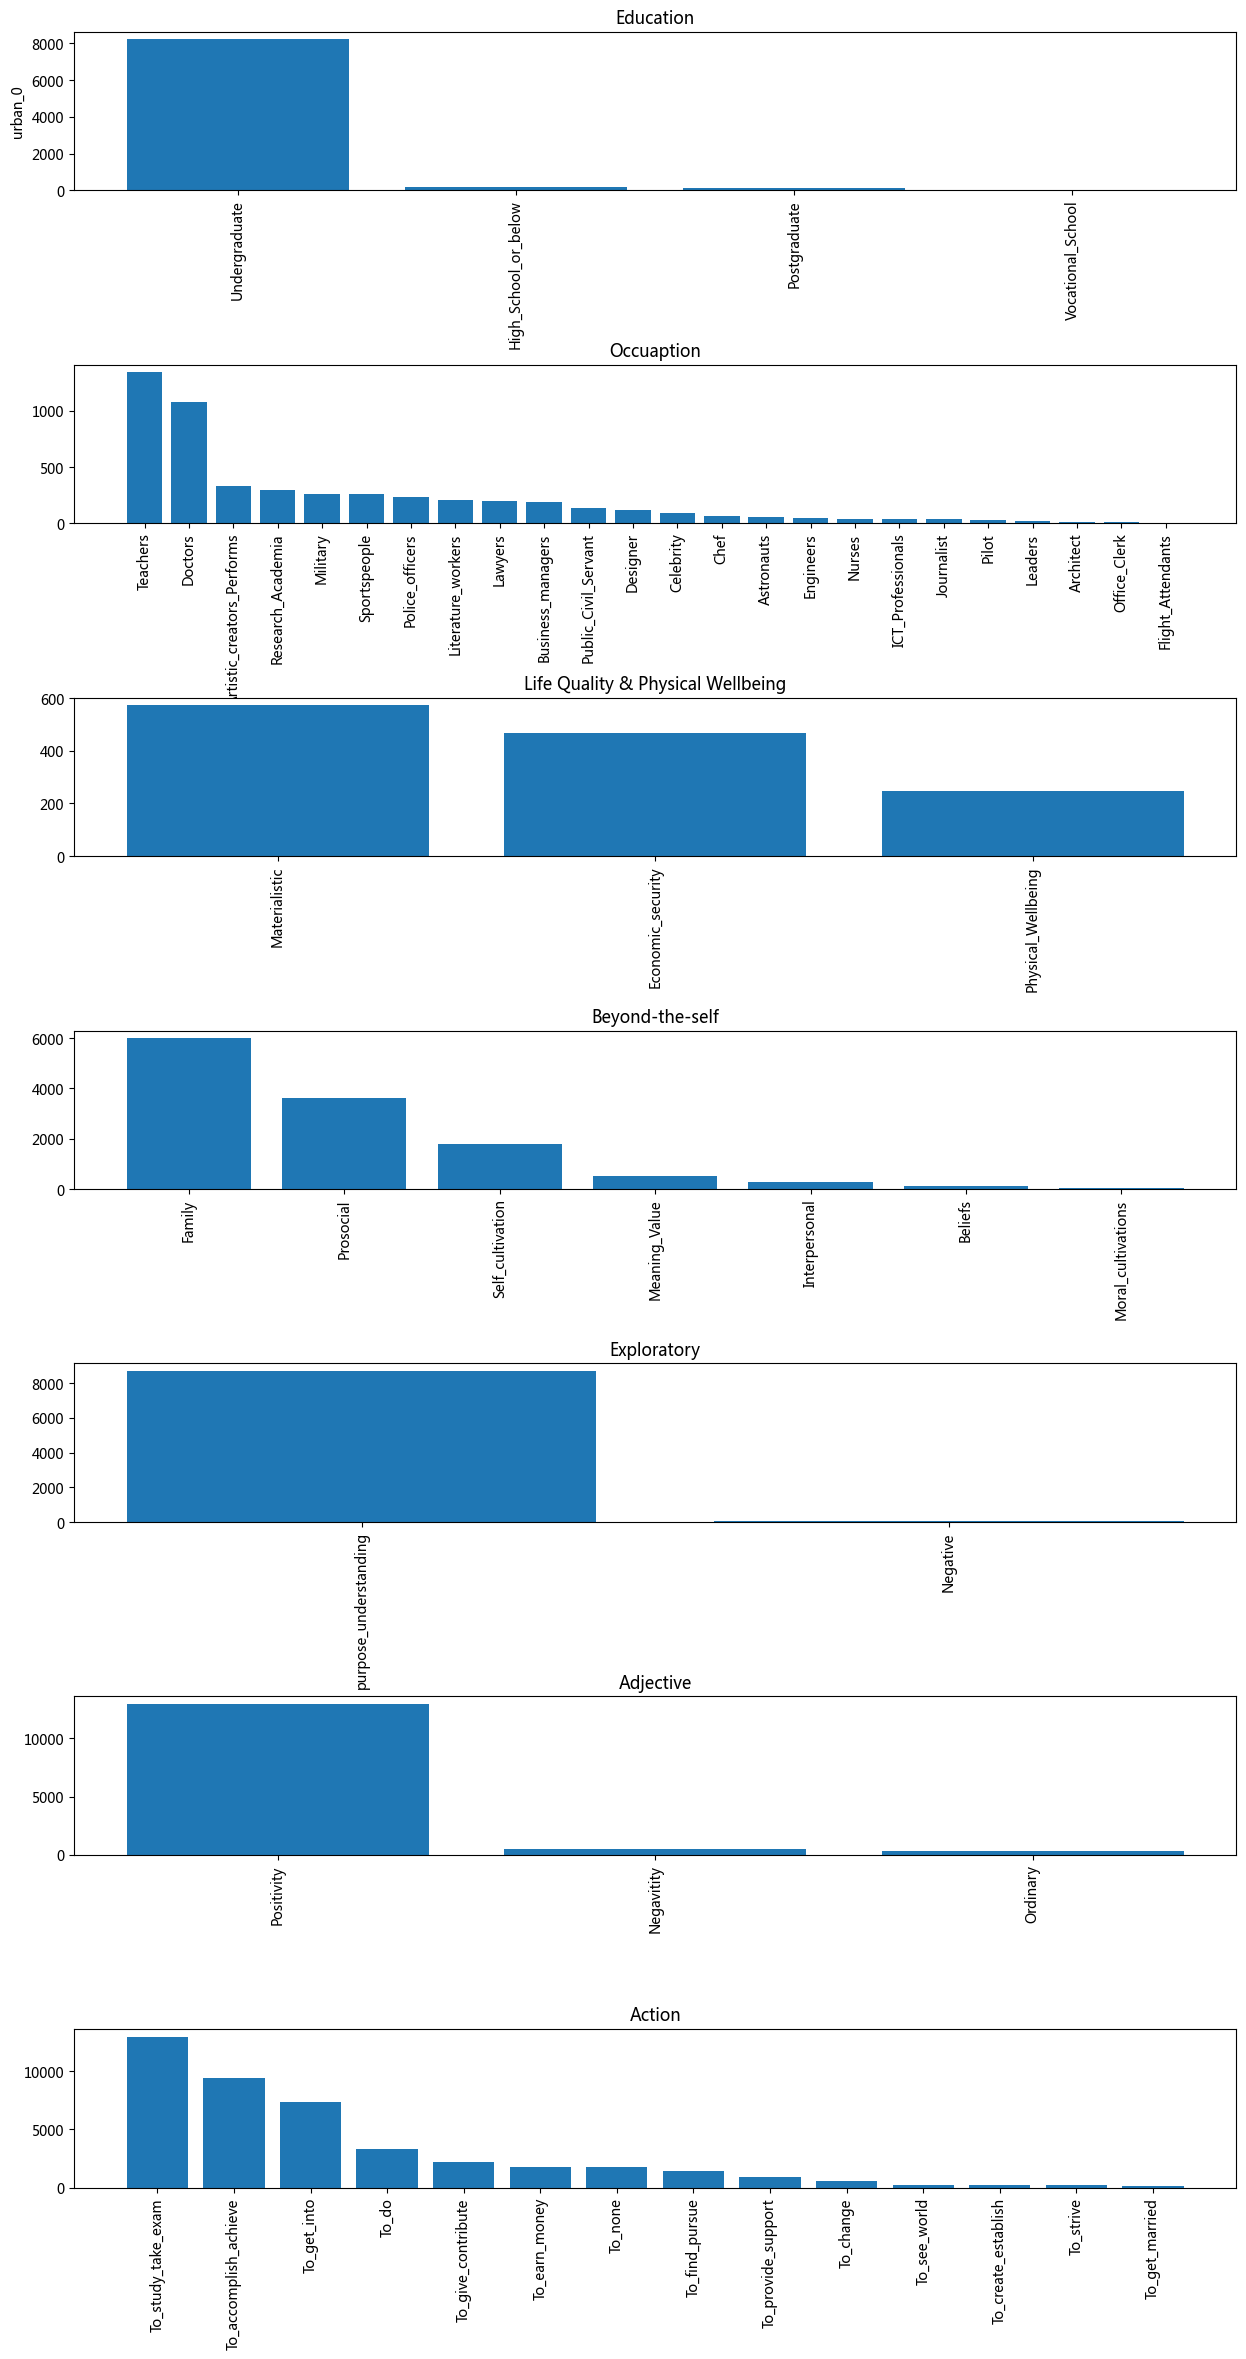

In [740]:
plot_all(total_data=urban_0,label='urban_0')

In [741]:
urban_1=all_data_frequency_2[all_data_frequency_2['s_urban']==1][list_cols]

100%|██████████| 14/14 [00:18<00:00,  1.34s/it]


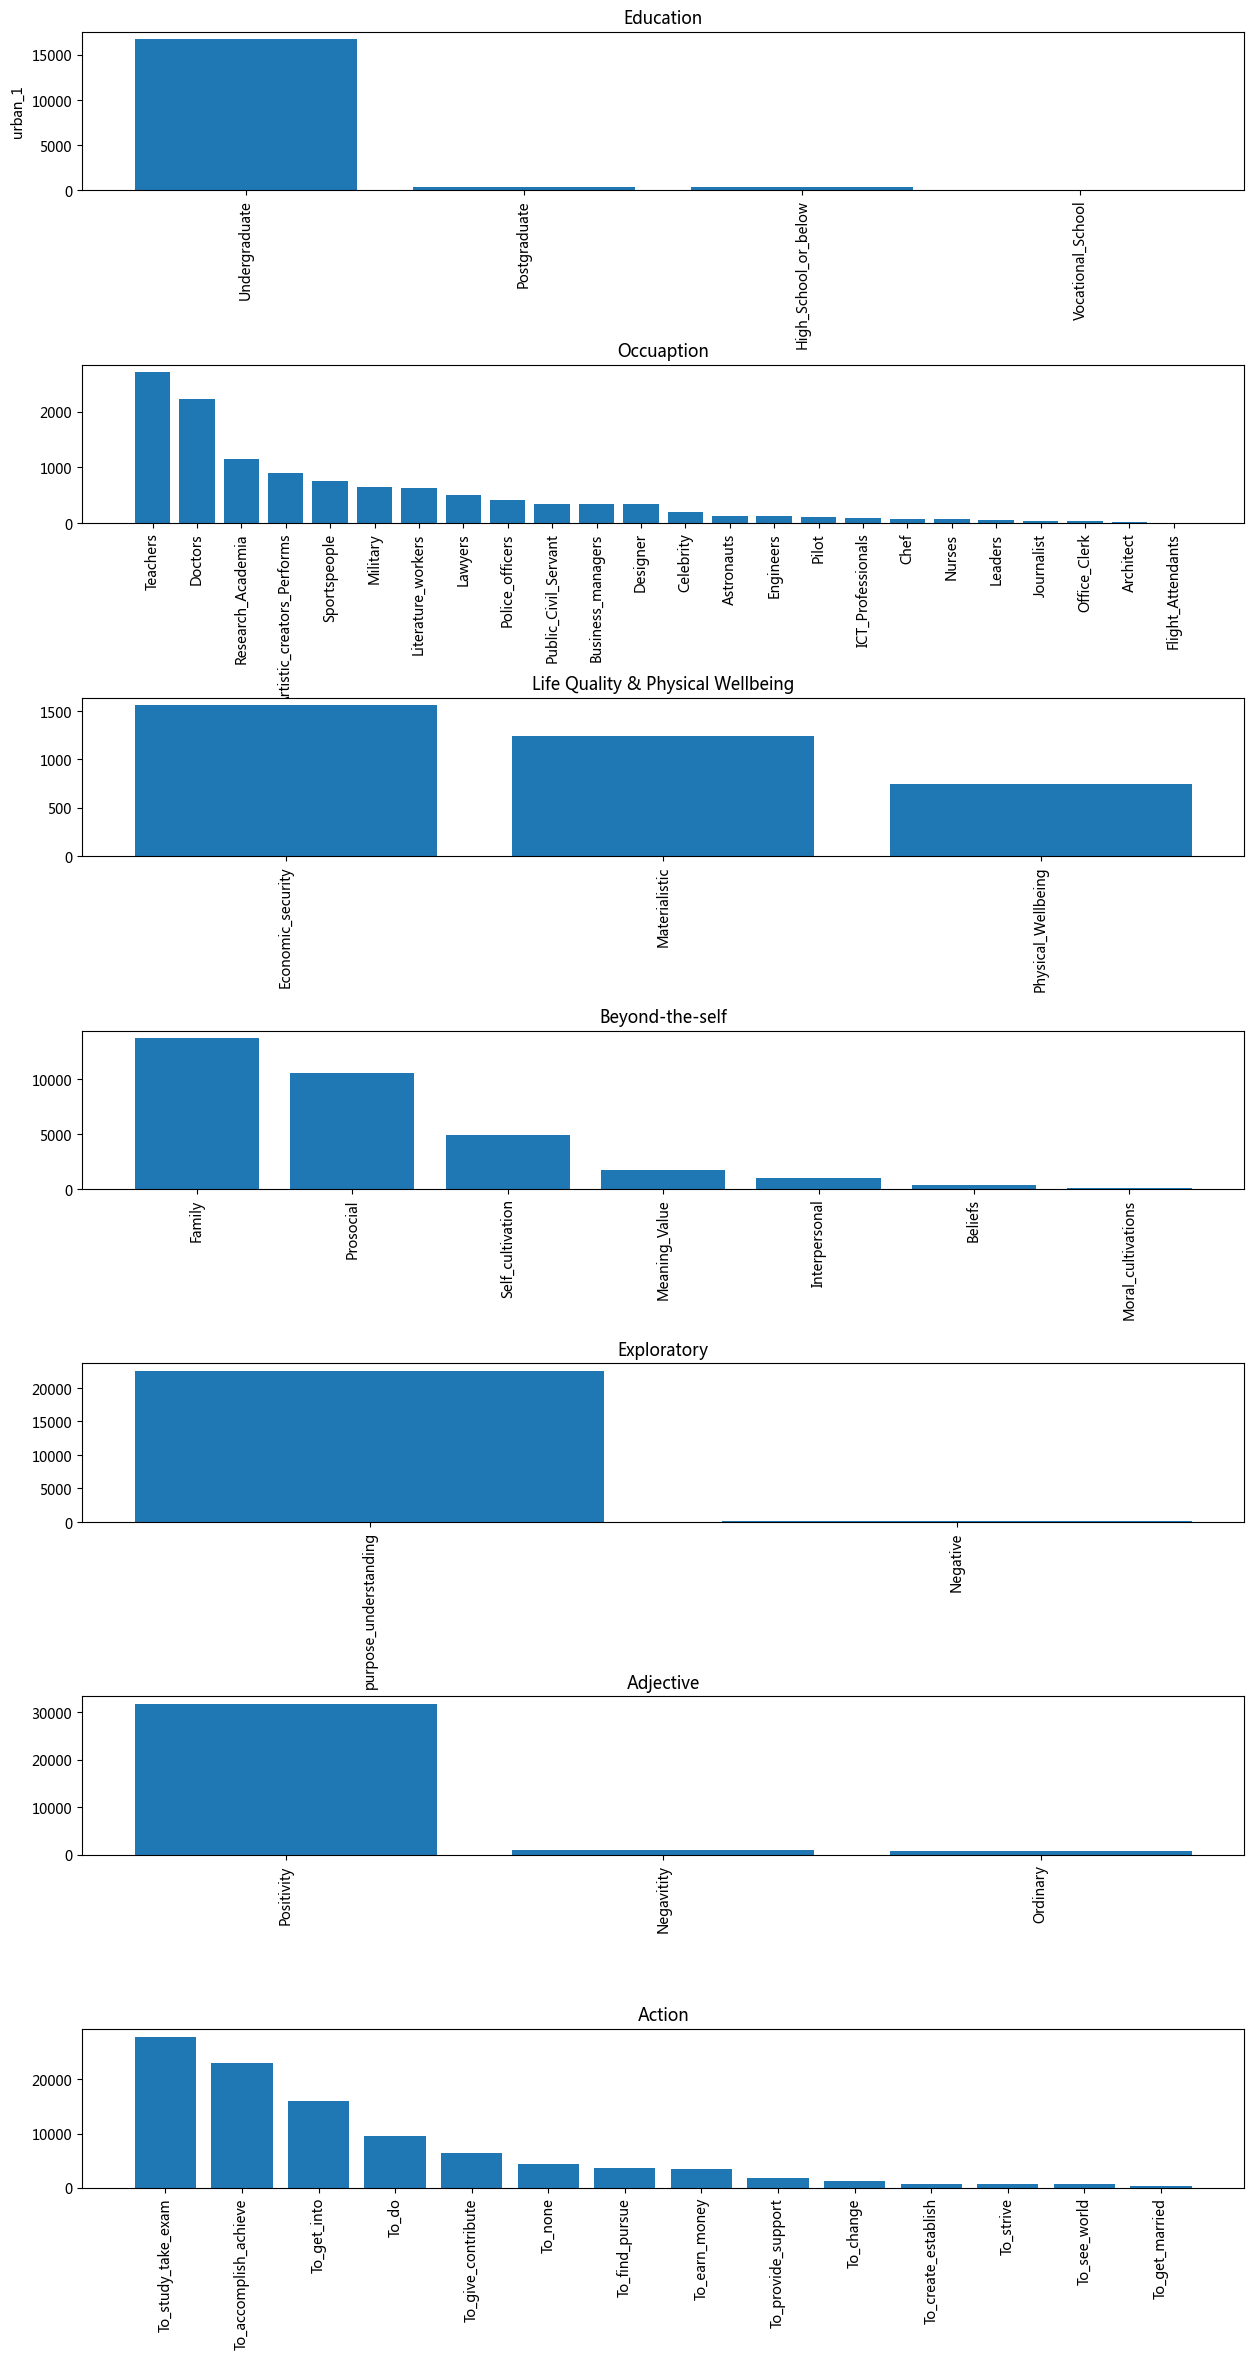

In [742]:
plot_all(total_data=urban_1,label='urban_1')

###grade

In [810]:
level_1

问卷发布名称 Sver SchoolID      作答ID  \
7            【2-117】福建省福州屏东中学2021年12月积极教育百城计划学生问卷    2      117  7Ax11BzM   
13           【2-117】福建省福州屏东中学2021年12月积极教育百城计划学生问卷    2      117  7Ax11zDM   
15             【2-198】四川省达州中学2021年12月积极教育百城计划学生问卷    2      198  7Ax13prM   
16                            【2-168】郑州市第五十七中学南校区    2      168  7Ax141zM   
21             【3-439】北京市大峪中学2021年12月积极教育百城计划学生问卷    3      439  7Ax15lzM   
...                                           ...  ...      ...       ...   
111869  【2-126】河南省三门峡市渑池县韶州中学2021年12月积极教育百城计划学生问卷    2      126  eyPzyQQL   
111874  【2-126】河南省三门峡市渑池县韶州中学2021年12月积极教育百城计划学生问卷    2      126  eyPzyqEL   
111876  【2-126】河南省三门峡市渑池县韶州中学2021年12月积极教育百城计划学生问卷    2      126  eyPzz0nL   
111884   【2-118】甘肃省陇南市武都区滨江学校2021年12月积极教育百城计划学生问卷    2      118  eyPzzQ8L   
111891    【2-132】湖南省岳阳市弘毅新华中学2021年12月积极教育百城计划学生问卷    2      132  eyPzzzPL   

                       开始时间                                         cpstext  \
7       2021-12-30 10:28:03                                            快乐生活   
13      2021-12-30 10:17:58  希望能够上一所好的高中和好的大学，理科学习方面能够有所提高，希望能结交很多能够谈心的朋友吧~   
15      2021-12-30 20:16:18                                    考上一个好一点的高中吧。   
16      2021-12-29 22:15:41                           实现时间自由，财富自由。身体健康，吃好喝好   
21      2021-12-30 16:04:52                                        考个本科或研究生   
...                     ...                                             ...   
111869  2022-01-03 18:42:23                                         学习，报效祖国   
111874  2022-01-03 18:29:14                                          成为亿万富豪   
111876  2022-01-03 15:49:55                           考上外高，在考上央美，最后成为我想成为的人   
111884  2022-01-03 16:21:13                                          成为一名医生   
111891  2022-01-03 15:49:46                                       想成为一个有用的人   

        的  考上  大学  好  ...  灯光  和国  或省  灯烛  灰  灰暗  灵  灵巧  和囯家  得路  
7       0   0   0  0  ...   0   0   0   0  0   0  0   0    0   0  
13      3   0   1  2  ...   0   0   0   0  0   0  0   0    0   0  
15      1   1   0  1  ...   0   0   0   0  0   0  0   0    0   0  
16      0   0   0  2  ...   0   0   0   0  0   0  0   0    0   0  
21      0   0   0  0  ...   0   0   0   0  0   0  0   0    0   0  
...    ..  ..  .. ..  ...  ..  ..  ..  .. ..  .. ..  ..  ...  ..  
111869  0   0   0  0  ...   0   0   0   0  0   0  0   0    0   0  
111874  0   0   0  0  ...   0   0   0   0  0   0  0   0    0   0  
111876  1   2   0  0  ...   0   0   0   0  0   0  0   0    0   0  
111884  0   0   0  0  ...   0   0   0   0  0   0  0   0    0   0  
111891  1   0   0  0  ...   0   0   0   0  0   0  0   0    0   0  

[54254 rows x 19575 columns]

In [803]:
level_1=all_data_frequency_2[all_data_frequency_2['s_level']==1][list_cols]
level_2=all_data_frequency_2[all_data_frequency_2['s_level']==2][list_cols]
level_3=all_data_frequency_2[all_data_frequency_2['s_level']==3][list_cols]

100%|██████████| 14/14 [00:59<00:00,  4.28s/it]


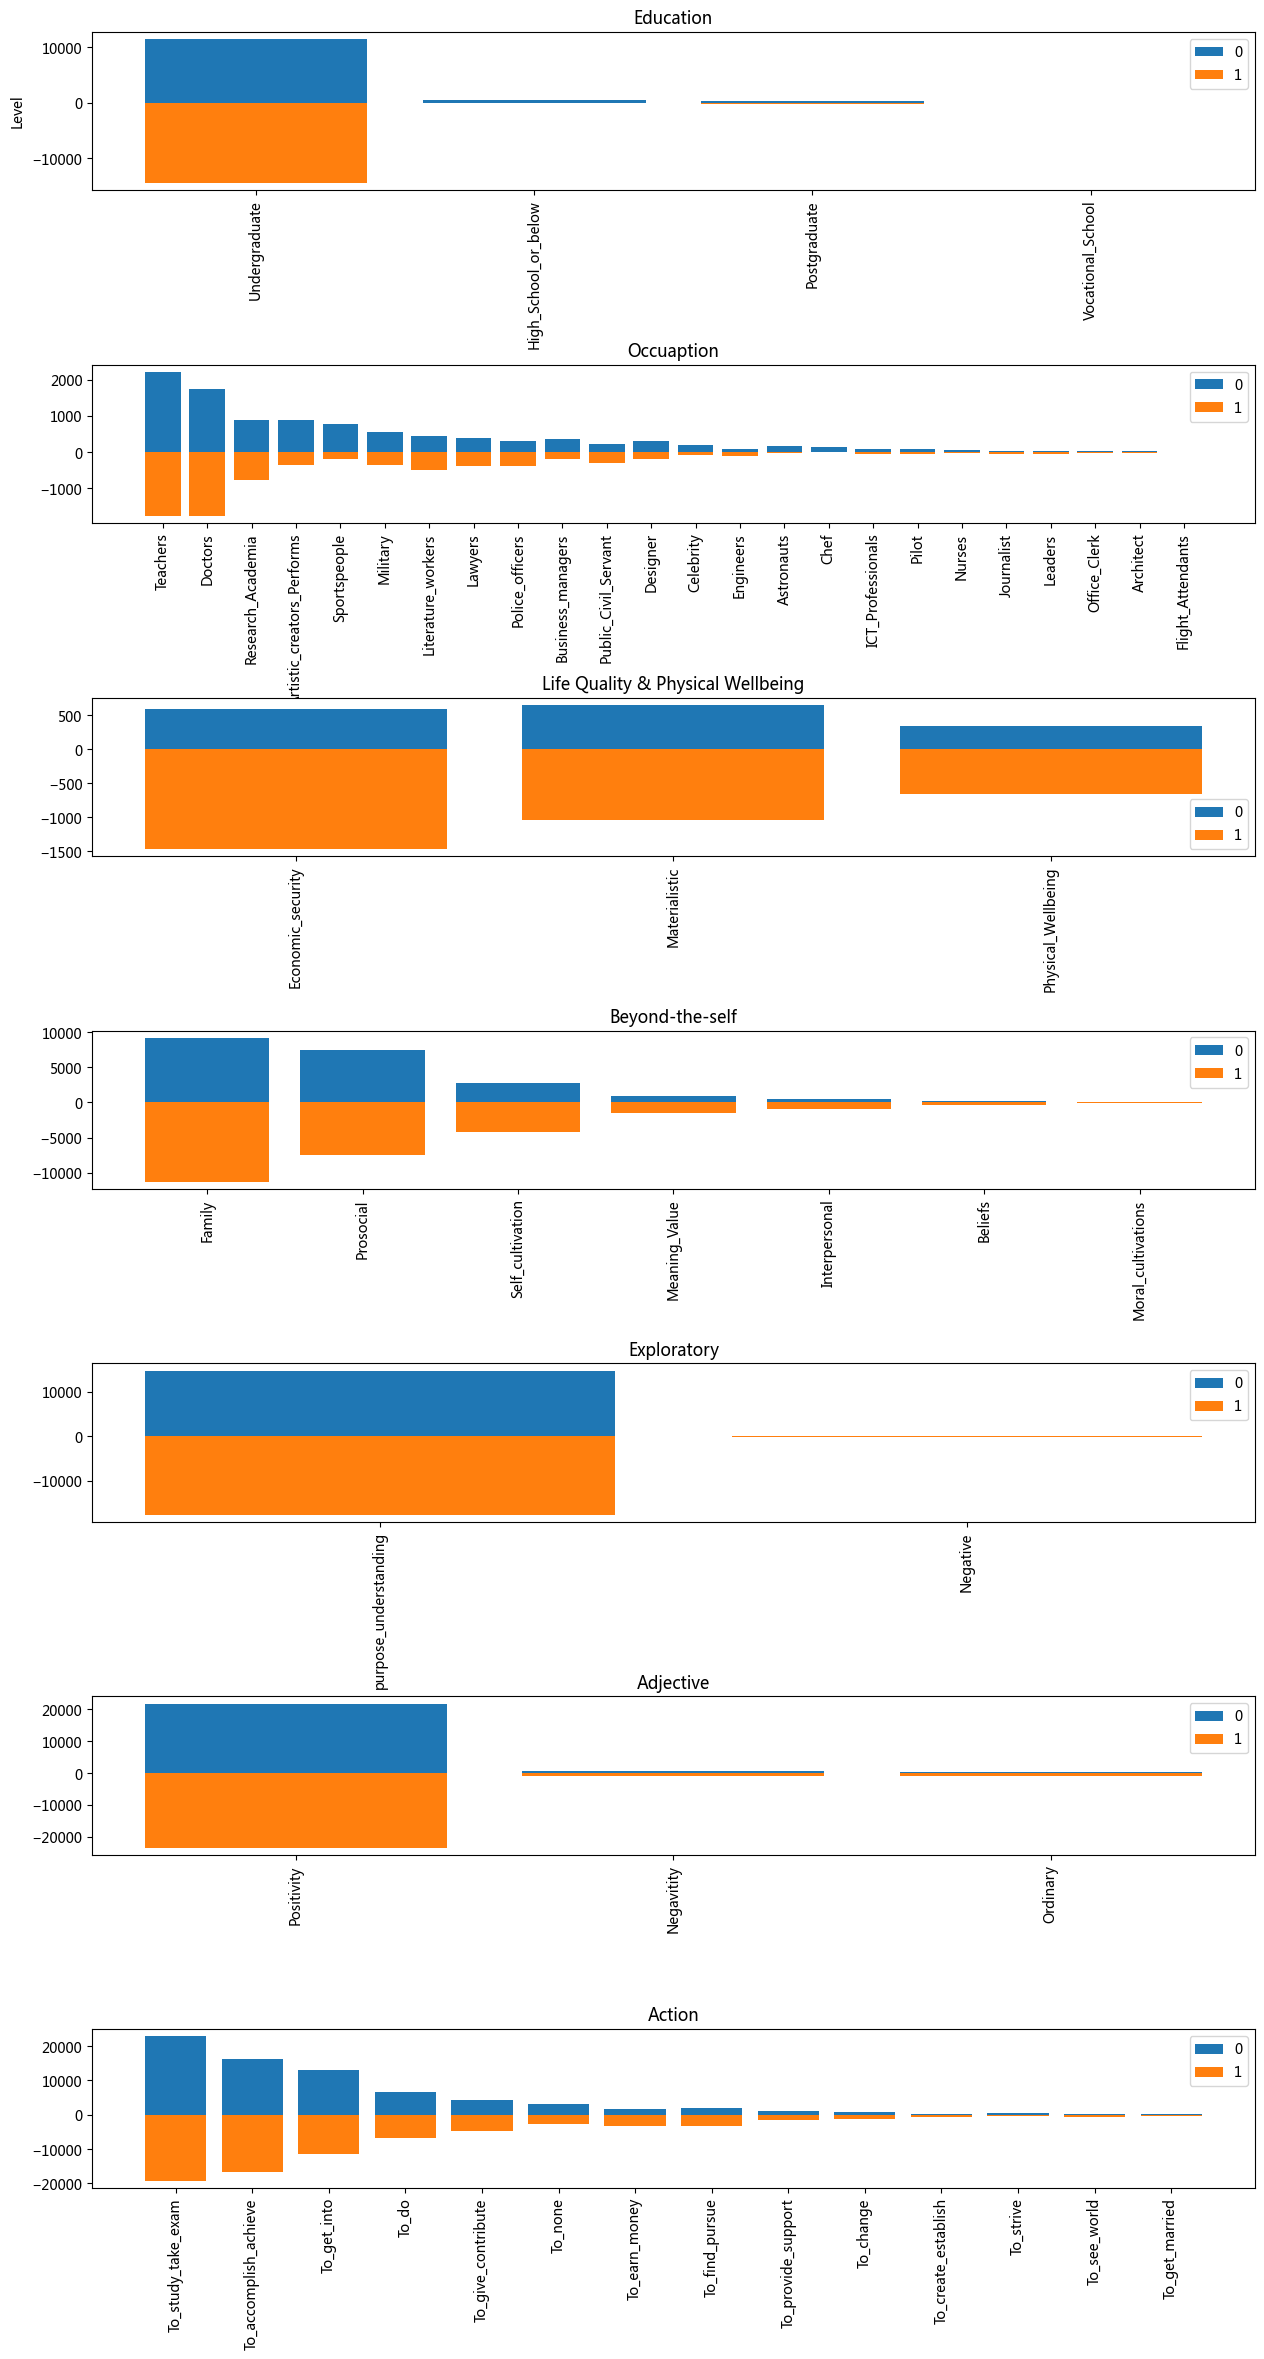

In [812]:
plot_all_de(total_data=all_data_frequency,data_0=level_1,data_1=level_2,data_2=False, label='Level')

In [ ]:
plot_all_de(total_data=all_data_frequency,data_0=level_1,data_1=level_2,data_2=level_3, label='Level')

## replace similar words

In [597]:
data_frequency_replace=all_data[['问卷发布名称','Sver','SchoolID','作答ID','开始时间','cpstext']]

In [599]:
replace_items=['rep_bo', 'rep_yi', 'rep_ya', 'rep_bai', 'rep_kang', 'rep_cai', 'rep_can', 'rep_che', 'rep_hao', 'rep_fu', 'rep_wan', 'rep_le', 'rep_gui', 'rep_sheng', 'rep_da', 'rep_chu', 'rep_yue', 'rep_tan', 'rep_mei', 'rep_yuan', 'rep_li', 'rep_yuan', 'rep_he', 'rep_gao', 'rep_you', 'rep_qin', 'rep_yi', 'rep_qing', 'rep_ji', 'rep_youhao', 'rep_zhu', 'rep_zhizu']

replace_data=[rep_bo, rep_yi, rep_ya, rep_bai, rep_kang, rep_cai, rep_can, rep_che, rep_hao, rep_fu, rep_wan, rep_le, rep_gui, rep_sheng, rep_da, rep_chu, rep_yue, rep_tan, rep_mei, rep_yuan, rep_li, rep_yuan, rep_he, rep_gao, rep_you, rep_qin, rep_yi, rep_qing, rep_ji, rep_youhao, rep_zhu, rep_zhizu]

In [600]:
for i in tqdm(range(len(replace_data))):
    for j in tqdm(range(len(replace_data[i]))):
        src_word=replace_data[i][0]
        rep_word=replace_data[i][j]
        data_frequency_replace['cpstext']=data_frequency_replace['cpstext'].str.replace(rep_word,src_word)

  0%|          | 0/3 [00:00<?, ?it/s]<ipython-input-600-45623d3088c9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_frequency_replace['cpstext']=data_frequency_replace['cpstext'].str.replace(rep_word,src_word)

100%|██████████| 32/32 [00:08<00:00,  3.58it/s]


In [602]:
all_items=noun_data+adj_data+action_data
all_words=[]
for i in all_items:
    all_words=all_words+i

In [603]:
for i in tqdm(range(len(all_words))):
    marks=all_words[i]
    
    data_frequency_replace.loc[:,marks]=data_frequency_replace['cpstext'].str.count(marks).values


  0%|          | 0/855 [00:00<?, ?it/s]<ipython-input-603-bf86bd5f3ea2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_frequency_replace.loc[:,marks]=data_frequency_replace['cpstext'].str.count(marks).values
  0%|          | 1/855 [00:00<02:03,  6.90it/s]<ipython-input-603-bf86bd5f3ea2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_frequency_replace.loc[:,marks]=data_frequency_replace['cpstext'].str.count(marks).values
  0%|          | 2/855 [00:00<01:48,  7.88it/s]<ipython-input-603-bf86bd5f

100%|██████████| 14/14 [00:00<00:00, 17.03it/s]


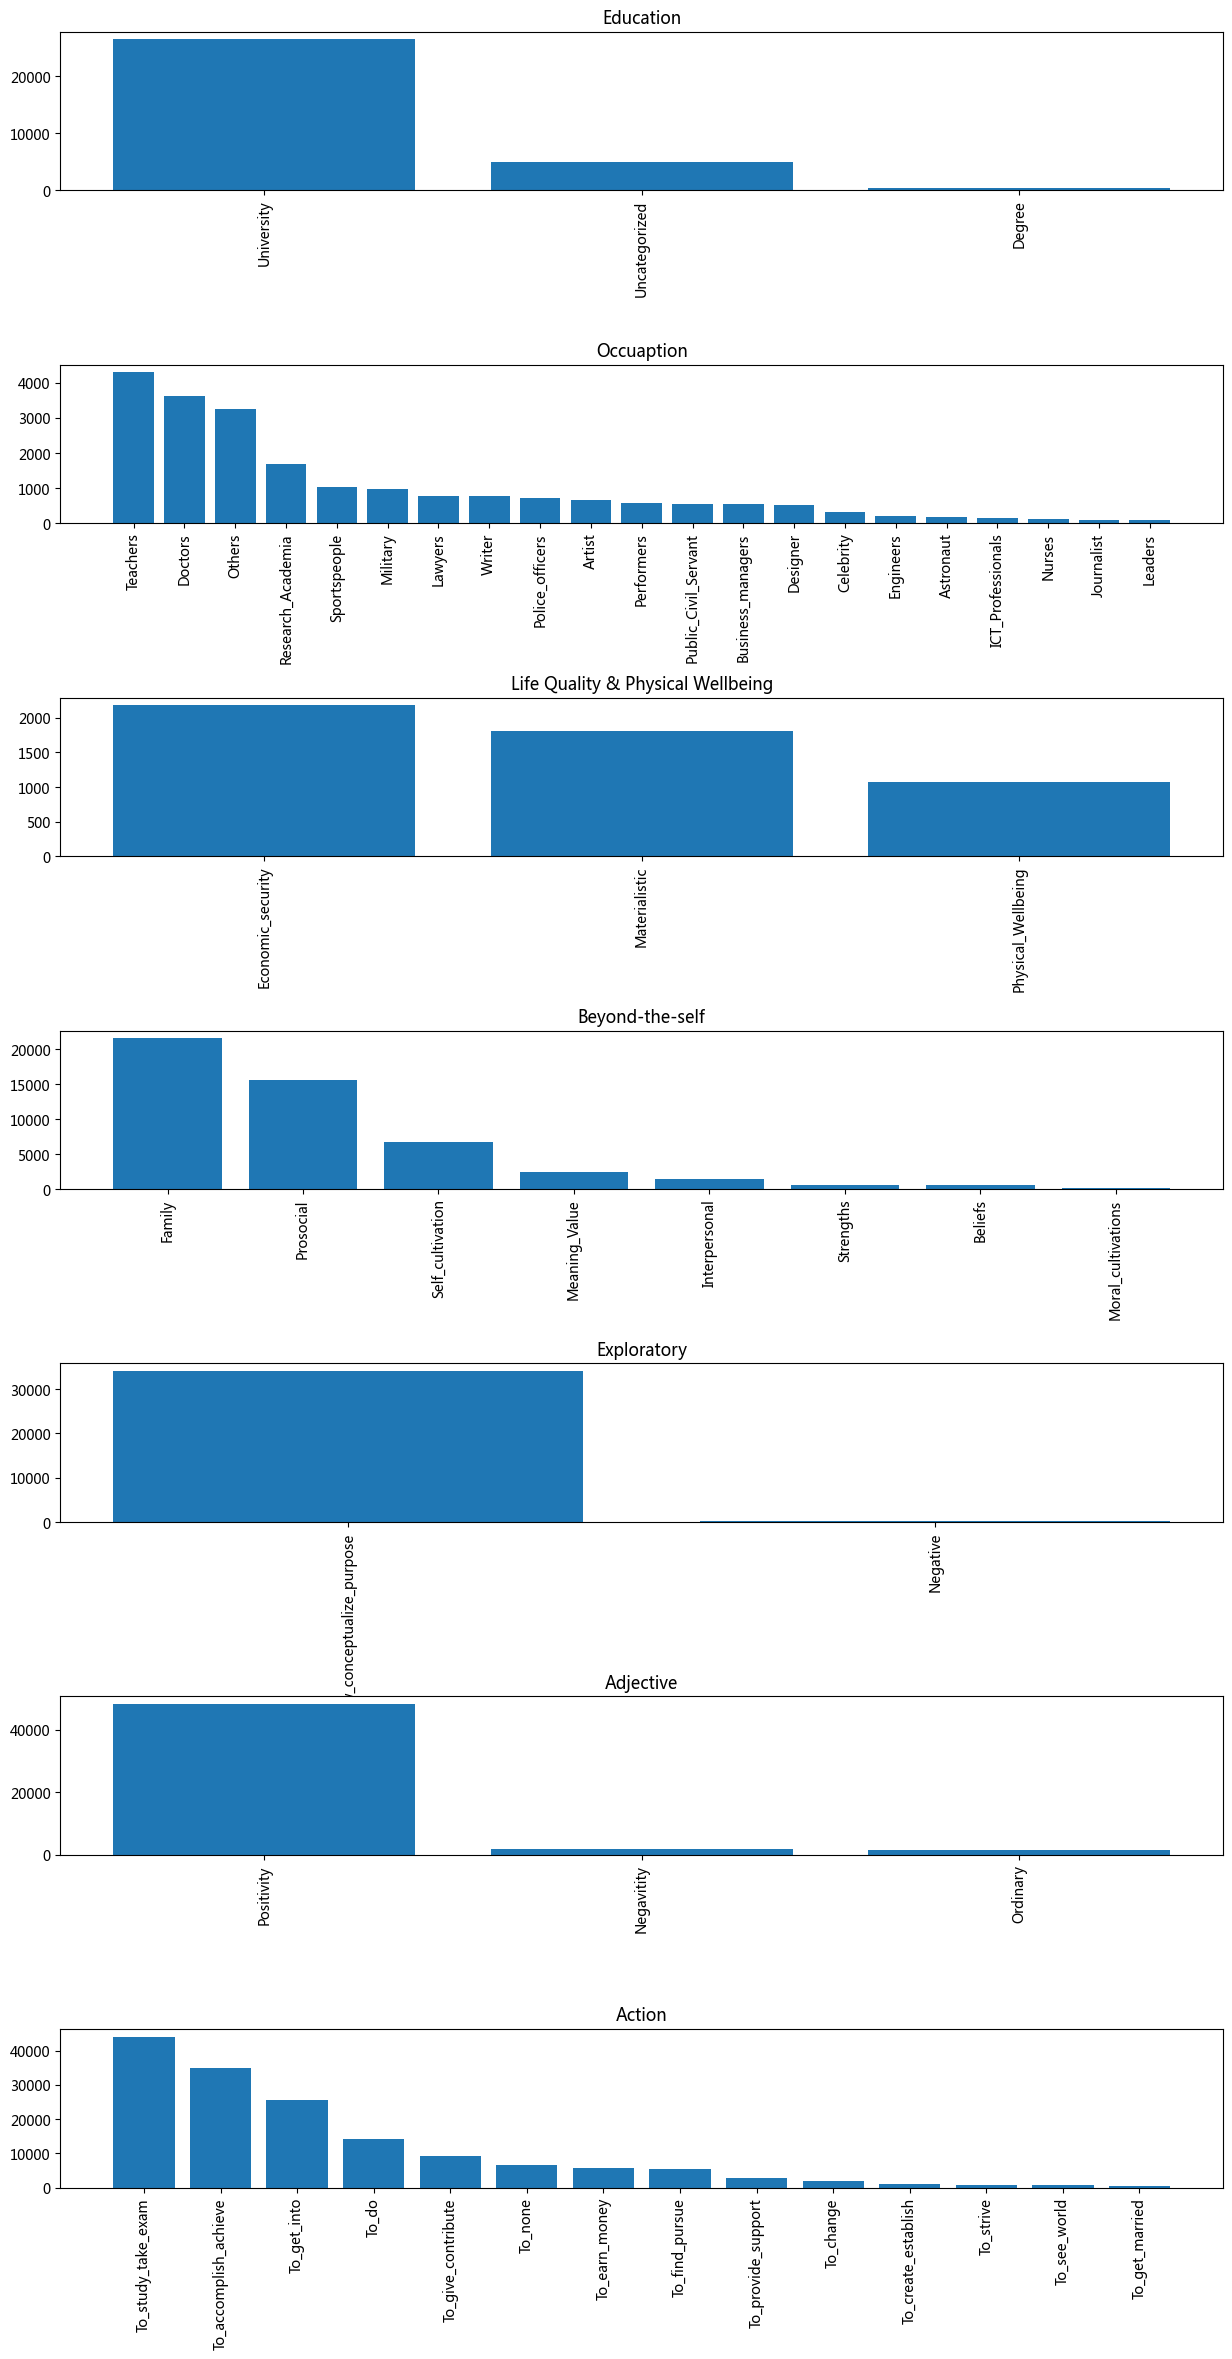

In [609]:
plt.figure(figsize=(15,28))

plt.subplot(7,1,1)
draw_selective(noun_cols[0:3], noun_data[0:3], total_data=data_frequency_replace)
plt.title("Education")

plt.subplot(7,1,2)
draw_selective(noun_cols[3:-13], noun_data[3:-13], total_data=data_frequency_replace)
plt.title("Occuaption")

plt.subplot(7,1,3)
draw_selective(noun_cols[-13:-10], noun_data[-13:-10], total_data=data_frequency_replace)
plt.title("Life Quality & Physical Wellbeing")

plt.subplot(7,1,4)
draw_selective(noun_cols[-10:-2], noun_data[-10:-2], total_data=data_frequency_replace)
plt.title("Beyond-the-self")

plt.subplot(7,1,5)
draw_selective(noun_cols[-2:], noun_data[-2:], total_data=data_frequency_replace)
plt.title("Exploratory")

plt.subplot(7,1,6)
draw_selective(adj_cols, adj_data, total_data=data_frequency_replace)
plt.title("Adjective")

plt.subplot(7,1,7)
draw_selective(action_cols, action_data, total_data=data_frequency_replace)
plt.title("Action")

plt.subplots_adjust(wspace=0.3,hspace=1.1)


plt.savefig('replace_cpstext_all.png')
plt.show()

In [503]:
data_frequency_replace['cpstext'].str.replace("谈不上","hahh",regex=False)

0                                                        ..
1                              hahh人生目标，现在高二，只想提高成绩，考一所理想大学
2                                              成为一名职业的足球运动员
3                                                      家庭美满
4                                               高考600+,家人长寿
                                ...                        
111887    想考上名校，如复旦，人大等，希望在适合自己的领域有较大的成就，希望自己能为大多数人喜爱，希望...
111888                                               考上好的大学
111889                                                   高薪
111890                                                 快快乐乐
111891                                            想成为一个有用的人
Name: cpstext, Length: 111892, dtype: object

In [507]:
data_frequency_replace

问卷发布名称 Sver SchoolID      作答ID  \
100     【2-208】南开大学附属中学津南学校2021年12月积极教育百城计划学生问卷    2      208  7Ax1X9XM   
824                         【2-168】郑州市第五十七中学南校区    2      168  7AxV3woM   
2531                        【2-168】郑州市第五十七中学南校区    2      168  7BG3vlnL   
5118          【2-137】景县第二中学2021年12月积极教育百城计划学生问卷    2      137  7KvDrqlM   
7491        【2-136】晋城市第五中学校2021年12月积极教育百城计划学生问卷    2      136  7XA6qaoL   
...                                         ...  ...      ...       ...   
107905       【2-389】安阳市第八中学2021年12月积极教育百城计划学生问卷    2      389  ev9bdDvL   
109645     【2-209】商丘市第一高级中学2021年12月积极教育百城计划学生问卷    2      209  eyP4qJnL   
109741    【2-216】贵州省盘州市第二中学2021年12月积极教育百城计划学生问卷    2      216  eyP92p9L   
110381       【2-235】西宁市海湖中学2021年12月积极教育百城计划学生问卷    2      235  eyPVdNBL   
110713       【2-201】抚顺市第二中学2021年12月积极教育百城计划学生问卷    2      201  eyPo9EvL   

                       开始时间                                            cpstext  
100     2021-12-30 10:39:31                    考上耀华，学习优异，总是超过年级第二，实现抱负---为国家效力  
824     2021-12-27 21:57:23                                     取得优异的成绩，为社会做贡献  
2531    2021-12-29 21:16:25                                   成绩优异，做一个对社会有用的人。  
5118    2021-12-31 20:25:00                                       在每次考试中都能成绩优异  
7491    2021-12-30 15:28:16                                     以优异的成绩考上中国政法大学  
...                     ...                                                ...  
107905  2022-01-04 22:00:05                                           努力学习取得优异  
109645  2021-12-25 21:37:20  在现在的日子里努力奋斗拼搏，取得优异的成绩，考上一个好大学，然后靠自己努力赚钱养父母，让我的...  
109741  2022-01-21 19:52:16                                       取得优异考上最喜欢的大学  
110381  2021-12-29 14:25:36                                 考上理想大学，过上优异的生活而奋斗。  
110713  2021-12-27 15:58:18  1.学习成绩优异 2.考上一个好大学,有一个好而且稳定的工作,让家人过上好的生活 3.身体健...  

[87 rows x 6 columns]

In [164]:
cols_series_cols=["Doctors", "Teachers", "Research_Academia", "Military", "Police_officers", "ICT_Professionals", "Sportspeople", "Artist", "Performers", "Business_managers", "Public_Civil_Servant", "Celebrity", "Astronaut", "Millionaire", "Leaders", "Lawyers", "Nurses", "Engineers", "Journalist", "Others"]

cols_series=[Doctors, Teachers, Research_Academia, Military, Police_officers, ICT_Professionals, Sportspeople, Artist, Performers, Business_managers, Public_Civil_Servant, Celebrity, Astronaut, Millionaire, Leaders, Lawyers, Nurses, Engineers, Journalist, Others]

cols_series_cols_pd=pd.DataFrame(cols_series_cols).rename(columns={0:'occupation'})

In [157]:

Doctors=['医生','外科医生','医师','军医','牙医','牙科医生','法医','兽医','心理医生']

Teachers=["老师","教师","大学老师","幼儿教师","数学老师","体育老师","小学老师","小学教师","教育家","教育工作者"]

Research_Academia=["科学家","科学研究","科研人员","物理学家","天文学家","生物学家","科研工作","研究员","院士","博士后","科技人员","经济学家","学者","哲学家","学术研究","知识分子","历史学家","地质学家","文学家","数学家","考古学家","教授","大学教授"]

Military=["军人","军官","空军","人民解放军","海军","解放军","战士","将军","士兵","部队"]

Police_officers=["警察","刑警","武警","公安"]

ICT_Professionals=["程序员","黑客"]

Sportspeople=["运动员","运动","球员","选手","电子竞技","冠军","世界冠军","队员","国家队"]

Artist=["画家","音乐家","艺术家","舞蹈家","钢琴家","歌唱家","美术家","漫画家","舞者","书法家"]

Performers=["播音员","舞蹈演员","歌手","演员","艺人","主持人","声优","舞台"]

Business_managers=["老板","企业家","总裁","董事长","经纪人","资本家"]

Public_Civil_Servant=["公务员","公职人员","官员","检察官","法官","外交官","外交"]

Celebrity=["偶像","明星","球星","巨星"]

Astronaut=["宇航员","航天员"]

Millionaire=["首富","富翁","百万富翁","富人"]

Leaders=["政治家","校长","领导","领导人","领导者"]

Lawyers=["律师"]

Nurses=["白衣天使","护士"]

Engineers=["工程师"]

Journalist=["记者","新闻记者"]

Others=["职业","事业","设计师","作家","工作者","厨师","飞行员","小说家","摄影师","翻译","商人","教练","作者","建筑师","导演","书店","发明家","专家","编辑","工人","上班族","工作室","编剧","大师","编导","会计师","技术人员","建设者","化妆师","诗人","翻译家","空姐","员工","农民","药剂师"]


In [611]:
other_ana=pd.DataFrame(Others).rename(columns={0:'occupation'})

for i in tqdm(range(len(other_ana))):
    other_ana.loc[i,'counts']=len(all_data_frequency[all_data_frequency[Others[i]]>0])
 

100%|██████████| 30/30 [00:01<00:00, 18.11it/s]


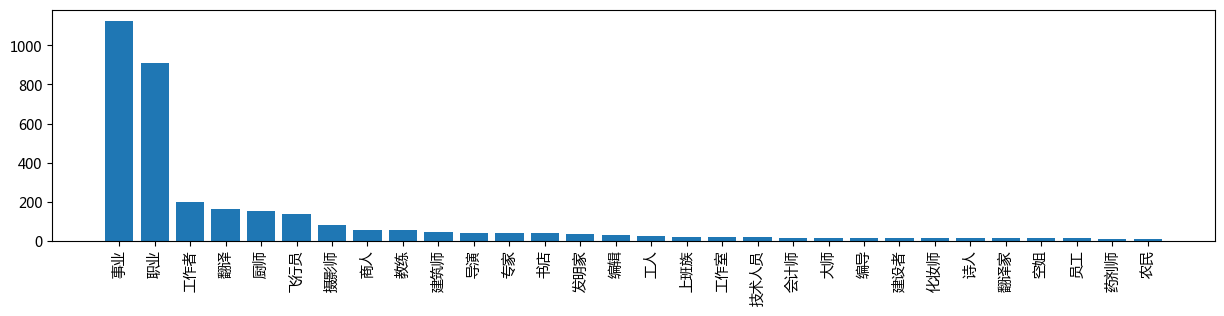

In [613]:
plt.figure(figsize=(15,3))
plt.bar([i for i in range(len(other_ana))],other_ana['counts'])
plt.xticks([i for i in range(len(other_ana))],other_ana['occupation'].tolist(),rotation=90)
plt.show()

In [612]:
other_ana=other_ana.sort_values(by='counts',ascending=False)

In [ ]:
cols_series_cols_pd=cols_series_cols_pd.sort_values(by='counts',ascending=False)
all_cols_occu=pd.concat([cols_series_cols_pd,other_ana]).reset_index(drop=True)
all_cols_occu=all_cols_occu.sort_values(by='counts',ascending=False)
all_cols_occu=all_cols_occu[~(all_cols_occu['occupation'].isin(['Others','事业','职业']))]
all_cols_occu=all_cols_occu.reset_index(drop=True)
all_cols_occu

In [225]:
plt.figure(figsize=(15,3))
plt.bar([i for i in range(len(all_cols_occu))],all_cols_occu['counts'])
plt.xticks([i for i in range(len(all_cols_occu))],all_cols_occu['occupation'].tolist(),rotation=90)
plt.show()

In [178]:

for i in tqdm(range(len(cols_series_cols_pd))):
    cols_series_cols_pd.loc[i,'counts']=len(all_data_frequency[all_data_frequency[cols_series[i]].sum(axis=1)>0])
    

100%|██████████| 20/20 [00:03<00:00,  5.53it/s]


In [191]:
plt.bar([i for i in range(len(cols_series_cols_pd))], cols_series_cols_pd['counts'])
plt.xticks([i for i in range(len(cols_series_cols_pd))],cols_series_cols_pd['occupation'].tolist(),rotation=90)
plt.show()

In [172]:
len(all_data_frequency[all_data_frequency[Others].sum(axis=1)>0])

4274

In [ ]:
for i in tqdm(range(len_words)):
    marks=items_pd['words'][i]
    
    all_data_frequency.loc[:,marks]=all_data_frequency['cpstext'].str.count(marks).values


In [433]:
all_data_frequency[all_data_frequency['中庸']>1]

KeyError: '中庸'

# Analysis of noun

In [29]:
items['tags']=tags

names=items[items['tags']=='n']

string=" ".join(names[0].tolist())

w.generate(string)

w.to_file('total_n.png')

In [464]:
noun_cols=['University', 'Degree', 'Uncategorized', 'Doctors', 'Teachers', 'Research_Academia', 'Military', 'Police_officers', 'ICT_Professionals', 'Sportspeople', 'Artist', 'Performers', 'Business_managers', 'Public_Civil_Servant', 'Celebrity', 'Astronaut', 'Leaders', 'Lawyers', 'Nurses', 'Designer', 'Writer', 'Engineers', 'Journalist', 'Others', 'Economic_security', 'Materialistic', 'Physical_Wellbeing', 'Prosocial', 'Family', 'Interpersonal', 'Meaning_Value', 'Strengths', 'Self_cultivation', 'Moral_cultivations', 'Beliefs', 'How_conceptualize_purpose', 'Negativity']

noun_data=[University, Degree, Uncategorized, Doctors, Teachers, Research_Academia, Military, Police_officers, ICT_Professionals, Sportspeople, Artist, Performers, Business_managers, Public_Civil_Servant, Celebrity, Astronaut, Leaders, Lawyers, Nurses, Designer, Writer, Engineers, Journalist, Others, Economic_security, Materialistic, Physical_Wellbeing, Prosocial, Family, Interpersonal, Meaning_Value, Strengths, Self_cultivation, Moral_cultivations, Beliefs, How_conceptualize_purpose, Negativity]

In [ ]:
### replace noun

In [396]:
rep_bo=['博士', '博士生', '博士学位']
rep_yi=['医生', '外科医生', '医师']
rep_ya=['牙医', '牙科医生']
rep_bai=['白衣天使', '护士']
rep_kang=['小康', '小康生活']
rep_cai=['财务', '财富']
rep_can=['财产', '家产']
rep_che=['车', '汽车', '车子', '跑车']

## The Self Purpose 

### Education

In [456]:

University=['大学', '师范大学', '名牌大学', '学院', '国防科技大学', '医学院', '医科大学', '公安大学', '传媒大学', '国防科', '中央美术学院', '音乐学院', '中央美院', '中央戏剧学院', '美术学院', '中央音乐学院', '人民大学', '医科大', '国防大学', '中医药大学', '海洋大学', '理工大学', '农业大学', '首都师范大学']

Degree=['研究生', '博士', '博士生', '博士学位','硕士']

Uncategorized=['成绩', '学校', '军校', '体校', '专业', '学历', '学位', '本科', '重点高中', '中学', '大学毕业', '大专', '初中', '院校', '高中毕业', '大学生', '市高', '高三', '专业知识']


### Occupation

In [457]:
Doctors=['医生','外科医生', '医师', '军医','牙医','牙科医生', '法医', '兽医','心理医生']

Teachers=['老师', '教师', '大学老师', '幼儿教师', '数学老师', '体育老师', '小学老师', '小学教师', '教育家', '教育工作者']

Research_Academia=['科学家', '科学研究', '科研人员', '物理学家', '天文学家', '生物学家', '科研工作', '研究员', '院士', '博士后', '科技人员', '经济学家', '学者', '哲学家', '学术研究', '知识分子', '历史学家', '地质学家', '文学家', '数学家', '考古学家', '教授', '大学教授']

Military=['军人', '军官', '空军', '人民解放军', '海军', '解放军', '战士', '将军', '士兵', '部队']

Police_officers=['警察', '刑警', '武警', '公安']

ICT_Professionals=['程序员', '黑客']

Sportspeople=['运动员', '运动', '球员', '选手', '电子竞技', '冠军', '世界冠军', '队员', '国家队']

Artist=['画家', '音乐家', '艺术家', '舞蹈家', '钢琴家', '歌唱家', '美术家', '漫画家', '舞者', '书法家']

Performers=['播音员', '舞蹈演员', '歌手', '演员', '艺人', '主持人', '声优', '舞台']

Business_managers=['老板', '企业家', '总裁', '董事长', '经纪人', '资本家']

Public_Civil_Servant=['公务员', '公职人员', '官员', '检察官', '法官', '外交官', '外交']

Celebrity=['偶像', '明星', '球星', '巨星']

Astronaut=['宇航员', '航天员']

Leaders=['政治家', '校长', '领导', '领导人', '领导者']

Lawyers=['律师']

Nurses=['白衣天使','护士']
                   
Designer=['设计师']

Writer=['作家', '小说家', '作者', '编剧']

Engineers=['工程师']

Journalist=['记者', '新闻记者']

Others=['职业', '事业', '工作者', '厨师', '飞行员', '摄影师', '翻译', '商人', '教练', '建筑师', '导演', '书店', '发明家', '专家', '编辑', '工人', '上班族', '工作室', '大师', '编导', '会计师', '技术人员', '建设者', '化妆师', '诗人', '翻译家', '空姐', '员工', '农民', '药剂师']

### Life Quanlity

In [458]:
Economic_security=['工资', '收入', '衣食无忧', '物质', '基础', '温饱', '物质基础', '物质条件', '小康', '小康生活', '存款', '积蓄', '财务', '财富']

Materialistic=['房子', '金钱', '钱财', '大钱', '首富', '富翁', '百万富翁', '财产', '家产', '车', '汽车', '车子', '跑车']


### Physical Wellbeing

In [459]:
Physical_Wellbeing=['身体健康', '身体', '体魄', '活到']

## Beyond-the-self

### Prosocial

In [460]:
Prosocial=['社会', '贡献', '国家', '世界', '祖国', '和平', '中华民族', '人类', '环境', '全世界', '天下', '民族', '家乡', '贡献力量', '地球', '自然', '报国', '我国', '文明', '志愿者', '公益', '公民', '百姓', '爱心', '福祉', '山河', '志愿', '人类文明', '环境保护', '公益活动', '集体', '大自然', '国之', '生态环境', '人人平等', '共同体', '大国', '公益事业', '天下大同', '社会安定', '国旗', '盛世']


### Family & Relationships

In [461]:
Family=['父母', '家人', '爸爸妈妈', '妈妈', '家', '母亲', '一家人', '爷爷奶奶', '姐姐', '弟弟', '爸爸', '长辈', '妹妹', '父亲', '子女', '父母亲','奶奶', '爷爷', '外婆', '儿女', '全家人', '妈', '儿子', '外公', '姥姥', '亲情', '爸', '女儿', '姥爷', '孝心', '亲友', '老婆', '伴侣', '妻子', '媳妇', '婚姻', '丈夫', '媳妇儿', '对象']

Interpersonal=['爱情', '朋友', '人际关系', '知己', '关系', '好友', '同学', '友谊', '友情', '社交', '人际交往', '人缘', '人际']


### Mind & Spirituality

In [462]:
Meaning_Value=['意义', '价值', '人生价值', '价值观']
Strengths=['力量', '能量']
Self_cultivation=['知识', '梦', '精神', '内心', '思想', '心', '身心', '灵魂', '智慧', '修养', '心灵', '素质', '情感', '勇气', '涵养']
Moral_cultivations=['道德', '正义']
Beliefs=['信仰', '信念', '党', '共产主义', '社会主义', '共产党员', '接班人', '共产党', '无产阶级']

## Exploratory

In [476]:
How_conceptualize_purpose=['理想', '梦想', '目标', '人生目标', '人', '事', '事情']

Negative=['压力', '负担', '咸鱼']


# Analysis of adj

In [30]:

names=items[items['tags']=='a']

string=" ".join(names[0].tolist())

w.generate(string)

w.to_file('total_a.png')

In [455]:
adj_cols=['Positivity','Ordinary','Negavitity']
adj_data=[Positivity, Ordinary, Negativity]

In [454]:
Positivity=['好', '良好', '丰富', '幸福', '美好幸福', '幸福家庭', '美满', '幸福美满', '美满生活', '幸福生活', '美满幸福', '幸福快乐', '幸福美好', '独特', '忠诚', '崇高', '知心', '称心', '有用', '好玩', '有趣', '快乐', '欢乐', '愉悦', '快活', '健康长寿', '富贵', '富', '富甲一方', '富裕', '强盛', '昌盛', '兴旺', '富强', '健康', '出色', '巨大', '巨大贡献', '重大', '重大贡献', '杰出', '杰出贡献', '突出贡献', '卓越', '卓越贡献', '舒坦', '舒心', '舒服', '顺心', '轻松自在', '安逸', '惬意', '美好', '美好生活', '美好世界', '美好时光', '美好未来', '强大', '高兴', '远大', '远大理想', '远大目标', '幽默', '诚实', '珍贵', '自由', '坚强', '开心', '美丽', '漂亮', '浪漫', '灿烂', '饱满', '优秀', '热烈', '认真', '全面', '成熟', '惊喜', '坦荡', '了不起', '有力', '平安', '圆满', '完满', '完整', '宽裕', '清闲', '成功', '温馨', '活泼', '独立', '和睦', '和谐', '和睦相处', '公正', '高尚', '高上', '奇妙', '有益于', '有利', '主动', '新鲜', '平稳', '正直', '勤奋努力', '勤奋工作', '勤奋', '勤劳', '辛勤', '刻苦', '伟大', '清净', '神圣', '不错', '固定', '洒脱', '暖', '丰厚', '宽广', '优异', '优异成绩', '轻松', '轻松自由', '宽松', '轻松愉快', '勇敢', '美妙', '积极', '积极意义', '顺利', '悠闲', '得体', '自豪', '富饶', '健硕', '骄傲', '优越', '称职', '大好', '真诚', '耀眼', '明确', '精致', '强壮', '坚定', '安心', '棒', '宝贵', '辉煌', '强健', '友好', '友好相处', '重要', '可观', '融洽', '亲密', '厉害', '渊博', '公平', '潇洒', '高超', '正确', '民主', '大胆', '耐心', '温柔', '长远', '繁华', '超脱', '上进', '可爱', '懂事', '稳', '坚实', '乐观', '好看', '充裕', '实在', '广阔', '纯真', '精彩', '公平正义', '拔尖', '完美', '从容', '明朗', '开朗', '优雅', '神奇', '舒适', '有效', '豁达', '好学', '坚决', '著名', '知名', '有名', '干净', '得意', '外向', '先进', '争气', '新奇', '愉快', '真挚', '优美', '善良', '突出', '容易', '可亲', '高级', '可靠', '团结', '踏实', '勇敢的人', '显著', '清醒', '发达', '活得久', '真实', '年轻', '扎实', '冷静']

Ordinary=['平静', '普通', '平淡', '平凡人', '知足常乐', '平常', '朴实', '朴素', '简单', '恬淡', '知足', '足矣', '安静', '安详']

Negativity=['疯狂', '抑郁', '坎坷', '难过', '遗憾', '难', '焦虑', '平庸', '贫困', '不好', '遗憾', '失望', '辛苦', '累', '黑暗', '孤独', '苦', '苦恼', '忧愁', '差', '傻', '难', '焦虑', '颓废', '坏', '悲伤', '浑浑噩噩', '抑郁症', '浮躁', '消极', '委屈', '烦心', '疼', '为难', '冷漠', '艰苦', '黑暗面', '卑微', '麻木', '贪财好色', '拮据', '贫苦', '消极', '盲目', '可怜', '有害', '刻板', '肤浅', '不起眼', '庸俗']


In [ ]:
## replace

In [408]:
rep_hao=['好', '良好']
rep_fu=['幸福', '美好幸福', '幸福家庭', '美满', '幸福美满', '美满生活', '幸福生活', '美满幸福', '幸福快乐', '幸福美好']
rep_wan=['好玩', '有趣']
rep_le=['快乐', '欢乐', '愉悦', '快活']
rep_gui=['富贵', '富', '富甲一方', '富裕']
rep_sheng=['强盛', '昌盛', '兴旺', '富强']
rep_da=['巨大', '巨大贡献', '重大', '重大贡献']
rep_chu=['杰出', '杰出贡献', '突出贡献']
rep_yue=['卓越', '卓越贡献']
rep_tan=['舒坦', '舒心', '舒服', '顺心', '轻松自在', '安逸', '惬意']
rep_mei=['美好', '美好生活', '美好世界', '美好时光', '美好未来']
rep_yuan=['远大', '远大理想', '远大目标']
rep_li=['美丽', '漂亮']
rep_yuan=['圆满', '完满', '完整']
rep_he=['和睦', '和谐', '和睦相处']
rep_gao=['高尚', '高上']
rep_you=['有益于', '有利']
rep_qin=['勤奋努力', '勤奋工作', '勤奋', '勤劳', '辛勤', '刻苦']
rep_yi=['优异', '优异成绩']
rep_qing=['轻松', '轻松自由', '宽松', '轻松愉快']
rep_ji=['积极', '积极意义']
rep_youhao=['友好', '友好相处']
rep_zhu=['著名', '知名', '有名']
rep_zhizu=['知足','足矣']


# Analysis of action

In [253]:
all_data_frequency[all_data_frequency['考博']>0]

问卷发布名称 Sver SchoolID  \
19856            【2-217】山西省高平市第一中学2021年12月积极教育百城计划学生问卷    2      217   
20424               【2-389】安阳市第八中学2021年12月积极教育百城计划学生问卷    2      389   
22761               【2-206】沧州市第一中学2021年12月积极教育百城计划学生问卷    2      206   
25438               【2-204】娄底市第三中学2021年12月积极教育百城计划学生问卷    2      204   
31498              【2-210】长沙市第十五中学2021年12月积极教育百城计划学生问卷    2      210   
32196          【2-132】湖南省岳阳市弘毅新华中学2021年12月积极教育百城计划学生问卷    2      132   
33104               【2-194】岳阳市第一中学2021年12月积极教育百城计划学生问卷    2      194   
38905               【2-204】娄底市第三中学2021年12月积极教育百城计划学生问卷    2      204   
38928             【2-191】兰州市第六十三中学2021年12月积极教育百城计划学生问卷    2      191   
39144               【2-234】吉林市第一中学2021年12月积极教育百城计划学生问卷    2      234   
39267               【2-234】吉林市第一中学2021年12月积极教育百城计划学生问卷    2      234   
46150               【2-204】娄底市第三中学2021年12月积极教育百城计划学生问卷    2      204   
46429                                 【2-167】郑州市第五十八中学    2      167   
48814            【2-359】阆中市白塔初级中学校2021年12月积极教育百城计划学生问卷    2      359   
49320          【2-119】广西贺州市钟山县第一中学2021年12月积极教育百城计划学生问卷    2      119   
61822        【2-155】四川省攀枝花市第二初级中学校2021年12月积极教育百城计划学生问卷    2      155   
62722              【2-214】六盘水市第三中学2021年12月积极教育百城计划学生问卷    2      214   
64293               【2-234】吉林市第一中学2021年12月积极教育百城计划学生问卷    2      234   
66940            【2-217】山西省高平市第一中学2021年12月积极教育百城计划学生问卷    2      217   
67263               【2-128】鹤壁市明志中学2021年12月积极教育百城计划学生问卷    2      128   
68394               【2-215】邹平市第二中学2021年12月积极教育百城计划学生问卷    2      215   
69100            【2-218】安徽省霍邱县第一中学2021年12月积极教育百城计划学生问卷    2      218   
69876            【2-218】安徽省霍邱县第一中学2021年12月积极教育百城计划学生问卷    2      218   
71734          【2-132】湖南省岳阳市弘毅新华中学2021年12月积极教育百城计划学生问卷    2      132   
85627             【2-209】商丘市第一高级中学2021年12月积极教育百城计划学生问卷    2      209   
86199        【2-126】河南省三门峡市渑池县韶州中学2021年12月积极教育百城计划学生问卷    2      126   
89943               【2-198】四川省达州中学2021年12月积极教育百城计划学生问卷    2      198   
90726               【2-389】安阳市第八中学2021年12月积极教育百城计划学生问卷    2      389   
103127              【2-389】安阳市第八中学2021年12月积极教育百城计划学生问卷    2      389   
103613           【2-236】东辽县第一高级中学校2021年12月积极教育百城计划学生问卷    2      236   
104593       【2-211】首都师范大学附属中学昌平学校2021年12月积极教育百城计划学生问卷    2      211   
106672         【2-132】湖南省岳阳市弘毅新华中学2021年12月积极教育百城计划学生问卷    2      132   
110260     【2-207】北京师范大学（珠海）附属高级中学2021年12月积极教育百城计划学生问卷    2      207   
111037  【2-121】贵州省铜仁市松桃苗族自治县孟溪孟溪中学2021年12月积极教育百城计划学生问卷    2      121   

            作答ID                 开始时间  \
19856   7lOddB5M  2021-12-30 10:19:50   
20424   7qXA30qM  2022-01-03 21:08:26   
22761   7qXpNmyM  2022-01-01 08:39:16   
25438   L0ml9DDe  2022-01-10 16:11:09   
31498   LQ8Dnkq7  2022-01-07 10:46:22   
32196   LQ8PGlG7  2022-01-02 19:26:20   
33104   LQ8WYPQ7  2022-01-04 17:06:31   
38905   Lm9o4pdL  2021-12-30 16:16:57   
38928   Lm9o6ngL  2021-12-30 17:02:15   
39144   Lm9ow8KL  2021-12-31 13:34:45   
39267   LwP040Ye  2022-01-02 15:36:59   
46150   M1KR6E2L  2021-12-31 17:18:33   
46429   M1KRR4WL  2021-12-31 20:12:05   
48814   M28BzaqL  2022-01-02 08:47:00   
49320   M28K9glL  2022-01-10 16:22:44   
61822   MRDJbbKL  2021-12-24 20:34:32   
62722   MWW3n2XM  2009-07-30 08:03:05   
64293   MWWpK1PM  2022-01-02 16:31:38   
66940   MZqrrrre  2022-01-05 16:12:44   
67263   MdP2jmzM  2022-01-06 15:48:17   
68394   MdPXj9NM  2022-01-02 10:52:08   
69100   MdPy2zZM  2022-01-03 16:29:12   
69876   MgE8y1OL  2022-01-05 08:18:47   
71734   Mo1K1vKL  2022-01-03 11:17:07   
85627   e5ymXmVe  2021-12-25 14:24:15   
86199   e8Y2g4zM  2021-12-27 10:36:55   
89943   eEKEnv67  2021-12-29 20:35:22   
90726   eEKjNW97  2022-01-03 21:39:52   
103127  en9aQONL  2022-01-03 21:24:53   
103613  en9zBONL  2021-12-31 18:52:20   
104593  epDApwZe  2022-01-07 19:18:25   
106672  ev90aaxL  2022-01-02 23:06:25   
110260  eyPV1ZvL  2021-12-29 16:05:21   
111037  eyPvGVEL  2022-01-06 10:29:55   

                                                  cpstext  的  考上  大学  好  ...  \
19856      

In [453]:


action_cols=['To_accomplish_achieve', 'To_get_into', 'To_earn_money', 'To_get_married', 'To_do', 'To_study_take_exam', 'To_provide_support', 'To_give_contribute', 'To_find_pursue', 'To_create_establish', 'To_change', 'To_see_world', 'To_strive', 'To_none']


action_data=[To_accomplish_achieve, To_get_into, To_earn_money, To_get_married, To_do, To_study_take_exam, To_provide_support, To_give_contribute, To_find_pursue, To_create_establish, To_change, To_see_world, To_strive, To_none]


In [452]:
To_accomplish_achieve=['成为', '当', '过', '找到', '实现', '能够', '过上', '完成', '得', '得到', '能为', '获得', '取得', '争取', '达到', '见到', '感到', '做到', '拿到', '看到', '考到', '能过', '做到', '实现理想', '过个', '能当', '回到', '到达', '获得成功', '获取', '实现目标', '赢得', '达成', '追到', '帮到', '来到', '得以', '当官', '达到目标', '获得理想', '买得起', '到手']

To_get_into=['考上', '考入', '考好', '高考', '考取', '考进', '上学', '完成学业', '会考', '读完', '考出', '学到', '考学', '能考', '想学', '考重本', '考去', '读好', '搞好学习', '读上', '就读', '保送', '考好点', '能学', '考博', '考研']
To_earn_money=['赚钱', '有钱', '赚', '挣钱', '赚大钱', '挣', '挣大钱', '暴富', '有钱人', '搞钱', '发财', '发大财', '发家致富', '攒钱', '转钱', '致富', '找钱', '赚取', '有钱有势', '创造财富', '赚到']
To_get_married=['娶', '迎娶', '结婚', '生子', '娶媳妇', '找对象']

To_do=['做', '做出', '从事', '做好']

To_study_take_exam=['考', '考大学', '学习', '读书', '学', '学医', '读研', '学法', '攻读', '去学', '留学']

To_provide_support=['孝敬父母', '照顾', '养活', '养', '孝敬', '培养', '养父母', '养育之恩', '养育', '养好', '尽孝', '能养', '养得']

To_give_contribute=['给', '帮助', '报效祖国', '奉献', '作出贡献', '作贡献', '报效', '造福', '献出', '造福人类', '添砖加瓦', '保卫祖国', '投身于', '投身', '献身', '救人', '弘扬', '捐款', '献', '推动', '维护正义', '保卫', '报孝', '捐给', '奉献给']

To_find_pursue=['找', '找个', '寻找', '找份', '追', '追寻', '追逐', '追上', '探寻', '寻求', '追梦', '找寻', '找回']

To_create_establish=['创造', '组建', '建立', '树立', '创立', '创新', '创办', '创建', '开创', '建成', '建', '构建']

To_change=['变得', '改变', '变', '变成', '改变命运', '变瘦', '改变现状', '变好', '变强', '变美', '变为', '变美变', '变更']

To_see_world=['环游世界', '周游世界', '旅行', '环游', '游历']

To_strive=['奋斗', '争取', '拼']

To_none=['没有', '无', '没', '不知', '漫无目的', '无无无', '毫无', '得过且过']

In [152]:
total_data=all_data
names_total=return_items(total_data)
names_total_n=names_total[names_total['tags']=='n']
names_total_v=names_total[names_total['tags']=='v']
names_total_a=names_total[names_total['tags']=='a']
string_n=" ".join(names_total_n[0].tolist())
string_v=" ".join(names_total_v[0].tolist())
string_a=" ".join(names_total_a[0].tolist())
w.generate(string_n)
w.to_file('total_n.png') 
w.generate(string_v)
w.to_file('total_v.png')  
w.generate(string_a)
w.to_file('total_a.png')  
    

100%|██████████| 756232/756232 [02:26<00:00, 5176.55it/s]


In [154]:
names_total_n.value_counts().to_csv('total_counts_n.csv')
names_total_v.value_counts().to_csv('total_counts_v.csv')
names_total_a.value_counts().to_csv('total_counts_a.csv')

# gender 

In [26]:


def return_items(pdfile):
    items=[]
    for i in tqdm(range(len(pdfile))):
        try:
            items=items+pdfile['jieba_split'][i]
        except:
            pass

    items=pd.DataFrame(items)

    tags=[]
    for i in tqdm(range(len(items))):
        s1=SnowNLP(items[0][i])
        a1,a2=zip(*s1.tags)
        tags.append(a2[0]) 

    items['tags']=tags

    
    return items


    


In [27]:
male_data=all_data[all_data['gender']==1]
names_male=return_items(male_data)
names_male_n=names_male[names_male['tags']=='n']
names_male_v=names_male[names_male['tags']=='v']
names_male_a=names_male[names_male['tags']=='a']
string_n=" ".join(names_male_n[0].tolist())
string_v=" ".join(names_male_v[0].tolist())
string_a=" ".join(names_male_a[0].tolist())
w.generate(string_n)
w.to_file('total_male_n.png') 
w.generate(string_v)
w.to_file('total_male_v.png')  
w.generate(string_a)
w.to_file('total_male_a.png')  
    


100%|██████████| 165925/165925 [00:32<00:00, 5163.16it/s]


In [30]:
ggg=[a[0] for a in names_male_n.value_counts().keys()[0:10].tolist()]

In [143]:
names_male_n.value_counts().to_csv('male_counts_n.csv')
names_male_v.value_counts().to_csv('male_counts_v.csv')
names_male_a.value_counts().to_csv('male_counts_a.csv')

In [32]:
female_data=all_data[all_data['gender']==0]
names_female=return_items(female_data)
names_female_n=names_female[names_female['tags']=='n']
names_female_v=names_female[names_female['tags']=='v']
names_female_a=names_female[names_female['tags']=='a']
string_n=" ".join(names_female_n[0].tolist())
string_v=" ".join(names_female_v[0].tolist())
string_a=" ".join(names_female_a[0].tolist())
w.generate(string_n)
w.to_file('total_female_n.png') 
w.generate(string_v)
w.to_file('total_female_v.png')  
w.generate(string_a)
w.to_file('total_female_a.png')  
    

100%|██████████| 213951/213951 [00:40<00:00, 5244.37it/s]


In [145]:
names_female_n.value_counts().to_csv('female_counts_n.csv')
names_female_v.value_counts().to_csv('female_counts_v.csv')
names_female_a.value_counts().to_csv('female_counts_a.csv')

# middle school and high school

In [34]:
mid_data=all_data[all_data['初中']==1]
names_mid=return_items(mid_data)
names_mid_n=names_mid[names_mid['tags']=='n']
names_mid_v=names_mid[names_mid['tags']=='v']
names_mid_a=names_mid[names_mid['tags']=='a']
string_n=" ".join(names_mid_n[0].tolist())
string_v=" ".join(names_mid_v[0].tolist())
string_a=" ".join(names_mid_a[0].tolist())
w.generate(string_n)
w.to_file('total_mid_n.png') 
w.generate(string_v)
w.to_file('total_mid_v.png')  
w.generate(string_a)
w.to_file('total_mid_a.png') 

100%|██████████| 162185/162185 [00:31<00:00, 5191.97it/s]


In [146]:
names_mid_n.value_counts().to_csv('mid_counts_n.csv')
names_mid_v.value_counts().to_csv('mid_counts_v.csv')
names_mid_a.value_counts().to_csv('mid_counts_a.csv')

In [35]:
high_data=all_data[all_data['高中']==1]
names_high=return_items(high_data)
names_high_n=names_high[names_high['tags']=='n']
names_high_v=names_high[names_high['tags']=='v']
names_high_a=names_high[names_high['tags']=='a']
string_n=" ".join(names_high_n[0].tolist())
string_v=" ".join(names_high_v[0].tolist())
string_a=" ".join(names_high_a[0].tolist())
w.generate(string_n)
w.to_file('total_high_n.png') 
w.generate(string_v)
w.to_file('total_high_v.png')  
w.generate(string_a)
w.to_file('total_high_a.png') 

100%|██████████| 181508/181508 [00:34<00:00, 5224.41it/s]


In [148]:
names_high_n.value_counts().to_csv('high_counts_n.csv')
names_high_v.value_counts().to_csv('high_counts_v.csv')
names_high_a.value_counts().to_csv('high_counts_a.csv')

# rural and urban

In [36]:
urban_data=all_data[all_data['urban']==1]
names_urban=return_items(urban_data)
names_urban_n=names_urban[names_urban['tags']=='n']
names_urban_v=names_urban[names_urban['tags']=='v']
names_urban_a=names_urban[names_urban['tags']=='a']
string_n=" ".join(names_urban_n[0].tolist())
string_v=" ".join(names_urban_v[0].tolist())
string_a=" ".join(names_urban_a[0].tolist())
w.generate(string_n)
w.to_file('total_urban_n.png') 
w.generate(string_v)
w.to_file('total_urban_v.png')  
w.generate(string_a)
w.to_file('total_urban_a.png') 

100%|██████████| 328498/328498 [01:02<00:00, 5296.41it/s]


In [149]:
names_urban_n.value_counts().to_csv('urban_counts_n.csv')
names_urban_v.value_counts().to_csv('urban_counts_v.csv')
names_urban_a.value_counts().to_csv('urban_counts_a.csv')

In [37]:
rural_data=all_data[all_data['urban']==0]
names_rural=return_items(rural_data)
names_rural_n=names_rural[names_rural['tags']=='n']
names_rural_v=names_rural[names_rural['tags']=='v']
names_rural_a=names_rural[names_rural['tags']=='a']
string_n=" ".join(names_rural_n[0].tolist())
string_v=" ".join(names_rural_v[0].tolist())
string_a=" ".join(names_rural_a[0].tolist())
w.generate(string_n)
w.to_file('total_rural_n.png') 
w.generate(string_v)
w.to_file('total_rural_v.png')  
w.generate(string_a)
w.to_file('total_rural_a.png') 

100%|██████████| 54008/54008 [00:10<00:00, 5260.96it/s]


In [151]:
names_rural_n.value_counts().to_csv('rural_counts_n.csv')
names_rural_v.value_counts().to_csv('rural_counts_v.csv')
names_rural_a.value_counts().to_csv('rural_counts_a.csv')

In [42]:
names_rural_n.value_counts().keys()

MultiIndex([(  '大学', 'n'),
            (   '人', 'n'),
            (  '理想', 'n'),
            (  '父母', 'n'),
            (  '社会', 'n'),
            (  '贡献', 'n'),
            (  '家人', 'n'),
            (  '国家', 'n'),
            (  '医生', 'n'),
            (  '老师', 'n'),
            ...
            ('建筑设计', 'n'),
            (  '建议', 'n'),
            (  '强者', 'n'),
            ( '影响力', 'n'),
            (  '影音', 'n'),
            (  '往事', 'n'),
            (  '待遇', 'n'),
            (  '心做', 'n'),
            (  '心宜', 'n'),
            (  '战士', 'n')],
           names=[0, 'tags'], length=1155)

In [122]:
plt.figure(figsize=(15,15))
nums=[i for i in range(20)]
plt.subplot(3,2,1)
ggg_male=[a[0] for a in names_male_n.value_counts().keys()[0:20].tolist()]
plt.bar(nums,names_male_n.value_counts().values[0:20])
plt.xticks(nums,ggg_male,rotation='60')
plt.title('male_'+str(len(male_data)))
plt.ylim(0,8000)
plt.subplot(3,2,2)
ggg_female=[a[0] for a in names_female_n.value_counts().keys()[0:20].tolist()]
plt.bar(nums,names_female_n.value_counts().values[0:20])
plt.xticks(nums,ggg_female,rotation='60')
plt.title('female_'+str(len(female_data)))
plt.ylim(0,8000)

plt.subplot(3,2,3)
ggg_rural=[a[0] for a in names_rural_n.value_counts().keys()[0:20].tolist()]
plt.bar(nums,names_rural_n.value_counts().values[0:20])
plt.xticks(nums,ggg_rural,rotation='60')
plt.title('rural_'+str(len(rural_data)))
plt.ylim(0,8000)
plt.subplot(3,2,4)
ggg_urban=[a[0] for a in names_urban_n.value_counts().keys()[0:20].tolist()]
plt.bar(nums,names_urban_n.value_counts().values[0:20])
plt.xticks(nums,ggg_urban,rotation='60')
plt.title('urban_'+str(len(urban_data)))
plt.ylim(0,8000)

plt.subplot(3,2,5)
ggg_mid=[a[0] for a in names_mid_n.value_counts().keys()[0:20].tolist()]
plt.bar(nums,names_mid_n.value_counts().values[0:20])
plt.xticks(nums,ggg_mid,rotation='60')
plt.title('mid_'+str(len(mid_data)))
plt.ylim(0,8000)
plt.subplot(3,2,6)
ggg_high=[a[0] for a in names_high_n.value_counts().keys()[0:20].tolist()]
plt.bar(nums,names_high_n.value_counts().values[0:20])
plt.xticks(nums,ggg_high,rotation='60')
plt.title('high_'+str(len(high_data)))
plt.ylim(0,8000)
plt.show()

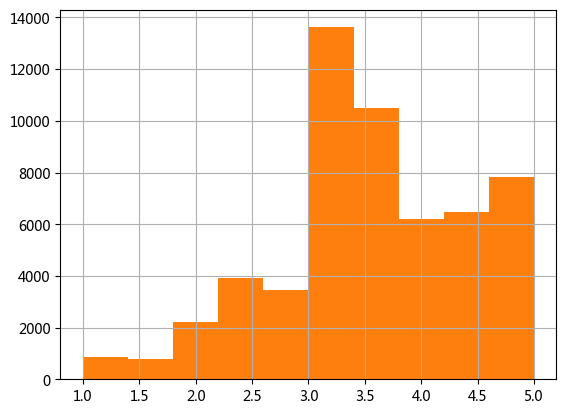

In [129]:
male_data['CPS_BS'].hist()


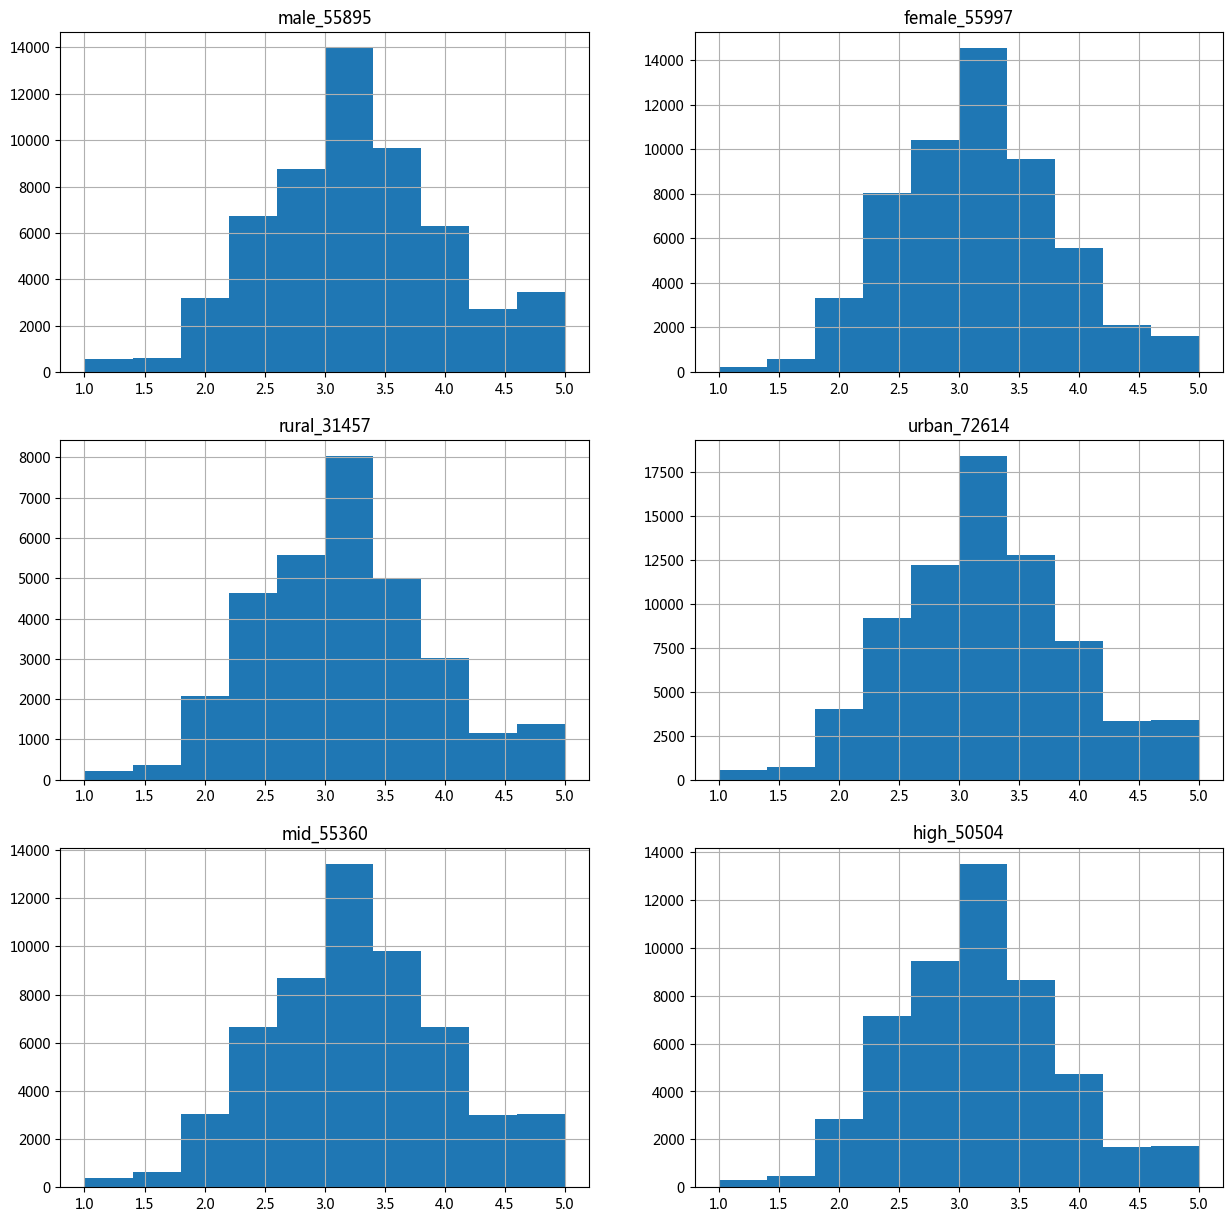

In [135]:
plt.figure(figsize=(15,15))
nums=[i for i in range(20)]
plt.subplot(3,2,1)
male_data['CPS'].hist()
plt.title('male_'+str(len(male_data)))


plt.subplot(3,2,2)
female_data['CPS'].hist()
plt.title('female_'+str(len(female_data)))



plt.subplot(3,2,3)
rural_data['CPS'].hist()
plt.title('rural_'+str(len(rural_data)))

plt.subplot(3,2,4)
urban_data['CPS'].hist()
plt.title('urban_'+str(len(urban_data)))

plt.subplot(3,2,5)
mid_data['CPS'].hist()
plt.title('mid_'+str(len(mid_data)))


plt.subplot(3,2,6)
high_data['CPS'].hist()
plt.title('high_'+str(len(high_data)))


plt.show()

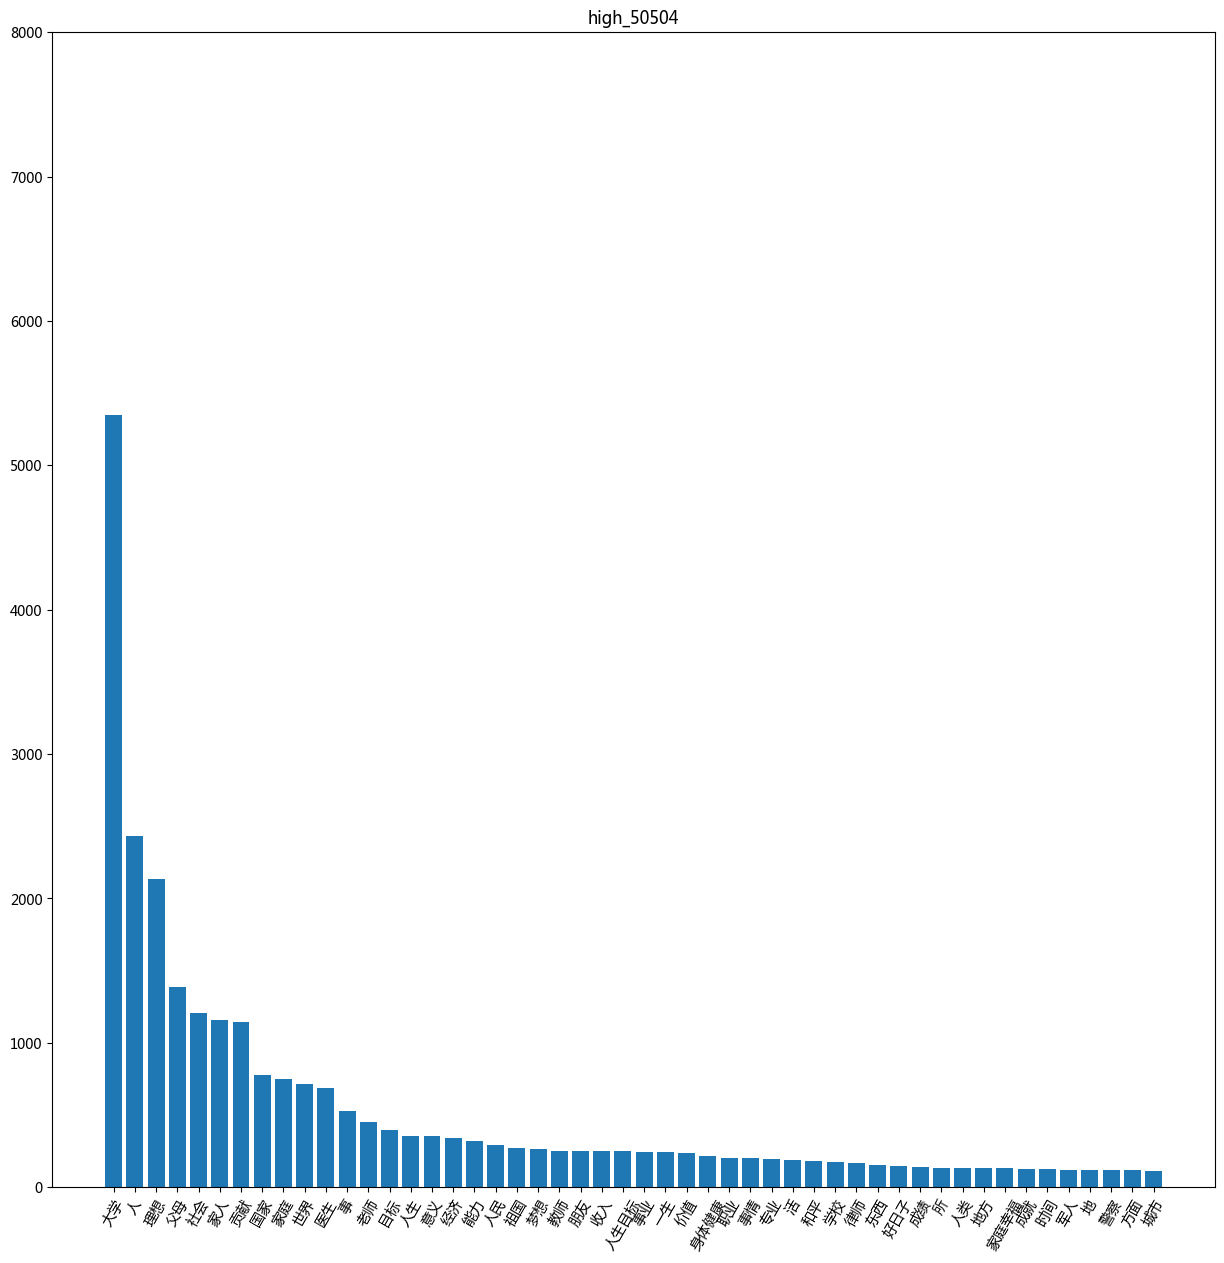

In [127]:
plt.figure(figsize=(15,15))
nums=[i for i in range(50)]
ggg_high=[a[0] for a in names_high_n.value_counts().keys()[0:50].tolist()]
plt.bar(nums,names_high_n.value_counts().values[0:50])
plt.xticks(nums,ggg_high,rotation='60')
plt.title('high_'+str(len(high_data)))
plt.ylim(0,8000)
plt.show()

In [105]:
all_data


问卷发布名称 Sver SchoolID      作答ID  \
0              【3-438】尼尔基一中2021年12月积极教育百城计划学生问卷    3      438  7Ax103zM   
1              【3-438】尼尔基一中2021年12月积极教育百城计划学生问卷    3      438  7Ax10XDM   
2              【3-438】尼尔基一中2021年12月积极教育百城计划学生问卷    3      438  7Ax10koM   
3              【3-438】尼尔基一中2021年12月积极教育百城计划学生问卷    3      438  7Ax10rXM   
4            【2-204】娄底市第三中学2021年12月积极教育百城计划学生问卷    2      204  7Ax10wPM   
...                                         ...  ...      ...       ...   
111887       【2-194】岳阳市第一中学2021年12月积极教育百城计划学生问卷    2      194  eyPzzg9L   
111888    【2-218】安徽省霍邱县第一中学2021年12月积极教育百城计划学生问卷    2      218  eyPzzjEL   
111889    【2-218】安徽省霍邱县第一中学2021年12月积极教育百城计划学生问卷    2      218  eyPzzp8L   
111890    【2-218】安徽省霍邱县第一中学2021年12月积极教育百城计划学生问卷    2      218  eyPzzqnL   
111891  【2-132】湖南省岳阳市弘毅新华中学2021年12月积极教育百城计划学生问卷    2      132  eyPzzzPL   

                       开始时间                 结束时间  作答时长 作答渠道               ip  \
0       2021-12-30 15:33:35  2021-12-30 15:47:00   805    6      1.26.13.188   
1       2021-12-30 15:26:50  2021-12-30 15:38:29   699    6    10.233.27.122   
2       2021-12-30 15:27:29  2021-12-30 15:39:31   722    6    106.40.214.26   
3       2021-12-30 15:40:54  2021-12-30 15:52:06   672    6    116.116.107.0   
4       2021-12-30 15:31:10  2021-12-30 15:47:56  1006    6     58.46.65.171   
...                     ...                  ...   ...  ...              ...   
111887  2022-01-02 15:59:49  2022-01-02 16:18:49  1140    6  223.144.102.247   
111888  2022-01-03 15:59:58  2022-01-03 16:09:10   552    6   60.173.139.116   
111889  2022-01-03 15:54:25  2022-01-03 16:06:00   695    6   60.173.139.116   
111890  2022-01-03 16:06:47  2022-01-03 16:12:03   316    6   60.173.139.116   
111891  2022-01-03 15:49:46  2022-01-03 15:59:43   597    6  124.229.120.157   

                经度  ...  feduyears meduyears onlychild female provinceName  \
0       124.786362  ...        9.0       9.0       1.0    1.0          内蒙古   
1       124.406326  ...        9.0      12.0       0.0    1.0          内蒙古   
2       124.493019  ...        6.0       6.0       1.0    0.0          内蒙古   
3       124.623909  ...        9.0       9.0       1.0    0.0          内蒙古   
4       112.018738  ...       12.0      15.0       0.0    0.0           湖南   
...            ...  ...        ...       ...       ...    ...          ...   
111887  113.080193  ...       18.0      18.0       1.0    1.0           湖南   
111888  116.299072  ...        9.0      12.0       1.0    0.0           安徽   
111889  116.299072  ...        9.0       9.0       0.0    1.0           安徽   
111890  116.299072  ...       16.0      16.0       1.0    0.0           安徽   
111891  113.178024  ...       12.0       9.0       0.0    1.0           湖南   

       province                                            cpstext  \
0          16.0                                                 ..   
1          16.0                        谈不上人生目标，现在高二，只想提高成绩，考一所理想大学   
2          16.0                                       成为一名职业的足球运动员   
3          16.0                                               家庭美满   
4          11.0                                        高考600+,家人长寿   
...         ...                                                ...   
111887     11.0  想考上名校，如复旦，人大等，希望在适合自己的领域有较大的成就，希望自己能为大多数人喜爱，希望...   
111888      1.0                                             考上好的大学   
111889      1.0                                                 高薪   
111890      1.0                                               快快乐乐   
111891     11.0                                          想成为一个有用的人   

                                           purpose_split0  purpose_sentiments  \
0                                                      ..            0.469799   
1                             谈不上人生目标，现在高二，只想提高成绩，考一所理想大学            0.998967   
2                                            成为一名职业的足球运动员            0.258174   
3                                                    家庭美满             0.92995

In [106]:
all_data['jieba_split']

0                                                        []
1            [谈不上, 人生目标, 现在, 高二, 只想, 提高, 成绩, 考, 一所, 理想, 大学]
2                                  [成为, 一名, 职业, 的, 足球, 运动员]
3                                                  [家庭, 美满]
4                                              [高考, 家人, 长寿]
                                ...                        
111887    [想, 考上, 名校, 如, 复旦, 人大, 等, 希望, 在, 适合, 自己, 的, 领域...
111888                                       [考上, 好, 的, 大学]
111889                                                 [高薪]
111890                                               [快快乐乐]
111891                                [想, 成为, 一个, 有用, 的, 人]
Name: jieba_split, Length: 111892, dtype: object

In [ ]:
data.loc[data['_c2'].str.len() > 5].reset_index()

In [107]:
all_data['jieba_split'].str.len()

0          0.0
1         11.0
2          6.0
3          2.0
4          3.0
          ... 
111887    34.0
111888     4.0
111889     1.0
111890     1.0
111891     6.0
Name: jieba_split, Length: 111892, dtype: float64

In [109]:
all_data.loc[all_data['jieba_split'].str.len()<0.1]

问卷发布名称 Sver SchoolID      作答ID  \
0                【3-438】尼尔基一中2021年12月积极教育百城计划学生问卷    3      438  7Ax103zM   
67        【2-213】大连理工大学附属高级中学2021年12月积极教育百城计划学生问卷    2      213  7Ax1JooM   
82               【3-438】尼尔基一中2021年12月积极教育百城计划学生问卷    3      438  7Ax1ONAM   
94             【2-200】建水县第二中学2021年12月积极教育百城计划学生问卷    2      200  7Ax1WVrM   
164     【2-126】河南省三门峡市渑池县韶州中学2021年12月积极教育百城计划学生问卷    2      126  7Ax1pz6M   
...                                           ...  ...      ...       ...   
111814         【2-389】安阳市第八中学2021年12月积极教育百城计划学生问卷    2      389  eyPzpYBL   
111833         【2-128】鹤壁市明志中学2021年12月积极教育百城计划学生问卷    2      128  eyPzqkBL   
111840         【2-128】鹤壁市明志中学2021年12月积极教育百城计划学生问卷    2      128  eyPzrvvL   
111865         【2-215】邹平市第二中学2021年12月积极教育百城计划学生问卷    2      215  eyPzyDnL   
111879      【2-218】安徽省霍邱县第一中学2021年12月积极教育百城计划学生问卷    2      218  eyPzz8EL   

                       开始时间                 结束时间  作答时长 作答渠道              ip  \
0       2021-12-30 15:33:35  2021-12-30 15:47:00   805    6     1.26.13.188   
67      2021-12-30 16:49:50  2021-12-30 17:01:13   683    6   42.84.226.174   
82      2021-12-30 15:08:08  2021-12-30 15:31:25  1397    6     1.27.77.255   
94      2021-12-31 15:30:59  2021-12-31 15:44:58   839    6   106.56.37.135   
164     2021-12-31 10:29:32  2021-12-31 10:41:44   732    6   125.46.45.126   
...                     ...                  ...   ...  ...             ...   
111814  2022-01-03 21:38:09  2022-01-03 21:46:38   509    6    115.48.9.239   
111833  2022-01-04 17:06:52  2022-01-04 17:29:17  1345    6  39.164.225.171   
111840  2022-01-04 14:57:24  2022-01-04 15:11:24   840    6  39.164.225.171   
111865  2022-01-03 17:54:24  2022-01-03 17:59:55   331    6  218.57.236.160   
111879  2022-01-03 16:04:51  2022-01-03 16:13:34   523    6  60.173.139.116   

                经度  ...  feduyears meduyears onlychild female provinceName  \
0       124.786362  ...        9.0       9.0       1.0    1.0          内蒙古   
67      123.429253  ...       18.0      18.0       1.0    0.0           辽宁   
82      124.489792  ...       12.0       9.0       1.0    0.0          内蒙古   
94      102.821167  ...        NaN       9.0       0.0    0.0           云南   
164     111.787552  ...       12.0       9.0       0.0    0.0           河南   
...            ...  ...        ...       ...       ...    ...          ...   
111814  114.387360  ...        9.0       9.0       0.0    0.0           河南   
111833  114.253540  ...        NaN       NaN       0.0    0.0           河南   
111840  114.253540  ...        9.0       9.0       0.0    0.0           河南   
111865  117.756607  ...        9.0       9.0       0.0    0.0           山东   
111879  116.299072  ...       15.0       9.0       0.0    0.0           安徽   

       province          cpstext   purpose_split0  purpose_sentiments  \
0          16.0               ..               ..            0.469799   
67         15.0              。。。              。。。            0.484352   
82         16.0       have money        havemoney                 0.5   
94         23.0  ddffffffffdffff  ddffffffffdffff                 0.5   
164         9.0      DANGYISHENG      DANGYISHENG                 0.5   
...         ...              ...              ...                 ...   
111814      9.0     l don’t know       ldon’tknow                 0.5   
111833      9.0              ...              ...            0.423503   
111840      9.0       konodioda！       konodioda！                 0.5   
111865     18.0          66677yi          66677yi                 0.5   
111879      1.0              985              985                 0.5   

       jieba_split  
0               []  
67              []  
82              []  
94              []  
164             []  
...            ...  
111814          []  
111833          []  
111840          []  
111865          []  
111879          []  

[1781 rows x 192 columns]

In [62]:
all_data['gender'].value_counts()

0    55997
1    55895
Name: gender, dtype: int64

In [48]:
df, meta=pyreadstat.read_dta('final.dta',encoding='utf-8')

In [52]:
cps_series=df[['cps1',
 'cps2',
 'cps3',
 'cps4',
 'cps5',
 'cps6',
 'cps7',
 'cps8',
 'cps9',
 'cps10',
 'cps11',
 'cps12']]

In [84]:
import scipy.stats
a4=scipy.stats.chi2_contingency(cps_series, correction = False)

In [94]:
np.zeros([12,12])

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [98]:
kafang=np.zeros([12,12])
for i in range(12):
    for j in range(12):
        kafang[i][j]=scipy.stats.chi2_contingency(cps_series[[list(cps_series)[i],list(cps_series)[j]]].values, correction = False)[1]

In [99]:
kafang

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [106]:
scipy.stats.chi2_contingency(a1[['cps1_1','cps1_2']].values, correction = False)[1]

ValueError: The internally computed table of expected frequencies has a zero element at (0, 0).

In [105]:
kafang=np.zeros([60,60])
for i in range(60):
    for j in range(60):
        kafang[i][j]=scipy.stats.chi2_contingency(a1[[list(a1)[i],list(a1)[j]]].values, correction = False)[1]

ValueError: The internally computed table of expected frequencies has a zero element at (0, 0).

In [86]:
sns.heatmap(a4[3],cmap="YlGnBu")
plt.show()

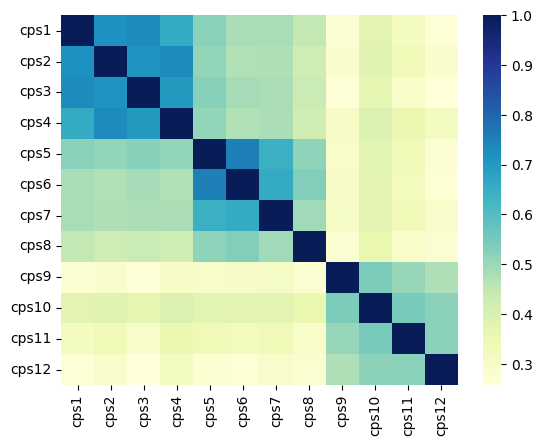

In [116]:
sns.heatmap(cps_series.corr(method='spearman'),cmap="YlGnBu")
plt.show()

In [115]:
sns.heatmap(cps_series.corr(method='kendall'),cmap="YlGnBu")
plt.show()

In [113]:
sns.heatmap(cps_series.corr(),cmap="YlGnBu")
plt.show()

In [67]:
a0=cps_series
for i in list(cps_series):    
    a0=preprocessing(a0,i)
    

In [69]:
list(cps_series)

['cps1',
 'cps2',
 'cps3',
 'cps4',
 'cps5',
 'cps6',
 'cps7',
 'cps8',
 'cps9',
 'cps10',
 'cps11',
 'cps12']

In [71]:
a1=a0[['cps1_1',
 'cps1_2',
 'cps1_3',
 'cps1_4',
 'cps1_5',
 'cps2_1',
 'cps2_2',
 'cps2_3',
 'cps2_4',
 'cps2_5',
 'cps3_1',
 'cps3_2',
 'cps3_3',
 'cps3_4',
 'cps3_5',
 'cps4_1',
 'cps4_2',
 'cps4_3',
 'cps4_4',
 'cps4_5',
 'cps5_1',
 'cps5_2',
 'cps5_3',
 'cps5_4',
 'cps5_5',
 'cps6_1',
 'cps6_2',
 'cps6_3',
 'cps6_4',
 'cps6_5',
 'cps7_1',
 'cps7_2',
 'cps7_3',
 'cps7_4',
 'cps7_5',
 'cps8_1',
 'cps8_2',
 'cps8_3',
 'cps8_4',
 'cps8_5',
 'cps9_1',
 'cps9_2',
 'cps9_3',
 'cps9_4',
 'cps9_5',
 'cps10_1',
 'cps10_2',
 'cps10_3',
 'cps10_4',
 'cps10_5',
 'cps11_1',
 'cps11_2',
 'cps11_3',
 'cps11_4',
 'cps11_5',
 'cps12_1',
 'cps12_2',
 'cps12_3',
 'cps12_4',
 'cps12_5']]

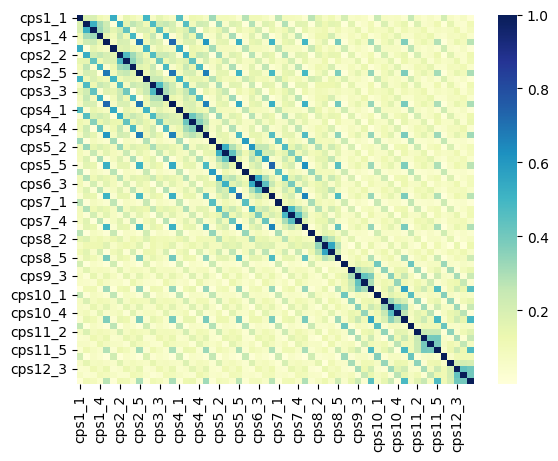

In [74]:
sns.heatmap(a1.corr().abs(),cmap="YlGnBu")
plt.show()

In [79]:
sns.heatmap(a1[list(a1)[0:5]].corr().abs(),cmap="YlGnBu")
plt.show()

In [80]:
def get_entropy(data_df,columns = None):
    if (columns is None) and (data_df.shape[1] > 1) :
        raise "the dim of data_df more than 1, the columns must be not empty!"    
    # 信息值
    pe_value_array = data_df[columns].unique()
    ent = 0.0
    for x_value in pe_value_array:
        p = float(data_df[data_df[columns] == x_value].shape[0]) / data_df.shape[0]
        logp = np.log2(p)
        ent -= p * logp
    
    return ent

In [82]:
get_entropy(a1,columns = 'cps1_1')

0.34694759822531085

In [77]:
len(list(a1))

60

In [38]:
data=pd.read_stata('final.dta',iterator =True)


In [39]:
data.tail()

AttributeError: 'StataReader' object has no attribute 'tail'

In [34]:
data.to_csv('data_allll.csv')

AttributeError: 'StataReader' object has no attribute 'to_csv'

In [20]:
all_data=pd.read_csv('final.dta',encoding= 'unicode_escape')

ParserError: Error tokenizing data. C error: Buffer overflow caught - possible malformed input file.


In [3]:
all_data=pd.read_excel('data_purpose.xlsx')

###deal with space and tab

In [ ]:
result = []
sentiments = []
for num in range(len(all_data)) :
    seg = ''.join(all_data['purpose'][num].split())
    if (seg != '' and seg != "\n" and seg != "\n\n") :
        result.append(seg)
        s0=SnowNLP(seg)
        sentiments.append(s0.sentiments)  
all_data['purpose_split0']=result
all_data['purpose_sentiments']=sentiments

all_data['jieba_split']=[delete_non_chinese(jieba.lcut(all_data['purpose'][i])) for i in range(len(all_data))]

In [24]:
s=SnowNLP(all_data['purpose'][2])

In [27]:
all_data['purpose'][2]

'1.我想当一名中医，最好是军医，给人们带来希望； 2.永远陪伴家人； 3.人们需要我； 4.教弟弟做人； 5.抚养孩子们成长； 6.有志趣相投，真心待我的朋友； 7.幸福美满，心想事成。'

In [25]:
print(s.words)        # 分词
print(list(s.tags))   # 词性标注
print(s.sentiments)   # 情感分数
print(s.pinyin) 

['1.', '我', '想', '当', '一', '名', '中医', '，', '最好', '是', '军医', '，', '给', '人们', '带来', '希望', '；', '2.', '永远', '陪伴', '家人', '；', '3.', '人们', '需要', '我', '；', '4.', '教', '弟弟', '做人', '；', '5.', '抚养', '孩子', '们', '成长', '；', '6.', '有', '志趣', '相', '投', '，', '真心', '待', '我', '的', '朋友', '；', '7.', '幸福', '美满', '，', '心想', '事', '成', '。']
[('1.', 'p'), ('我', 'r'), ('想', 'v'), ('当', 'p'), ('一', 'm'), ('名', 'q'), ('中医', 'n'), ('，', 'w'), ('最好', 'd'), ('是', 'v'), ('军医', 'n'), ('，', 'w'), ('给', 'p'), ('人们', 'n'), ('带来', 'v'), ('希望', 'v'), ('；', 'w'), ('2.', 'r'), ('永远', 'd'), ('陪伴', 'v'), ('家人', 'n'), ('；', 'w'), ('3.', 'Mg'), ('人们', 'n'), ('需要', 'v'), ('我', 'r'), ('；', 'w'), ('4.', 'ad'), ('教', 'v'), ('弟弟', 'n'), ('做人', 'v'), ('；', 'w'), ('5.', 'ad'), ('抚养', 'v'), ('孩子', 'n'), ('们', 'k'), ('成长', 'v'), ('；', 'w'), ('6.', 'ad'), ('有', 'v'), ('志趣', 'n'), ('相', 'd'), ('投', 'v'), ('，', 'w'), ('真心', 'd'), ('待', 'v'), ('我', 'r'), ('的', 'u'), ('朋友', 'n'), ('；', 'w'), ('7.', 'Bg'), ('幸福', 'a'), ('美满', 'a'), ('，', 'w')

In [118]:
all_data

问卷发布名称  Sver  SchoolID      作答ID  \
0         【2-117】福建省福州屏东中学2021年12月积极教育百城计划学生问卷     2       117  7Ax11BzM   
1         【2-117】福建省福州屏东中学2021年12月积极教育百城计划学生问卷     2       117  7Ax11zDM   
2         【2-117】福建省福州屏东中学2021年12月积极教育百城计划学生问卷     2       117  7Ax1gXPM   
3         【2-117】福建省福州屏东中学2021年12月积极教育百城计划学生问卷     2       117  7Ax1gaPM   
4     【2-118】甘肃省陇南市武都区滨江学校2021年12月积极教育百城计划学生问卷     2       118  7Ax1m8PM   
...                                        ...   ...       ...       ...   
2802  【2-118】甘肃省陇南市武都区滨江学校2021年12月积极教育百城计划学生问卷     2       118  eyPzNvPL   
2803  【2-118】甘肃省陇南市武都区滨江学校2021年12月积极教育百城计划学生问卷     2       118  eyPzPZbL   
2804  【2-118】甘肃省陇南市武都区滨江学校2021年12月积极教育百城计划学生问卷     2       118  eyPzYEbL   
2805  【2-118】甘肃省陇南市武都区滨江学校2021年12月积极教育百城计划学生问卷     2       118  eyPzgDEL   
2806  【2-118】甘肃省陇南市武都区滨江学校2021年12月积极教育百城计划学生问卷     2       118  eyPzzQ8L   

      用户ID  用户名                 开始时间                 结束时间  作答时长  作答渠道  ... NA  \
0      NaN  NaN  2021-12-30 10:28:03  2021-12-30 10:37:17   554     6  ...  2   
1      NaN  NaN  2021-12-30 10:17:58  2021-12-30 10:39:24  1286     6  ...  0   
2      NaN  NaN  2021-12-30 11:15:47  2021-12-30 11:40:55  1508     6  ...  0   
3      NaN  NaN  2021-12-30 11:33:58  2021-12-30 11:51:34  1056     6  ...  3   
4      NaN  NaN  2021-12-31 13:26:58  2021-12-31 13:40:11   793     6  ...  5   
...    ...  ...                  ...                  ...   ...   ...  ... ..   
2802   NaN  NaN  2022-01-03 18:57:26  2022-01-03 19:02:57   331     6  ...  5   
2803   NaN  NaN  2022-01-03 11:18:50  2022-01-03 11:25:27   397     6  ...  3   
2804   NaN  NaN  2022-01-04 19:05:51  2022-01-04 19:21:53   962     6  ...  1   
2805   NaN  NaN  2022-01-03 16:52:01  2022-01-03 17:09:19  1038     6  ...  1   
2806   NaN  NaN  2022-01-03 16:21:13  2022-01-03 16:27:41   388     6  ...  4   

      DEP  DSH urban level  scid  \
0       2    0     1   1.0  2117   
1       1    0     1   1.0  2117   
2       1    0     1   1.0  2117   
3       1    0     1   1.0  2117   
4       2    0     1   1.0  2118   
...   ...  ...   ...   ...   ...   
2802    6    1     1   1.0  2118   
2803    2    0     1   1.0  2118   
2804    1    0     1   1.0  2118   
2805    2    0     1   1.0  2118   
2806    2    0     1   1.0  2118   

                                                purpose  \
0                                                  快乐生活   
1        希望能够上一所好的高中和好的大学，理科学习方面能够有所提高，希望能结交很多能够谈心的朋友吧~   
2     1.我想当一名中医，最好是军医，给人们带来希望； 2.永远陪伴家人； 3.人们需要我； 4....   
3               改变世界，甚至...。取得化物生，以及基础物理，化学突破。全面发展，延长寿命。   
4                                            医生，军人，考上大学   
...                                                 ...   
2802                                               考个工作   
2803                                                不知道   
2804                                              当一名军人   
2805                                            当一个成功人士   
2806                                             成为一名医生   

                                         purpose_split0 purpose_sentiments  \
0                                                  快乐生活           0.988067   
1        希望能够上一所好的高中和好的大学，理科学习方面能够有所提高，希望能结交很多能够谈心的朋友吧~           0.999461   
2     1.我想当一名中医，最好是军医，给人们带来希望；2.永远陪伴家人；3.人们需要我；4.教弟弟...           0.999997   
3               改变世界，甚至...。取得化物生，以及基础物理，化学突破。全面发展，延长寿命。           0.999869   
4                                            医生，军人，考上大学           0.927678   
...                                                 ...                ...   
2802                                               考个工作           0.873377   
2803                                                不知道           0.369391   
2804                                              当一名军人           0.264771   
2805                                            当一个成功人士           0.726791   
2806                                             成为一名医生           0.528385   

                                            jieba_split  
0                

In [26]:
s.keywords(limit=3)

['想', '中医', '名']

In [29]:
s.summary(limit=6)

['1.我想当一名中医', '最好是军医', '给人们带来希望', '2.永远陪伴家人', '3.人们需要我', '4.教弟弟做人']

In [33]:
items=[]
for i in range(len(all_data)):
    items=items+all_data['jieba_split'][i]
    
items=pd.DataFrame(items)
    
tags=[]
for i in range(len(items)):
    s1=SnowNLP(items[0][i])
    a1,a2=zip(*s1.tags)
    tags.append(a2[0])
    
    
    
items['tags']=tags

names=items[items['tags']=='u']

string=" ".join(names[0].tolist())


w.generate(string)

w.to_file('abcde_u.png')



In [74]:
items=[]
for i in range(len(all_data)):
    items=items+all_data['jieba_split'][i]

In [108]:
tags=[]
for i in range(len(items)):
    s1=SnowNLP(items[0][i])
    a1,a2=zip(*s1.tags)
    tags.append(a2[0])
    
items['tags']=tags

In [124]:
items['tags'].value_counts()

v     4470
n     3332
u     1170
a     1132
m      872
r      690
d      640
vn     448
nr     423
e      298
p      270
f      235
c      177
t      121
an      97
ns      86
q       71
j       68
ad      59
b       58
y       40
i       33
l       32
Ng      26
nt      26
s       25
z       23
Dg      13
Vg      12
nz      11
Ag       9
k        3
Tg       3
Name: tags, dtype: int64

In [125]:
names=items[items['tags']=='u']

In [116]:
names

0 tags
0        快乐    a
6         好    a
10        好    a
59     幸福美满    a
71       全面    a
...     ...  ...
14894    轻松    a
14910    美好    a
14924    活着    a
14947    成功    a
14969  成功人士    a

[1132 rows x 2 columns]

In [126]:
string=" ".join(names[0].tolist())


w.generate(string)

w.to_file('abcde_u.png')

In [76]:
items=pd.DataFrame(items)

In [78]:
items.value_counts()

的       1155
考上       545
好        531
大学       458
一个       344
        ... 
小考         1
小朋友        1
小康家庭       1
小店         1
黑塔         1
Length: 2146, dtype: int64

In [86]:
s1=SnowNLP('小康家庭 ')

In [92]:
a,b=zip(*s1.tags)

In [93]:
b

('n', 'n')

In [54]:
a1, a2 = zip(*s.tags) 

In [70]:
a1=np.array(a1)
a2=np.array(a2)

AttributeError: 'list' object has no attribute 'shape'

In [71]:
a1[a2=='n']

array(['中医', '军医', '人们', '家人', '人们', '弟弟', '孩子', '志趣', '朋友', '事'],
      dtype='<U2')

In [72]:
a1

array(['1.', '我', '想', '当', '一', '名', '中医', '，', '最好', '是', '军医', '，',
       '给', '人们', '带来', '希望', '；', '2.', '永远', '陪伴', '家人', '；', '3.',
       '人们', '需要', '我', '；', '4.', '教', '弟弟', '做人', '；', '5.', '抚养', '孩子',
       '们', '成长', '；', '6.', '有', '志趣', '相', '投', '，', '真心', '待', '我',
       '的', '朋友', '；', '7.', '幸福', '美满', '，', '心想', '事', '成', '。'],
      dtype='<U2')

In [36]:
all_data.sort_values(by='purpose_sentiments')

问卷发布名称  Sver  SchoolID      作答ID  \
1840      【2-117】福建省福州屏东中学2021年12月积极教育百城计划学生问卷     2       117  Mo1dJOKL   
2709      【2-117】福建省福州屏东中学2021年12月积极教育百城计划学生问卷     2       117  ev9ZOjVL   
627   【2-118】甘肃省陇南市武都区滨江学校2021年12月积极教育百城计划学生问卷     2       118  L0mK3aVe   
2063      【2-117】福建省福州屏东中学2021年12月积极教育百城计划学生问卷     2       117  e3BdanDL   
369   【2-118】甘肃省陇南市武都区滨江学校2021年12月积极教育百城计划学生问卷     2       118  7aQ6Ew67   
...                                        ...   ...       ...       ...   
1661  【2-118】甘肃省陇南市武都区滨江学校2021年12月积极教育百城计划学生问卷     2       118  MZq6ADve   
1558  【2-118】甘肃省陇南市武都区滨江学校2021年12月积极教育百城计划学生问卷     2       118  MRDEaK8L   
2394  【2-118】甘肃省陇南市武都区滨江学校2021年12月积极教育百城计划学生问卷     2       118  eP2P02X7   
1972  【2-118】甘肃省陇南市武都区滨江学校2021年12月积极教育百城计划学生问卷     2       118  Mx20DgaL   
662       【2-117】福建省福州屏东中学2021年12月积极教育百城计划学生问卷     2       117  L0mnKBqe   

      用户ID  用户名                 开始时间                 结束时间  作答时长  作答渠道  ... PA  \
1840   NaN  NaN  2021-12-27 16:24:23  2021-12-27 16:42:33  1090     6  ...  4   
2709   NaN  NaN  2021-12-30 11:28:22  2021-12-30 11:34:35   373     6  ...  5   
627    NaN  NaN  2022-01-02 13:57:40  2022-01-02 14:11:52   852     6  ...  4   
2063   NaN  NaN  2021-12-27 15:19:38  2021-12-27 15:37:02  1044     6  ...  5   
369    NaN  NaN  2021-12-31 22:10:22  2021-12-31 22:37:21  1619     6  ...  2   
...    ...  ...                  ...                  ...   ...   ...  ... ..   
1661   NaN  NaN  2021-12-31 22:01:37  2021-12-31 22:12:43   666     6  ...  4   
1558   NaN  NaN  2022-01-01 12:31:28  2022-01-01 12:40:35   547     6  ...  3   
2394   NaN  NaN  2021-12-31 21:04:05  2021-12-31 21:19:43   938     6  ...  5   
1972   NaN  NaN  2021-12-31 20:36:41  2021-12-31 21:02:15  1534     6  ...  5   
662    NaN  NaN  2022-01-13 13:54:28  2022-01-13 14:06:49   741     6  ...  5   

      NA  DEP DSH urban level  scid  \
1840   0    1   0     1   1.0  2117   
2709   5    0   0     1   1.0  2117   
627    3    2   0     1   1.0  2118   
2063   3    2   0     1   1.0  2117   
369    4    5   1     1   1.0  2118   
...   ..  ...  ..   ...   ...   ...   
1661   0    0   0     1   1.0  2118   
1558   3    3   1     1   1.0  2118   
2394   0    0   0     1   1.0  2118   
1972   0    1   0     1   1.0  2118   
662    1    0   0     1   1.0  2117   

                                                purpose  \
1840                                             汽车机械车辆   
2709                                            请问是否如色温   
627                                         不让对我有期望的人失望   
2063                                          成为一个心理咨询师   
369                                      当一名1.2或3级国家运动员   
...                                                 ...   
1661            1.为国家和社会做有意义的贡献.2.做有用的人.3.探索宇宙的奥秘，研究宇宙.   
1558  当一名作者或者医生，先说医生吧，我希望自己可以拯救生命，当作者的话，我认为文字并不只是笔画，...   
2394  我的人生目标是长大做一个对社会有贡献的人，使生命更有色彩，让生活更有价值！ 为了实现我的人生...   
1972  我的人生目标是长大做一个对社会有贡献的人，为生命添加色彩，让生命有价值 为了实现我的人生目标...   
662   在学业和未来的事业上有所成就，过上比较幸福美满的生活，经济独立，做对社会有意义，让家人感到骄...   

                                         purpose_split0  purpose_sentiments  
1840                                             汽车机械车辆            0.020581  
2709                                            请问是否如色温            0.039946  
627                                         不让对我有期望的人失望            0.050405  
2063                                          成为一个心理咨询师            0.074024  
369                                      当一名1.2或3级国家运动员            0.076841  
...                                                 ...                 ...  
1661            1.为国家和社会做有意义的贡献.2.做有用的人.3.探索宇宙的奥秘，研究宇宙.            1.000000  
1558  当一名作者或者医生，先说医生吧，我希望自己可以拯救生命，当作者的话，我认为文字并不只是笔画，...            1.000000  
2394  我的人生目标是长大做一个对社会有贡献的人，使生命更有色彩，让生活更有价值！为了实现我的人生目...            1.000000  
1972  我的人生目标是长大做一个对社会有贡献的人，为生命添加色彩，让生命有价值为了实现我的人生目标，...            1.000000  
662   在学业和未来的事业上有所成就，过上比较幸福美满的生活，经济独立，做对社会有意义，让家人感到骄...            1.000000  

[2807 rows x 187 columns]

In [11]:
corpus=all_data['purpose_split0'].tolist()

In [13]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
X.toarray()           


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [16]:
corpus

['快乐生活',
 '希望能够上一所好的高中和好的大学，理科学习方面能够有所提高，希望能结交很多能够谈心的朋友吧~',
 '1.我想当一名中医，最好是军医，给人们带来希望；2.永远陪伴家人；3.人们需要我；4.教弟弟做人；5.抚养孩子们成长；6.有志趣相投，真心待我的朋友；7.幸福美满，心想事成。',
 '改变世界，甚至...。取得化物生，以及基础物理，化学突破。全面发展，延长寿命。',
 '医生，军人，考上大学',
 '考上理想的高中和大学',
 '每天开心就行',
 '军人',
 '希望自己能够好好学习',
 '当医生',
 '目前暂无',
 '成为一名考古学家',
 '1.上清华2.干一件大事3.为社会做出贡献',
 '上高中，上大学',
 '考上三中，学习变好，家庭和睦',
 '1,成为一个插画师2，希望可以让流浪的小动物有好的结局',
 '演员',
 '考上985211学校',
 '成为父母的骄傲',
 '成为我想成为的人',
 '我的人生目标:考上自己理想的大学，为以后的生活奠定基础',
 '努力学习，当一名特种兵，报效国家',
 '考入名牌大学，不顾服父母的期望',
 '当一名医生',
 '先上一个好高中，在考一个好大学',
 '给爸爸妈妈幸福',
 '杀了历史老师。',
 '考上一中，上个好大学',
 '有个好工作，父母健康，家庭幸福，家人安稳，幸福生活。',
 '考上自己理想的学校',
 '挣钱',
 '贡献力量',
 '暂无',
 '考个好学校报答父母',
 '完成我的梦想',
 '消防员',
 '考上高中……',
 '我想当一名警察',
 '我的人生目标是当一个美术家',
 '我感觉我的人生已经无望了，如果能重来我再也不会把小考当儿戏，再也不会把副科当儿戏，当我小时候爸爸妈妈外出需要一两年才回来一次时，我会倒在地上撒泼......我没有目标，好好学习这',
 '创业',
 '当舞蹈老师',
 '考上大学',
 '考上大学，有一份比较喜欢的工作。',
 '律师',
 '成为一个有用的人',
 '努力考个好的高中，好好珍惜高中三年，高中出来考个好的大学，用自己的努力去改变自己的命运',
 '出人头地',
 '成为受他人尊敬的人',
 '找到好工作，过上心中最好的生活，家庭幸福美满',
 '好好学习',
 '不知道',
 '生命的用意',
 '先上陇

In [14]:
vectorizer.get_feature_names()

/data/wunian2/miniconda3/envs/nlp_env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['0ik7y6uolk7yukyt76yuik76',
 '0yto',
 '12',
 '1三年后',
 '1学有所成',
 '1家庭幸福',
 '1每次考好分数2考个一中3身体健康',
 '1考上一中2考厦大3过自己想要的生活',
 '1考上好大学2和喜欢的人在一起3有个好工作4有房有车5为社会做出贡献',
 '1考上福州一三附中',
 '211',
 '2个即可1',
 '2或3级国家运动员',
 '2过上理想中的生活',
 '41',
 '4e',
 '4之间有',
 '4悟透宇宙的奥秘',
 '5589',
 '786389',
 '800米',
 '985大学',
 'akioi',
 'bleem',
 'cnm',
 'csp',
 'd10',
 'daydayup',
 'der4etr4',
 'explorethereasonwhytheuniversebornandwhyourthoghtsarebeingpossibleinnowadays',
 'forgreatergood2',
 'forthegreatergood成为作家帕洛斯',
 'goodgoodstudy',
 'h5poky',
 'hik5yohik',
 'hk56',
 'hokght5o',
 'idon',
 'idontgivefuck',
 'ipuo7p',
 'jonyt',
 'jyop54ujyh',
 'kjkj',
 'kpl',
 'lfj',
 'livealiveiwillremember',
 'lj',
 'lny0',
 'men',
 'nba扣篮大赛冠军',
 'nba球员',
 'nicai',
 'no',
 'o56iujh54',
 'ogl',
 'ohip',
 'ohkip5okhp56',
 'oippi',
 'oiujy54p0',
 'oty',
 'piup8',
 'qhcydhxych',
 'qwertyuiopasdfghjklzxcvbnm',
 'rtqw',
 'rwhyser',
 'siio',
 's取得一等奖noip取得一等奖考进清华北大成为世界顶尖网络安全工程师',
 'teacher',
 'thelaws',
 'tknow',
 'tly奶茶店老板花店老板火锅店老板文具店老

In [131]:
all_data['PA'].value_counts()

5    1062
4     638
3     443
2     309
1     209
0     146
Name: PA, dtype: int64

In [133]:
pd.get_dummies(all_data['PA'])

0  1  2  3  4  5
0     0  0  0  0  1  0
1     0  0  0  0  0  1
2     0  0  0  0  1  0
3     0  0  0  1  0  0
4     0  0  0  1  0  0
...  .. .. .. .. .. ..
2802  1  0  0  0  0  0
2803  0  1  0  0  0  0
2804  0  0  0  0  1  0
2805  0  0  0  0  0  1
2806  0  1  0  0  0  0

[2807 rows x 6 columns]

In [130]:
col_list=list(all_data)

In [131]:
all_data

问卷发布名称  Sver  SchoolID      作答ID  \
0         【2-117】福建省福州屏东中学2021年12月积极教育百城计划学生问卷     2       117  7Ax11BzM   
1         【2-117】福建省福州屏东中学2021年12月积极教育百城计划学生问卷     2       117  7Ax11zDM   
2         【2-117】福建省福州屏东中学2021年12月积极教育百城计划学生问卷     2       117  7Ax1gXPM   
3         【2-117】福建省福州屏东中学2021年12月积极教育百城计划学生问卷     2       117  7Ax1gaPM   
4     【2-118】甘肃省陇南市武都区滨江学校2021年12月积极教育百城计划学生问卷     2       118  7Ax1m8PM   
...                                        ...   ...       ...       ...   
2802  【2-118】甘肃省陇南市武都区滨江学校2021年12月积极教育百城计划学生问卷     2       118  eyPzNvPL   
2803  【2-118】甘肃省陇南市武都区滨江学校2021年12月积极教育百城计划学生问卷     2       118  eyPzPZbL   
2804  【2-118】甘肃省陇南市武都区滨江学校2021年12月积极教育百城计划学生问卷     2       118  eyPzYEbL   
2805  【2-118】甘肃省陇南市武都区滨江学校2021年12月积极教育百城计划学生问卷     2       118  eyPzgDEL   
2806  【2-118】甘肃省陇南市武都区滨江学校2021年12月积极教育百城计划学生问卷     2       118  eyPzzQ8L   

      用户ID  用户名                 开始时间                 结束时间  作答时长  作答渠道  ... NA  \
0      NaN  NaN  2021-12-30 10:28:03  2021-12-30 10:37:17   554     6  ...  2   
1      NaN  NaN  2021-12-30 10:17:58  2021-12-30 10:39:24  1286     6  ...  0   
2      NaN  NaN  2021-12-30 11:15:47  2021-12-30 11:40:55  1508     6  ...  0   
3      NaN  NaN  2021-12-30 11:33:58  2021-12-30 11:51:34  1056     6  ...  3   
4      NaN  NaN  2021-12-31 13:26:58  2021-12-31 13:40:11   793     6  ...  5   
...    ...  ...                  ...                  ...   ...   ...  ... ..   
2802   NaN  NaN  2022-01-03 18:57:26  2022-01-03 19:02:57   331     6  ...  5   
2803   NaN  NaN  2022-01-03 11:18:50  2022-01-03 11:25:27   397     6  ...  3   
2804   NaN  NaN  2022-01-04 19:05:51  2022-01-04 19:21:53   962     6  ...  1   
2805   NaN  NaN  2022-01-03 16:52:01  2022-01-03 17:09:19  1038     6  ...  1   
2806   NaN  NaN  2022-01-03 16:21:13  2022-01-03 16:27:41   388     6  ...  4   

      DEP  DSH urban level  scid  \
0       2    0     1   1.0  2117   
1       1    0     1   1.0  2117   
2       1    0     1   1.0  2117   
3       1    0     1   1.0  2117   
4       2    0     1   1.0  2118   
...   ...  ...   ...   ...   ...   
2802    6    1     1   1.0  2118   
2803    2    0     1   1.0  2118   
2804    1    0     1   1.0  2118   
2805    2    0     1   1.0  2118   
2806    2    0     1   1.0  2118   

                                                purpose  \
0                                                  快乐生活   
1        希望能够上一所好的高中和好的大学，理科学习方面能够有所提高，希望能结交很多能够谈心的朋友吧~   
2     1.我想当一名中医，最好是军医，给人们带来希望； 2.永远陪伴家人； 3.人们需要我； 4....   
3               改变世界，甚至...。取得化物生，以及基础物理，化学突破。全面发展，延长寿命。   
4                                            医生，军人，考上大学   
...                                                 ...   
2802                                               考个工作   
2803                                                不知道   
2804                                              当一名军人   
2805                                            当一个成功人士   
2806                                             成为一名医生   

                                         purpose_split0 purpose_sentiments  \
0                                                  快乐生活           0.988067   
1        希望能够上一所好的高中和好的大学，理科学习方面能够有所提高，希望能结交很多能够谈心的朋友吧~           0.999461   
2     1.我想当一名中医，最好是军医，给人们带来希望；2.永远陪伴家人；3.人们需要我；4.教弟弟...           0.999997   
3               改变世界，甚至...。取得化物生，以及基础物理，化学突破。全面发展，延长寿命。           0.999869   
4                                            医生，军人，考上大学           0.927678   
...                                                 ...                ...   
2802                                               考个工作           0.873377   
2803                                                不知道           0.369391   
2804                                              当一名军人           0.264771   
2805                                            当一个成功人士           0.726791   
2806                                             成为一名医生           0.528385   

                                            jieba_split  
0                

In [ ]:
'作答ID',
'开始时间',
'结束时间',

'ip',
'经度',
'纬度', 
 '随机元素',
     'sid',
        '备注',

In [ ]:
'作答时长',
'height',
'weight',
 'pinm',
 'SWLS',
 'PMWB',
 'MLQ_S',
 'MLQ_P',
 'purpose'

In [132]:
sel_one_hot=['问卷发布名称',
 'Sver',
 'SchoolID',
 '作答渠道',
 '省份',
 '城市',
 '设备类型',
 '操作系统类型',
 '浏览器类型',
 '屏幕分辨率',
 'grade',
 'class',
 'ls1',
 'ls2',
 'ls3',
 'ls4',
 'ls5',
 'Ladder',
 'GLS',
 'pmwb1',
 'pmwb2',
 'pmwb3',
 'pmwb4',
 'pmwbsc',
 'pmwb5',
 'pmwb6',
 'pmwb7',
 'mil1',
 'mil2',
 'mil3',
 'mil4',
 'mil5',
 'mil6',
 'mil7',
 'mil8',
 'mil9',
 'mil10',
 'pil1',
 'pil2',
 'pil3',
 'pil4',
 'cps1',
 'cps2',
 'cps3',
 'cps4',
 'cps5',
 'cps6',
 'cps7',
 'cps8',
 'cps9',
 'cps10',
 'cps11',
 'cps12',
 'pb1',
 'pb2',
 'pb3',
 'pb4',
 'pb5',
 'ecs1',
 'ecs2',
 'ecs3',
 'ecs4',
 'ecs5',
 'ecssc',
 'ecs6',
 'ecs7',
 'gender',
 'age',
 'minzu',
 'siblings',
 'bo',
 'care1',
 'care2',
 'care3',
 'care4',
 'care5',
 'care6',
 'care7',
 'care0',
 'care8',
 'fedu',
 'medu',
 'computer',
 'car',
 'sfsc',
 'sssc',
 'pa1',
 'pa2',
 'pa3',
 'pa4',
 'pa5',
 'na1',
 'na2',
 'na3',
 'na4',
 'na5',
 'myopia',
 'chat',
 'ec1',
 'ec2',
 'ec3',
 'ec4',
 'ec5',
 'ec6',
 'ec7',
 'ecf',
 'sleep',
 'rise',
 'sport',
 'screen',
 'game',
 'video',
 'book',
 'eat1',
 'eat2',
 'eat3',
 'eat4',
 'eat5',
 'eat6',
 'eat7',
 'eat8',
 'eat9',
 'bl1',
 'bl2',
 'bl3',
 'friends',
 'history',
 'modern',
 'smoke',
 'shs',
 'drink',
 'hos1',
 'hos2',
 'd1',
 'd2',
 '问卷种类',
 '编号',
 '学校名称',
 '小学',
 '初中',
 '高中',
 '中职',
 '测量学段',
 '学校所在地',
 'sRegion',
 'schoolType',
 '学校级别主要荣誉',
 'valid',
 '实际学段',
 'validsc',
 'Study',
 'PIL',
 'CPS',
 'CPS_MN',
 'CPS_GO',
 'CPS_BS',
 'PB',
 'Empathy',
 'PA',
 'NA',
 'DEP',
 'DSH',
 'urban',
 'level',
 'scid',]

In [144]:
all_data

问卷发布名称  Sver  SchoolID      作答ID  \
0         【2-117】福建省福州屏东中学2021年12月积极教育百城计划学生问卷     2       117  7Ax11BzM   
1         【2-117】福建省福州屏东中学2021年12月积极教育百城计划学生问卷     2       117  7Ax11zDM   
2         【2-117】福建省福州屏东中学2021年12月积极教育百城计划学生问卷     2       117  7Ax1gXPM   
3         【2-117】福建省福州屏东中学2021年12月积极教育百城计划学生问卷     2       117  7Ax1gaPM   
4     【2-118】甘肃省陇南市武都区滨江学校2021年12月积极教育百城计划学生问卷     2       118  7Ax1m8PM   
...                                        ...   ...       ...       ...   
2802  【2-118】甘肃省陇南市武都区滨江学校2021年12月积极教育百城计划学生问卷     2       118  eyPzNvPL   
2803  【2-118】甘肃省陇南市武都区滨江学校2021年12月积极教育百城计划学生问卷     2       118  eyPzPZbL   
2804  【2-118】甘肃省陇南市武都区滨江学校2021年12月积极教育百城计划学生问卷     2       118  eyPzYEbL   
2805  【2-118】甘肃省陇南市武都区滨江学校2021年12月积极教育百城计划学生问卷     2       118  eyPzgDEL   
2806  【2-118】甘肃省陇南市武都区滨江学校2021年12月积极教育百城计划学生问卷     2       118  eyPzzQ8L   

      用户ID  用户名                 开始时间                 结束时间  作答时长  作答渠道  ... NA  \
0      NaN  NaN  2021-12-30 10:28:03  2021-12-30 10:37:17   554     6  ...  2   
1      NaN  NaN  2021-12-30 10:17:58  2021-12-30 10:39:24  1286     6  ...  0   
2      NaN  NaN  2021-12-30 11:15:47  2021-12-30 11:40:55  1508     6  ...  0   
3      NaN  NaN  2021-12-30 11:33:58  2021-12-30 11:51:34  1056     6  ...  3   
4      NaN  NaN  2021-12-31 13:26:58  2021-12-31 13:40:11   793     6  ...  5   
...    ...  ...                  ...                  ...   ...   ...  ... ..   
2802   NaN  NaN  2022-01-03 18:57:26  2022-01-03 19:02:57   331     6  ...  5   
2803   NaN  NaN  2022-01-03 11:18:50  2022-01-03 11:25:27   397     6  ...  3   
2804   NaN  NaN  2022-01-04 19:05:51  2022-01-04 19:21:53   962     6  ...  1   
2805   NaN  NaN  2022-01-03 16:52:01  2022-01-03 17:09:19  1038     6  ...  1   
2806   NaN  NaN  2022-01-03 16:21:13  2022-01-03 16:27:41   388     6  ...  4   

      DEP  DSH urban level  scid  \
0       2    0     1   1.0  2117   
1       1    0     1   1.0  2117   
2       1    0     1   1.0  2117   
3       1    0     1   1.0  2117   
4       2    0     1   1.0  2118   
...   ...  ...   ...   ...   ...   
2802    6    1     1   1.0  2118   
2803    2    0     1   1.0  2118   
2804    1    0     1   1.0  2118   
2805    2    0     1   1.0  2118   
2806    2    0     1   1.0  2118   

                                                purpose  \
0                                                  快乐生活   
1        希望能够上一所好的高中和好的大学，理科学习方面能够有所提高，希望能结交很多能够谈心的朋友吧~   
2     1.我想当一名中医，最好是军医，给人们带来希望； 2.永远陪伴家人； 3.人们需要我； 4....   
3               改变世界，甚至...。取得化物生，以及基础物理，化学突破。全面发展，延长寿命。   
4                                            医生，军人，考上大学   
...                                                 ...   
2802                                               考个工作   
2803                                                不知道   
2804                                              当一名军人   
2805                                            当一个成功人士   
2806                                             成为一名医生   

                                         purpose_split0 purpose_sentiments  \
0                                                  快乐生活           0.988067   
1        希望能够上一所好的高中和好的大学，理科学习方面能够有所提高，希望能结交很多能够谈心的朋友吧~           0.999461   
2     1.我想当一名中医，最好是军医，给人们带来希望；2.永远陪伴家人；3.人们需要我；4.教弟弟...           0.999997   
3               改变世界，甚至...。取得化物生，以及基础物理，化学突破。全面发展，延长寿命。           0.999869   
4                                            医生，军人，考上大学           0.927678   
...                                                 ...                ...   
2802                                               考个工作           0.873377   
2803                                                不知道           0.369391   
2804                                              当一名军人           0.264771   
2805                                            当一个成功人士           0.726791   
2806                                             成为一名医生           0.528385   

                                            jieba_split  
0                

In [63]:
def preprocessing(dfdata,id):
#    dfresult= pd.DataFrame()
    dfresult= dfdata
    #Pclass
    dfPclass = pd.get_dummies(dfdata[id])
    dfPclass.columns = [id+'_' +str(x) for x in dfPclass.columns ]
    dfresult = pd.concat([dfresult,dfPclass],axis = 1)
    return dfresult

In [148]:
abc_data=all_data[[ 
 'cps1',
 'cps2',
 'cps3',
 'cps4',
 'cps5',
 'cps6',
 'cps7',
 'cps8',
 'cps9',
 'cps10',
 'cps11',
 'cps12']]

In [135]:
abc_data=all_data

In [149]:
abc_corr=abc_data.corr()

abc_corr=abc_corr.dropna(axis=1,how='all') 

abc_corr=abc_corr.dropna(axis=0,how='all') 
abc_corr=abc_corr.abs()

In [139]:
import matplotlib.pyplot as plt

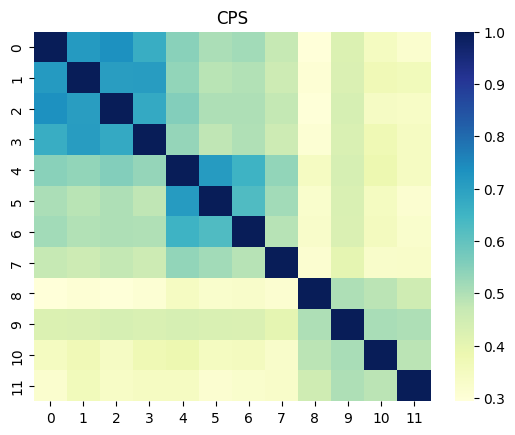

In [151]:
sns.heatmap(abc_corr.values, cmap="YlGnBu")
plt.title('CPS')
plt.show()

In [141]:
abc_corr.values.shape

(139, 139)

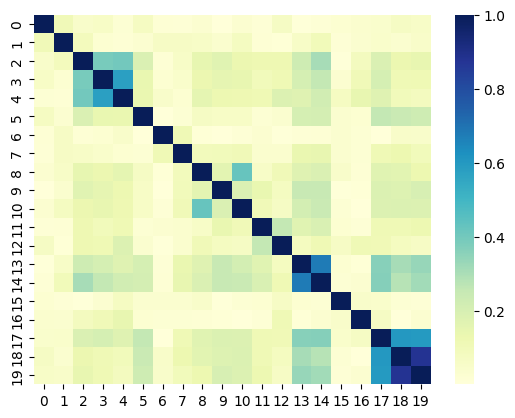

In [145]:
sns.heatmap(abc_corr.values[110:130,110:130], cmap="YlGnBu")
plt.show()

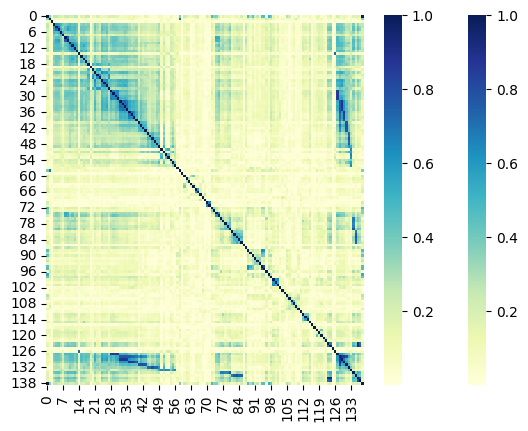

In [140]:
sns.heatmap(abc_corr.values, cmap="YlGnBu")
plt.show()

In [197]:

for id0 in list(all_data[sel_one_hot]):
        abc_data=preprocessing(abc_data,id0)

In [159]:
len(sel_one_hot)

165

In [198]:
ddd_data=abc_data[list(abc_data)[165:]]

问卷发布名称_【2-117】福建省福州屏东中学2021年12月积极教育百城计划学生问卷  \
0                                               1   
1                                               1   
2                                               1   
3                                               1   
4                                               0   
...                                           ...   
2802                                            0   
2803                                            0   
2804                                            0   
2805                                            0   
2806                                            0   

      问卷发布名称_【2-118】甘肃省陇南市武都区滨江学校2021年12月积极教育百城计划学生问卷  Sver_2  SchoolID_117  \
0                                                   0       1             1   
1                                                   0       1             1   
2                                                   0       1             1   
3                                                   0       1             1   
4                                                   1       1             0   
...                                               ...     ...           ...   
2802                                                1       1             0   
2803                                                1       1             0   
2804                                                1       1             0   
2805                                                1       1             0   
2806                                                1       1             0   

      SchoolID_118  作答渠道_6  省份_四川省  省份_安徽省  省份_广西壮族自治区  省份_浙江省  ...  DEP_3  \
0                0       1       0       0           0       0  ...      0   
1                0       1       0       0           0       0  ...      0   
2                0       1       0       0           0       0  ...      0   
3                0       1       0       0           0       0  ...      0   
4                1       1       0       0           0       0  ...      0   
...            ...     ...     ...     ...         ...     ...  ...    ...   
2802             1       1       0       0           0       0  ...      0   
2803             1       1       0       0           0       0  ...      0   
2804             1       1       0       0           0       0  ...      0   
2805             1       1       0       0           0       0  ...      0   
2806             1       1       0       0           0       0  ...      0   

      DEP_4  DEP_5  DEP_6  DSH_0  DSH_1  urban_1  level_1.0  scid_2117  \
0         0      0      0      1      0        1          1          1   
1         0      0      0      1      0        1          1          1   
2         0      0      0      1      0        1          1          1   
3         0      0      0      1      0        1          1          1   
4         0      0      0      1      0        1          1          0   
...     ...    ...    ...    ...    ...      ...        ...        ...   
2802      0      0      1      0      1        1          1          0   
2803      0      0      0      1      0        1          1          0   
2804      0      0      0      1      0        1          1          0   
2805      0      0      0      1      0        1          1          0   
2806      0      0      0      1      0        1          1          0   

      scid_2118  
0             0  
1             0  
2             0  
3             0  
4             1  
...         ...  
2802          1  
2803          1  
2804          1  
2805          1  
2806          1  

[2807 rows x 1034 columns]

In [233]:
correla=ddd_data.corr()

In [234]:
correla

问卷发布名称_【2-117】福建省福州屏东中学2021年12月积极教育百城计划学生问卷  \
问卷发布名称_【2-117】福建省福州屏东中学2021年12月积极教育百城计划学生问卷                                         1.000000   
问卷发布名称_【2-118】甘肃省陇南市武都区滨江学校2021年12月积极教育百城计划学生问卷                                    -1.000000   
Sver_2                                                                                   NaN   
SchoolID_117                                                                        1.000000   
SchoolID_118                                                                       -1.000000   
...                                                                                      ...   
DSH_1                                                                              -0.136746   
urban_1                                                                                  NaN   
level_1.0                                                                           0.010802   
scid_2117                                                                           1.000000   
scid_2118                                                                          -1.000000   

                                                 问卷发布名称_【2-118】甘肃省陇南市武都区滨江学校2021年12月积极教育百城计划学生问卷  \
问卷发布名称_【2-117】福建省福州屏东中学2021年12月积极教育百城计划学生问卷                                            -1.000000   
问卷发布名称_【2-118】甘肃省陇南市武都区滨江学校2021年12月积极教育百城计划学生问卷                                         1.000000   
Sver_2                                                                                       NaN   
SchoolID_117                                                                           -1.000000   
SchoolID_118                                                                            1.000000   
...                                                                                          ...   
DSH_1                                                                                   0.136746   
urban_1                                                                                      NaN   
level_1.0                                                                              -0.010802   
scid_2117                                                                              -1.000000   
scid_2118                                                                               1.000000   

                                                 Sver_2  SchoolID_117  \
问卷发布名称_【2-117】福建省福州屏东中学2021年12月积极教育百城计划学生问卷         NaN      1.000000   
问卷发布名称_【2-118】甘肃省陇南市武都区滨江学校2021年12月积极教育百城计划学生问卷     NaN     -1.000000   
Sver_2                                              NaN           NaN   
SchoolID_117                                        NaN      1.000000   
SchoolID_118                                        NaN     -1.000000   
...                                                 ...           ...   
DSH_1                                               NaN     -0.136746   
urban_1                                             NaN           NaN   
level_1.0                                           NaN      0.010802   
scid_2117                                           NaN      1.000000   
scid_2118                                           NaN     -1.000000   

                                                 SchoolID_118  作答渠道_6  \
问卷发布名称_【2-117】福建省福州屏东中学2021年12月积极教育百城计划学生问卷         -1.000000     NaN   
问卷发布名称_【2-118】甘肃省陇南市武都区滨江学校2021年12月积极教育百城计划学生问卷      1.000000     NaN   
Sver_2                                                    NaN     NaN   
SchoolID_117                                        -1.000000     NaN   
SchoolID_118                                         1.000000     NaN   
...                                                       ...     ...   
DSH_1                                                0.136746     NaN   
urban_1                                                   NaN     NaN   
level_1.0                                           -0.010802     NaN   
scid_2117                                           -1.000000     NaN   
scid_2118      

In [235]:
correla=correla.dropna(axis=1,how='all') 

correla=correla.dropna(axis=0,how='all') 

In [238]:
correla.abs()

问卷发布名称_【2-117】福建省福州屏东中学2021年12月积极教育百城计划学生问卷  \
问卷发布名称_【2-117】福建省福州屏东中学2021年12月积极教育百城计划学生问卷                                         1.000000   
问卷发布名称_【2-118】甘肃省陇南市武都区滨江学校2021年12月积极教育百城计划学生问卷                                     1.000000   
SchoolID_117                                                                        1.000000   
SchoolID_118                                                                        1.000000   
省份_四川省                                                                              0.036607   
...                                                                                      ...   
DSH_0                                                                               0.136746   
DSH_1                                                                               0.136746   
level_1.0                                                                           0.010802   
scid_2117                                                                           1.000000   
scid_2118                                                                           1.000000   

                                                 问卷发布名称_【2-118】甘肃省陇南市武都区滨江学校2021年12月积极教育百城计划学生问卷  \
问卷发布名称_【2-117】福建省福州屏东中学2021年12月积极教育百城计划学生问卷                                             1.000000   
问卷发布名称_【2-118】甘肃省陇南市武都区滨江学校2021年12月积极教育百城计划学生问卷                                         1.000000   
SchoolID_117                                                                            1.000000   
SchoolID_118                                                                            1.000000   
省份_四川省                                                                                  0.036607   
...                                                                                          ...   
DSH_0                                                                                   0.136746   
DSH_1                                                                                   0.136746   
level_1.0                                                                               0.010802   
scid_2117                                                                               1.000000   
scid_2118                                                                               1.000000   

                                                 SchoolID_117  SchoolID_118  \
问卷发布名称_【2-117】福建省福州屏东中学2021年12月积极教育百城计划学生问卷          1.000000      1.000000   
问卷发布名称_【2-118】甘肃省陇南市武都区滨江学校2021年12月积极教育百城计划学生问卷      1.000000      1.000000   
SchoolID_117                                         1.000000      1.000000   
SchoolID_118                                         1.000000      1.000000   
省份_四川省                                               0.036607      0.036607   
...                                                       ...           ...   
DSH_0                                                0.136746      0.136746   
DSH_1                                                0.136746      0.136746   
level_1.0                                            0.010802      0.010802   
scid_2117                                            1.000000      1.000000   
scid_2118                                            1.000000      1.000000   

                                                   省份_四川省    省份_安徽省  \
问卷发布名称_【2-117】福建省福州屏东中学2021年12月积极教育百城计划学生问卷      0.036607  0.012926   
问卷发布名称_【2-118】甘肃省陇南市武都区滨江学校2021年12月积极教育百城计划学生问卷  0.036607  0.012926   
SchoolID_117                                     0.036607  0.012926   
SchoolID_118                                     0.036607  0.012926   
省份_四川省                                           1.000000  0.001009   
...                                                   ...       ...   
DSH_0                                            0.029348  0.010363   
DSH_1                                            0.029348  0.010363   
level_1.0                                        0.002258  0.000797   
scid_2117                           

In [185]:
import seaborn as sns

In [223]:
correla[(correla>-0.5) & (correla<0.5)]=0

In [204]:
correla[correla<=-1]=0

In [213]:
correla[-20:][-20:]

问卷发布名称_【2-117】福建省福州屏东中学2021年12月积极教育百城计划学生问卷  \
PA_4                                         -0.048599   
PA_5                                          0.187531   
NA_0                                          0.139839   
NA_1                                          0.062995   
NA_2                                         -0.024380   
NA_3                                         -0.065103   
NA_4                                         -0.067902   
NA_5                                         -0.092373   
DEP_0                                         0.193661   
DEP_1                                        -0.003665   
DEP_2                                        -0.057060   
DEP_3                                        -0.088602   
DEP_4                                        -0.075297   
DEP_5                                        -0.040426   
DEP_6                                        -0.032976   
DSH_0                                         0.136746   
DSH_1                                        -0.136746   
level_1.0                                     0.010802   
scid_2117                                     0.000000   
scid_2118                                     0.000000   

           问卷发布名称_【2-118】甘肃省陇南市武都区滨江学校2021年12月积极教育百城计划学生问卷  SchoolID_117  \
PA_4                                              0.048599     -0.048599   
PA_5                                             -0.187531      0.187531   
NA_0                                             -0.139839      0.139839   
NA_1                                             -0.062995      0.062995   
NA_2                                              0.024380     -0.024380   
NA_3                                              0.065103     -0.065103   
NA_4                                              0.067902     -0.067902   
NA_5                                              0.092373     -0.092373   
DEP_0                                            -0.193661      0.193661   
DEP_1                                             0.003665     -0.003665   
DEP_2                                             0.057060     -0.057060   
DEP_3                                             0.088602     -0.088602   
DEP_4                                             0.075297     -0.075297   
DEP_5                                             0.040426     -0.040426   
DEP_6                                             0.032976     -0.032976   
DSH_0                                            -0.136746      0.136746   
DSH_1                                             0.136746     -0.136746   
level_1.0                                        -0.010802      0.010802   
scid_2117                                         0.000000      0.000000   
scid_2118                                         0.000000      0.000000   

           SchoolID_118    省份_四川省    省份_安徽省  省份_广西壮族自治区    省份_浙江省    省份_甘肃省  \
PA_4           0.048599 -0.013049  0.034808    0.017376 -0.010239  0.047894   
PA_5          -0.187531  0.027191 -0.014727   -0.020831 -0.014727 -0.186484   
NA_0          -0.139839  0.056153 -0.011742    0.013161  0.030352 -0.147704   
NA_1          -0.062995 -0.023637  0.042697   -0.011806 -0.008347 -0.059670   
NA_2           0.024380 -0.022863 -0.008073   -0.011419 -0.008073  0.028953   
NA_3           0.065103 -0.020799 -0.007344   -0.010388 -0.007344  0.061924   
NA_4           0.067902  0.001174 -0.006902   -0.009763 -0.006902  0.070969   
NA_5           0.092373 -0.004233 -0.008040    0.025661 -0.008040  0.094395   
DEP_0         -0.193661 -0.002245 -0.011441   -0.016182  0.031150 -0.191393   
DEP_1          0.003665  0.046272 -0.008628   -0.012204 -0.008628 -0.001122   
DEP_2          0.057060 -0.008779  0.027080    0.038304 -0.013160  0.053263   
DEP_3          0.088602 -0.017441 -0.006159   -0.008711 -0.006159  0.093271   
DEP_4          0.075297 -0.013446 -0.004748   -0.006716 -0.004748  0.078854   
DEP_5          0.040426 -0.009216 -0.003254   -0.004603 -0.003254  0.038394   
DEP_6     

In [230]:
sns.heatmap(correla.values[-200:,-200:], cmap="YlGnBu")

<AxesSubplot:>

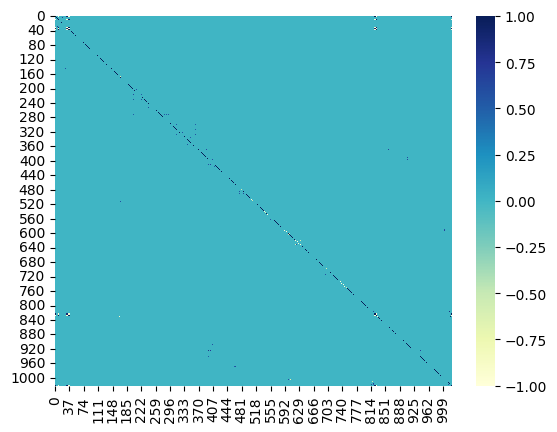

In [226]:
sns.heatmap(correla.values, cmap="YlGnBu")
plt.show()

In [232]:
plt.show()

In [208]:
plt.imshow(correla)

plt.show()

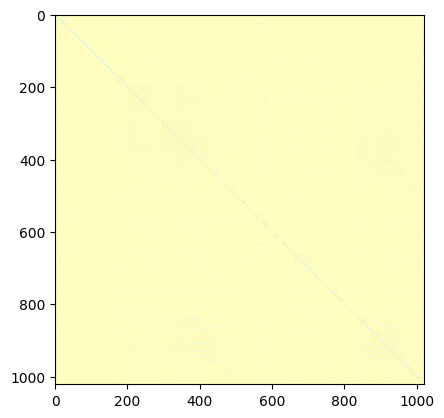

In [179]:
plt.show()

In [152]:
list(abc_data)

['问卷发布名称',
 'Sver',
 'SchoolID',
 '作答渠道',
 '省份',
 '城市',
 '设备类型',
 '操作系统类型',
 '浏览器类型',
 '屏幕分辨率',
 'grade',
 'class',
 'ls1',
 'ls2',
 'ls3',
 'ls4',
 'ls5',
 'Ladder',
 'GLS',
 'pmwb1',
 'pmwb2',
 'pmwb3',
 'pmwb4',
 'pmwbsc',
 'pmwb5',
 'pmwb6',
 'pmwb7',
 'mil1',
 'mil2',
 'mil3',
 'mil4',
 'mil5',
 'mil6',
 'mil7',
 'mil8',
 'mil9',
 'mil10',
 'pil1',
 'pil2',
 'pil3',
 'pil4',
 'cps1',
 'cps2',
 'cps3',
 'cps4',
 'cps5',
 'cps6',
 'cps7',
 'cps8',
 'cps9',
 'cps10',
 'cps11',
 'cps12',
 'pb1',
 'pb2',
 'pb3',
 'pb4',
 'pb5',
 'ecs1',
 'ecs2',
 'ecs3',
 'ecs4',
 'ecs5',
 'ecssc',
 'ecs6',
 'ecs7',
 'gender',
 'age',
 'minzu',
 'siblings',
 'bo',
 'care1',
 'care2',
 'care3',
 'care4',
 'care5',
 'care6',
 'care7',
 'care0',
 'care8',
 'fedu',
 'medu',
 'computer',
 'car',
 'sfsc',
 'sssc',
 'pa1',
 'pa2',
 'pa3',
 'pa4',
 'pa5',
 'na1',
 'na2',
 'na3',
 'na4',
 'na5',
 'myopia',
 'chat',
 'ec1',
 'ec2',
 'ec3',
 'ec4',
 'ec5',
 'ec6',
 'ec7',
 'ecf',
 'sleep',
 'rise',
 'sport',
 'sc

In [138]:
list(all_data)

['问卷发布名称',
 'Sver',
 'SchoolID',
 '作答ID',
 '用户ID',
 '用户名',
 '开始时间',
 '结束时间',
 '作答时长',
 '作答渠道',
 'ip',
 '经度',
 '纬度',
 '省份',
 '城市',
 '设备类型',
 '操作系统类型',
 '浏览器类型',
 '屏幕分辨率',
 '随机元素',
 'grade',
 'class',
 'sid',
 'ls1',
 'ls2',
 'ls3',
 'ls4',
 'ls5',
 'Ladder',
 'GLS',
 'pmwb1',
 'pmwb2',
 'pmwb3',
 'pmwb4',
 'pmwbsc',
 'pmwb5',
 'pmwb6',
 'pmwb7',
 'mil1',
 'mil2',
 'mil3',
 'mil4',
 'mil5',
 'mil6',
 'mil7',
 'mil8',
 'mil9',
 'mil10',
 'pil1',
 'pil2',
 'pil3',
 'pil4',
 'cps1',
 'cps2',
 'cps3',
 'cps4',
 'cps5',
 'cps6',
 'cps7',
 'cps8',
 'cps9',
 'cps10',
 'cps11',
 'cps12',
 'pb1',
 'pb2',
 'pb3',
 'pb4',
 'pb5',
 'ecs1',
 'ecs2',
 'ecs3',
 'ecs4',
 'ecs5',
 'ecssc',
 'ecs6',
 'ecs7',
 'gender',
 'age',
 'minzu',
 'height',
 'weight',
 'siblings',
 'bo',
 'care1',
 'care2',
 'care3',
 'care4',
 'care5',
 'care6',
 'care7',
 'care0',
 'care8',
 'fedu',
 'medu',
 'computer',
 'car',
 'sfsc',
 'sssc',
 'pa1',
 'pa2',
 'pa3',
 'pa4',
 'pa5',
 'na1',
 'na2',
 'na3',
 'na4',
 'na5',
 'my

['问卷发布名称',
 'Sver',
 'SchoolID',
 '作答ID',
 '用户ID',
 '用户名',
 '开始时间',
 '结束时间',
 '作答时长',
 '作答渠道',
 'ip',
 '经度',
 '纬度',
 '省份',
 '城市',
 '设备类型',
 '操作系统类型',
 '浏览器类型',
 '屏幕分辨率',
 '随机元素',
 'grade',
 'class',
 'sid',
 'ls1',
 'ls2',
 'ls3',
 'ls4',
 'ls5',
 'Ladder',
 'GLS',
 'pmwb1',
 'pmwb2',
 'pmwb3',
 'pmwb4',
 'pmwbsc',
 'pmwb5',
 'pmwb6',
 'pmwb7',
 'mil1',
 'mil2',
 'mil3',
 'mil4',
 'mil5',
 'mil6',
 'mil7',
 'mil8',
 'mil9',
 'mil10',
 'pil1',
 'pil2',
 'pil3',
 'pil4',
 'cps1',
 'cps2',
 'cps3',
 'cps4',
 'cps5',
 'cps6',
 'cps7',
 'cps8',
 'cps9',
 'cps10',
 'cps11',
 'cps12',
 'pb1',
 'pb2',
 'pb3',
 'pb4',
 'pb5',
 'ecs1',
 'ecs2',
 'ecs3',
 'ecs4',
 'ecs5',
 'ecssc',
 'ecs6',
 'ecs7',
 'gender',
 'age',
 'minzu',
 'height',
 'weight',
 'siblings',
 'bo',
 'care1',
 'care2',
 'care3',
 'care4',
 'care5',
 'care6',
 'care7',
 'care0',
 'care8',
 'fedu',
 'medu',
 'computer',
 'car',
 'sfsc',
 'sssc',
 'pa1',
 'pa2',
 'pa3',
 'pa4',
 'pa5',
 'na1',
 'na2',
 'na3',
 'na4',
 'na5',
 'my

In [122]:
pd.read_excel('data_purpose.xlsx',engine='openpyxl')

ImportError: Missing optional dependency 'openpyxl'.  Use pip or conda to install openpyxl.

In [111]:
import wordcloud

# 构建并配置词云对象w
w = wordcloud.WordCloud(width=1000,
                        height=700,
                        background_color='white',
                        font_path='/usr/share/fonts/opentype/noto/NotoSansCJK-Black.ttc',)

In [ ]:
data=pd.read_spss(r'purpose.sav')
data['jieba_split']=[jieba.lcut(data['purpose'][i],cut_all=True) for i in range(len(data))]

items=[]
for i in range(len(data)):
    items=items+jieba.lcut(data['purpose'][i],cut_all=True)
    

In [84]:
data=pd.read_spss(r'purpose.sav')
data['jieba_split']=[delete_non_chinese(jieba.lcut(data['purpose'][i])) for i in range(len(data))]



In [85]:
data

ID    SCID                        purpose  \
0     7AxlDkPM  2117.0                          生命的用意   
1     Mo1XJKOL  2117.0                成为高富帅，走上人生巅峰，有钱   
2     MWWRapEM  2117.0                        有一舒适的生活   
3     Lz9d13x7  2117.0                        做一个奥运冠军   
4     MRDPaE1L  2117.0                      孝敬父母，好好学习   
...        ...     ...                            ...   
2802  MgEWZvJL  2118.0                           没有目标   
2803  eNQGdlzL  2118.0    当一名华为程序员，开发鸿蒙，打破美国和台积电的技术垄断   
2804  7BGPrm6L  2118.0                 考上大学，完成父母家人的期望   
2805  MWW5pD0M  2118.0  我的人生目标是，长大做一个在自己在小时候就很想成为的一个人   
2806  LVJbPDPL  2118.0                           没有目标   

                                            jieba_split  
0                                           [生命, 的, 用意]  
1                             [成为, 高富帅, 走上, 人生, 巅峰, 有钱]  
2                                     [有, 一, 舒适, 的, 生活]  
3                                         [做, 一个, 奥运冠军]  
4                                          [孝敬父母, 好好学习]  
...                                                 ...  
2802                                           [没有, 目标]  
2803  [当, 一名, 华为, 程序员, 开发, 鸿蒙, 打破, 美国, 和, 台积, 电, 的, ...  
2804                        [考上, 大学, 完成, 父母, 家人, 的, 期望]  
2805  [我, 的, 人生目标, 是, 长大, 做, 一个, 在, 自己, 在, 小时候, 就, 很...  
2806                                           [没有, 目标]  

[2807 rows x 4 columns]

In [77]:
mydata=items

In [38]:
import re

In [37]:
def delete_non_chinese(mydata):
    new_data = []
    p = re.compile(r'[\u4e00-\u9fa5]')
    for i in range(len(mydata)):
        data = re.findall(p, mydata[i])
        result = ''.join(data)
        new_data.append(result)
    box = []
    for i in range(len(new_data)):
        if new_data[i] != '':
            box.append(new_data[i])
    return box



In [89]:
ana=pd.DataFrame(items)

In [94]:
import matplotlib.pyplot as plt

In [103]:
ana

0
0       生命
1        的
2       用意
3       成为
4      高富帅
...    ...
14968    的
14969   一个
14970    人
14971   没有
14972   目标

[14973 rows x 1 columns]

In [105]:
ana.value_counts().to_csv('count_table.csv')

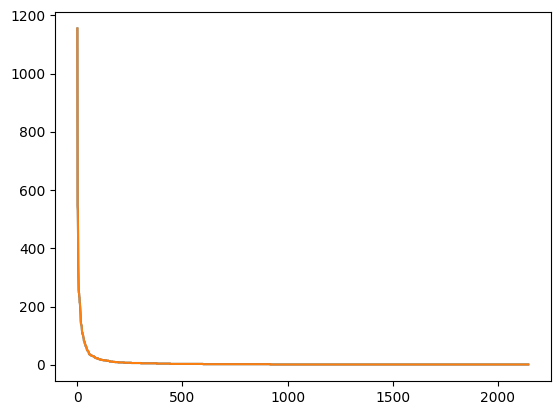

In [100]:
plt.plot([i for i in range(len(ana.value_counts()))], ana.value_counts().values)
plt.show()

In [86]:
items=[]
for i in range(len(data)):
    items=items+delete_non_chinese(jieba.lcut(data['purpose'][i]))

In [87]:
string=" ".join(items)


w.generate(string)

w.to_file('abcde.png')

In [28]:
data['purpose'][1]

'成为高富帅，走上人生巅峰，有钱'

In [43]:
jieba.lcut(data['purpose'][1])

['成为', '高富帅', '，', '走上', '人生', '巅峰', '，', '有钱']

In [38]:
a0=jieba.lcut(data['purpose'][1],cut_all=True)

In [53]:
a1=jieba.lcut(data['purpose'][2],cut_all=True)

In [55]:
a1+a0

['有', '一', '舒适', '的', '生活', '成为', '高富帅', '，', '走上', '人生', '巅峰', '，', '有钱']

In [33]:
jieba.lcut_for_search(data['purpose'][1])

['成为', '高富帅', '，', '走上', '人生', '巅峰', '，', '有钱']

In [3]:
str_text=open(u'data.txt',encoding='utf-8',errors='ignore').read()

In [5]:
import savReaderWriter

mydata_spss = savReaderWriter.SavReader('purpose.sav',ioUtf8=True)

str_quan1=jieba.cut(str_text,cut_all=True)
str_quan2=jieba.cut(str_text,cut_all=True)
print("$".join(str_quan2))

str_jing1=jieba.cut(str_text,cut_all=False)

print('精准模式分词：{ %d}' % len(list(str_jing1)))

str_jing2=jieba.cut(str_text,cut_all=False)

print("$".join(str_jing2))

#搜索引擎模式  cut_for_search

str_soso1=jieba.cut_for_search(str_text)

print('搜索引擎分词：{ %d}' % len(list(str_soso1)))

str_soso2=jieba.cut_for_search(str_text)

print("$".join(str_soso2))

Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
Loading model cost 0.758 seconds.
Prefix dict has been built successfully.


美好$的$人生$$
$$幸福$$
$$快乐$$
$
精准模式分词：{ 8}
美好$的$人生$
$幸福$
$快乐$

搜索引擎分词：{ 8}
美好$的$人生$
$幸福$
$快乐$



ID    SCID                        purpose
0     7AxlDkPM  2117.0                          生命的用意
1     Mo1XJKOL  2117.0                成为高富帅，走上人生巅峰，有钱
2     MWWRapEM  2117.0                        有一舒适的生活
3     Lz9d13x7  2117.0                        做一个奥运冠军
4     MRDPaE1L  2117.0                      孝敬父母，好好学习
...        ...     ...                            ...
2802  MgEWZvJL  2118.0                           没有目标
2803  eNQGdlzL  2118.0    当一名华为程序员，开发鸿蒙，打破美国和台积电的技术垄断
2804  7BGPrm6L  2118.0                 考上大学，完成父母家人的期望
2805  MWW5pD0M  2118.0  我的人生目标是，长大做一个在自己在小时候就很想成为的一个人
2806  LVJbPDPL  2118.0                           没有目标

[2807 rows x 3 columns]